## Content Downloading
These cells will be ececuted once

In [ ]:
from google.colab import files
files.upload()

{}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle
! ls
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

drive  kaggle.json  sample_data


In [ ]:
! kaggle datasets download -d danielwillgeorge/glove6b100dtxt

100% 131M/131M [00:06<00:00, 24.3MB/s]
100% 131M/131M [00:06<00:00, 19.9MB/s]


In [ ]:
! unzip /content/glove6b100dtxt.zip

Archive:  /content/glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [ ]:
!mv /content/glove.6B.100d.txt /content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k/working

In [ ]:
! kaggle datasets download -d adityajn105/flickr8k

100% 1.03G/1.04G [00:31<00:00, 41.2MB/s]
100% 1.04G/1.04G [00:31<00:00, 35.3MB/s]


In [ ]:
! unzip /content/flickr8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [ ]:
!mkdir /content/flickr8k

In [2]:
! mv /content/Images /content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k

mv: cannot stat '/content/Images': No such file or directory


## Library importing

In [ ]:
! cp --recursive '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k/Images' '/content/Images'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
from time import time
import pickle
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers import Add
from tqdm import tqdm
from tensorflow.keras.preprocessing import image

In [ ]:
WORK = "/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k/working/"
IMG_PATH = "/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k/Images/"
IMG_PATH = '/content/Images/'

## Data Cleaning

In [ ]:
# Read Text Captions

def readText(path):
    with open(path) as f:
        captions = f.read()
    return captions


In [ ]:
captions = readText('/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/flickr8k/Images/captions.txt')
captions = captions.split('\n')[:-1]
captions = captions[1::]

In [ ]:
first,second  = captions[0].split(',')
print(first.split(".")[0])
print(second)

1000268201_693b08cb0e
A child in a pink dress is climbing up a set of stairs in an entry way .


In [ ]:
# Creating image and caption list dictionary
des = {}

for x in tqdm(captions):
  r  = x.split(',')
  img_name = r[0].split(".")[0]

  if des.get(img_name) is None:
    des[img_name] = []

  des[img_name].append(r[1])

100%|██████████| 40455/40455 [00:00<00:00, 377676.41it/s]


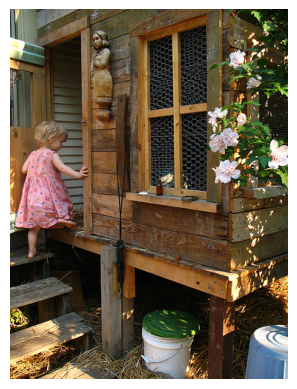

In [ ]:
img = cv2.imread(IMG_PATH+'1000268201_693b08cb0e'+".jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# Removing non alphabets and single letter
def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()

  sentence = [ele for ele in sentence if len(ele)>1]
  sentence = " ".join(sentence)
  return sentence

In [ ]:
for key, value in des.items():
  for i in range(len(value)):
    value[i] = clean_text(value[i])

In [ ]:
des

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70': ['black dog and spotted dog are fighting',
  'black dog and tri colored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'there is girl with pigtails sitting in front of rainbow painting',
  'young girl with p

In [ ]:
with open(WORK+"descriptions_1.txt","w") as f:
    f.write(str(des))

## Vocabulary

In [ ]:
desc = None
with open(WORK+"descriptions_1.txt","r") as file:
  desc = file.read()

json_acceptable_string = desc.replace("'","\"")
desc = json.loads(json_acceptable_string)

In [ ]:
vocab = set()

for key in desc.keys():
  [vocab.update(ele.split()) for ele in desc[key]]

print(f"Length of vocabulary is {len(vocab)}")

Length of vocabulary is 8257


In [ ]:
word_list = []

for key in desc.keys():
  [word_list.extend(ele.split()) for ele in desc[key]]

print(f"Length of word list is {len(word_list)}")

Length of word list is 357791


In [ ]:
import collections

counter = dict(collections.Counter(word_list))
print(f"Vocab count is {len(counter.keys())}")

Vocab count is 8257


In [ ]:
sorted_vocab = sorted(counter.items(), reverse=True, key= lambda x:x[1])
threshold = 10

word_list = [x for x in sorted_vocab if x[1]>10]
word_list = [x[0] for x in word_list]
print(f"Length of word list is {len(word_list)}")

Length of word list is 1800


In [ ]:
all_data = []

for key in desc.keys():
  all_data.append(key)

all_data = list(set(all_data))

In [ ]:
import random

def train_test_split(data, train_ratio=0.8, seed=4):
  random.Random(seed).shuffle(data)
  train_ind = int(len(data)*train_ratio)
  return data[:train_ind], data[train_ind:]


In [ ]:
train, test = train_test_split(all_data)

In [ ]:
def captions_lst(indexes):

  text_desc = {}

  for img_id in indexes:
      text_desc[img_id] = []
      for cap in desc[img_id]:
          cap_to_append = "startseq "  + cap + " endseq"
          text_desc[img_id].append(cap_to_append)

  return text_desc

In [ ]:
train_desc = captions_lst(train)
test_desc = captions_lst(test)

In [ ]:
train_desc

{'2900274587_f2cbca4c58': ['startseq body of water at sunset endseq',
  'startseq sunset over lake endseq',
  'startseq sunset sky over rippling water endseq',
  'startseq water scene with sunset in the background endseq',
  'startseq this is beautiful sunset on the water endseq'],
 '2314732154_83bc7f7314': ['startseq brown dog walks towards another animal hiding in the grass endseq',
  'startseq dog walks in the grass towards dog lying down endseq',
  'startseq grey silky dog is laying in the grass while brown dog looks on endseq',
  'startseq standing brown dog watches another dog lay in the grass endseq',
  'startseq the brown dog sees black dog laying in the dry grass endseq'],
 '2887103049_a867e74358': ['startseq boy jumps skateboard while man in suit looks on endseq',
  'startseq man walks past as skateboarder flies over the steps endseq',
  'startseq skateboarder jumps over set of stairs endseq',
  'startseq skateboarder performs trick endseq',
  'startseq person on skateboard i

In [ ]:
with open(WORK+"train_desc.txt","w") as f:
    f.write(str(train_desc))

with open(WORK+"test_desc.txt","w") as f:
    f.write(str(test_desc))

In [ ]:
train_desc = None
with open(WORK+"train_desc.txt","r") as f:
    train_desc = f.read()
train_desc = eval(train_desc)

test_desc = None
with open(WORK+"test_desc.txt","r") as f:
    test_desc = f.read()
test_desc = eval(test_desc)

In [ ]:
train_desc

{'2900274587_f2cbca4c58': ['startseq body of water at sunset endseq',
  'startseq sunset over lake endseq',
  'startseq sunset sky over rippling water endseq',
  'startseq water scene with sunset in the background endseq',
  'startseq this is beautiful sunset on the water endseq'],
 '2314732154_83bc7f7314': ['startseq brown dog walks towards another animal hiding in the grass endseq',
  'startseq dog walks in the grass towards dog lying down endseq',
  'startseq grey silky dog is laying in the grass while brown dog looks on endseq',
  'startseq standing brown dog watches another dog lay in the grass endseq',
  'startseq the brown dog sees black dog laying in the dry grass endseq'],
 '2887103049_a867e74358': ['startseq boy jumps skateboard while man in suit looks on endseq',
  'startseq man walks past as skateboarder flies over the steps endseq',
  'startseq skateboarder jumps over set of stairs endseq',
  'startseq skateboarder performs trick endseq',
  'startseq person on skateboard i

## Image Feature Extraction

In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

102967424/102967424 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
model_new = Model(model.input,model.layers[-2].output)

In [ ]:
def preprocess_image(img):
  img = image.load_img(img,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)
  return img

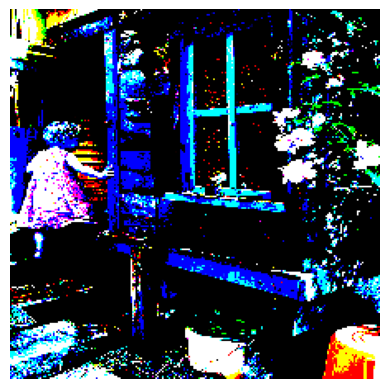

In [ ]:
img = preprocess_image(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()

In [ ]:
def encode_image(img):
  img = preprocess_image(img)
  feature_vector = model_new.predict(img);
  feature_vector = feature_vector.reshape((-1,))
  return feature_vector

In [ ]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

1/1 [==============================] - 9s 9s/step


array([0.06536551, 0.16782692, 0.3251838 , ..., 0.05111527, 0.32817832,
       1.0043347 ], dtype=float32)

In [ ]:

def encoding(indexes):
  image_encoding = {}
  for img_id in tqdm(indexes):
    img_path = IMG_PATH + '/' + img_id + '.jpg'
    image_encoding[img_id] = encode_image(img_path);
  return image_encoding

In [ ]:
train_encoding = encoding(train)


  0%|          | 0/6472 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 1/6472 [00:00<1:07:49,  1.59it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 2/6472 [00:01<1:23:56,  1.28it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 3/6472 [00:02<1:19:00,  1.36it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 4/6472 [00:03<1:26:12,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 5/6472 [00:03<1:27:50,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 6/6472 [00:04<1:30:23,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 7/6472 [00:05<1:25:19,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 8/6472 [00:06<1:20:52,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 9/6472 [00:07<1:23:46,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 10/6472 [00:07<1:30:17,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 11/6472 [00:08<1:34:58,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 12/6472 [00:09<1:28:04,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 13/6472 [00:10<1:33:05,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 14/6472 [00:11<1:31:27,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 15/6472 [00:12<1:33:10,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 16/6472 [00:13<1:30:12,  1.19it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 17/6472 [00:14<1:32:23,  1.16it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 18/6472 [00:14<1:29:19,  1.20it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 19/6472 [00:15<1:26:59,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 20/6472 [00:16<1:28:52,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 21/6472 [00:17<1:22:57,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 22/6472 [00:17<1:27:00,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 23/6472 [00:18<1:28:10,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 24/6472 [00:19<1:24:15,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 25/6472 [00:20<1:25:13,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 26/6472 [00:21<1:28:03,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 27/6472 [00:21<1:22:45,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 28/6472 [00:22<1:28:54,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 29/6472 [00:23<1:33:20,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 30/6472 [00:24<1:26:29,  1.24it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 31/6472 [00:25<1:21:30,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 32/6472 [00:25<1:25:12,  1.26it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 33/6472 [00:26<1:29:24,  1.20it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 34/6472 [00:27<1:24:58,  1.26it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 35/6472 [00:28<1:22:53,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 36/6472 [00:29<1:35:39,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 37/6472 [00:30<1:35:57,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 38/6472 [00:31<1:29:09,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 39/6472 [00:31<1:30:44,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 40/6472 [00:32<1:30:56,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 41/6472 [00:33<1:24:54,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 42/6472 [00:34<1:29:59,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 43/6472 [00:35<1:25:29,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 44/6472 [00:35<1:21:45,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 45/6472 [00:36<1:24:21,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 46/6472 [00:37<1:28:44,  1.21it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 47/6472 [00:38<1:32:24,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 48/6472 [00:39<1:29:40,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 49/6472 [00:40<1:32:00,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 50/6472 [00:40<1:25:29,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 51/6472 [00:41<1:21:30,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 52/6472 [00:42<1:17:12,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 53/6472 [00:42<1:16:13,  1.40it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 54/6472 [00:43<1:15:55,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 55/6472 [00:44<1:28:32,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 56/6472 [00:45<1:34:49,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 57/6472 [00:46<1:27:48,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 58/6472 [00:47<1:32:12,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 59/6472 [00:47<1:26:38,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 60/6472 [00:48<1:22:44,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 61/6472 [00:49<1:28:16,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 62/6472 [00:50<1:23:27,  1.28it/s]

1/1 [==============================] - 0s 54ms/step


  1%|          | 63/6472 [00:51<1:22:53,  1.29it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 64/6472 [00:51<1:25:23,  1.25it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 65/6472 [00:52<1:22:16,  1.30it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 66/6472 [00:53<1:25:50,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 67/6472 [00:54<1:27:37,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 68/6472 [00:55<1:26:36,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 69/6472 [00:55<1:23:42,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 70/6472 [00:56<1:25:53,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 71/6472 [00:57<1:21:39,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 72/6472 [00:58<1:24:43,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 73/6472 [00:58<1:20:46,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 74/6472 [00:59<1:20:37,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 75/6472 [01:00<1:18:13,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 76/6472 [01:01<1:21:18,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 77/6472 [01:02<1:24:29,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 78/6472 [01:03<1:30:19,  1.18it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 79/6472 [01:03<1:32:55,  1.15it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 80/6472 [01:04<1:26:54,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 81/6472 [01:05<1:33:23,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 82/6472 [01:06<1:26:59,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 83/6472 [01:07<1:30:16,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 84/6472 [01:08<1:34:28,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 85/6472 [01:09<1:34:55,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 86/6472 [01:10<1:36:41,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 87/6472 [01:10<1:29:18,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 88/6472 [01:11<1:29:51,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 89/6472 [01:12<1:30:45,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 90/6472 [01:13<1:35:01,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 91/6472 [01:14<1:27:23,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 92/6472 [01:15<1:33:01,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 93/6472 [01:16<1:34:13,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏         | 94/6472 [01:16<1:29:00,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 95/6472 [01:17<1:37:55,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▏         | 96/6472 [01:18<1:29:41,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 97/6472 [01:19<1:32:19,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 98/6472 [01:20<1:33:03,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 99/6472 [01:21<1:32:22,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 100/6472 [01:21<1:27:16,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 101/6472 [01:22<1:22:54,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 102/6472 [01:23<1:21:01,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 103/6472 [01:24<1:24:45,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 104/6472 [01:24<1:22:55,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 105/6472 [01:25<1:20:22,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 106/6472 [01:26<1:25:47,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 107/6472 [01:27<1:20:14,  1.32it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 108/6472 [01:28<1:24:50,  1.25it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 109/6472 [01:28<1:20:41,  1.31it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 110/6472 [01:29<1:24:26,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 111/6472 [01:30<1:25:01,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 112/6472 [01:31<1:27:01,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 113/6472 [01:32<1:28:25,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 114/6472 [01:33<1:29:52,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 115/6472 [01:34<1:33:16,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 116/6472 [01:34<1:33:48,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 117/6472 [01:35<1:36:55,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 118/6472 [01:36<1:39:11,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 119/6472 [01:37<1:35:01,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 120/6472 [01:38<1:27:16,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 121/6472 [01:39<1:33:32,  1.13it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 122/6472 [01:40<1:34:13,  1.12it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 123/6472 [01:41<1:37:52,  1.08it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 124/6472 [01:42<1:30:04,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 125/6472 [01:42<1:29:35,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 126/6472 [01:43<1:31:44,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 127/6472 [01:44<1:32:49,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 128/6472 [01:45<1:27:46,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 129/6472 [01:46<1:23:07,  1.27it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 130/6472 [01:46<1:27:11,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 131/6472 [01:47<1:21:31,  1.30it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 132/6472 [01:48<1:17:36,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 133/6472 [01:49<1:24:05,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 134/6472 [01:50<1:33:32,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 135/6472 [01:51<1:27:31,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 136/6472 [01:51<1:28:39,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 137/6472 [01:52<1:31:28,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 138/6472 [01:53<1:25:08,  1.24it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 139/6472 [01:54<1:27:58,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 140/6472 [01:55<1:22:18,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 141/6472 [01:55<1:19:08,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 142/6472 [01:56<1:22:05,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 143/6472 [01:57<1:26:39,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 144/6472 [01:58<1:28:47,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 145/6472 [01:58<1:22:11,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 146/6472 [01:59<1:28:37,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 147/6472 [02:00<1:24:14,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 148/6472 [02:01<1:28:49,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 149/6472 [02:02<1:30:55,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 150/6472 [02:03<1:23:42,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 151/6472 [02:03<1:19:02,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 152/6472 [02:04<1:18:55,  1.33it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 153/6472 [02:05<1:24:41,  1.24it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 154/6472 [02:06<1:22:54,  1.27it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 155/6472 [02:06<1:19:58,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 156/6472 [02:07<1:15:53,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 157/6472 [02:08<1:17:12,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 158/6472 [02:09<1:20:50,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 159/6472 [02:09<1:19:18,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 160/6472 [02:10<1:17:51,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 161/6472 [02:11<1:16:36,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 162/6472 [02:12<1:23:52,  1.25it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 163/6472 [02:12<1:19:10,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 164/6472 [02:13<1:16:38,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 165/6472 [02:14<1:23:24,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 166/6472 [02:15<1:29:17,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 167/6472 [02:16<1:30:21,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 168/6472 [02:17<1:47:05,  1.02s/it]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 169/6472 [02:18<1:48:55,  1.04s/it]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 170/6472 [02:19<1:43:50,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 171/6472 [02:20<1:34:00,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 172/6472 [02:21<1:26:42,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 173/6472 [02:22<1:30:50,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 174/6472 [02:22<1:30:55,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 175/6472 [02:23<1:32:01,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 176/6472 [02:24<1:32:37,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 177/6472 [02:25<1:25:13,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 178/6472 [02:25<1:19:41,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 179/6472 [02:26<1:17:44,  1.35it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 180/6472 [02:27<1:21:37,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 181/6472 [02:28<1:24:33,  1.24it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 182/6472 [02:29<1:26:05,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 183/6472 [02:30<1:26:57,  1.21it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 184/6472 [02:30<1:22:34,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 185/6472 [02:31<1:28:54,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 186/6472 [02:32<1:29:29,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 187/6472 [02:33<1:23:05,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 188/6472 [02:34<1:25:02,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 189/6472 [02:35<1:28:44,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 190/6472 [02:35<1:29:24,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 191/6472 [02:36<1:29:53,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 192/6472 [02:37<1:31:51,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 193/6472 [02:38<1:25:10,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 194/6472 [02:39<1:25:00,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 195/6472 [02:39<1:19:51,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 196/6472 [02:40<1:18:49,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 197/6472 [02:41<1:16:38,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 198/6472 [02:42<1:21:09,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 199/6472 [02:43<1:26:51,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 200/6472 [02:44<1:27:33,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 201/6472 [02:44<1:21:49,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 202/6472 [02:45<1:17:51,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 203/6472 [02:46<1:24:24,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 204/6472 [02:47<1:27:38,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 205/6472 [02:48<1:27:28,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 206/6472 [02:48<1:28:57,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 207/6472 [02:49<1:24:15,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 208/6472 [02:50<1:20:07,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 209/6472 [02:51<1:24:18,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 210/6472 [02:51<1:19:10,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 211/6472 [02:52<1:15:31,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 212/6472 [02:53<1:19:40,  1.31it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 213/6472 [02:54<1:24:33,  1.23it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 214/6472 [02:54<1:20:22,  1.30it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 215/6472 [02:55<1:28:08,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 216/6472 [02:56<1:28:09,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 217/6472 [02:57<1:22:19,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 218/6472 [02:58<1:24:06,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 219/6472 [02:59<1:25:47,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 220/6472 [02:59<1:21:38,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 221/6472 [03:00<1:18:50,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 222/6472 [03:01<1:26:05,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 223/6472 [03:02<1:22:15,  1.27it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 224/6472 [03:03<1:26:42,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 225/6472 [03:03<1:22:42,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 226/6472 [03:04<1:23:40,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 227/6472 [03:05<1:20:54,  1.29it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 228/6472 [03:06<1:17:45,  1.34it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 229/6472 [03:06<1:17:26,  1.34it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 230/6472 [03:07<1:15:24,  1.38it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 231/6472 [03:08<1:14:43,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 232/6472 [03:09<1:20:25,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 233/6472 [03:09<1:23:45,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 234/6472 [03:10<1:26:20,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 235/6472 [03:11<1:22:37,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 236/6472 [03:12<1:19:21,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 237/6472 [03:12<1:16:49,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 238/6472 [03:13<1:15:24,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 239/6472 [03:14<1:22:45,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 240/6472 [03:15<1:20:10,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 241/6472 [03:15<1:16:32,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 242/6472 [03:16<1:19:31,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 243/6472 [03:17<1:25:17,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 244/6472 [03:18<1:27:01,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 245/6472 [03:19<1:22:58,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 246/6472 [03:20<1:18:55,  1.31it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 247/6472 [03:20<1:16:42,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 248/6472 [03:21<1:15:08,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 249/6472 [03:22<1:13:19,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 250/6472 [03:22<1:11:59,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 251/6472 [03:23<1:17:53,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 252/6472 [03:24<1:14:57,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 253/6472 [03:24<1:12:44,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 254/6472 [03:25<1:20:55,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 255/6472 [03:26<1:22:13,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 256/6472 [03:27<1:26:28,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 257/6472 [03:28<1:26:25,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 258/6472 [03:29<1:27:34,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 259/6472 [03:30<1:27:31,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 260/6472 [03:31<1:29:29,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 261/6472 [03:31<1:23:57,  1.23it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 262/6472 [03:32<1:19:25,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 263/6472 [03:33<1:25:57,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 264/6472 [03:34<1:27:28,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 265/6472 [03:35<1:28:15,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 266/6472 [03:36<1:28:08,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 267/6472 [03:36<1:23:09,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 268/6472 [03:37<1:25:17,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 269/6472 [03:38<1:27:16,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 270/6472 [03:39<1:28:47,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 271/6472 [03:40<1:22:46,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 272/6472 [03:40<1:22:28,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 273/6472 [03:41<1:24:47,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 274/6472 [03:42<1:26:55,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 275/6472 [03:43<1:28:06,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 276/6472 [03:44<1:27:34,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 277/6472 [03:45<1:22:34,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 278/6472 [03:45<1:19:40,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 279/6472 [03:46<1:22:10,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 280/6472 [03:47<1:24:53,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 281/6472 [03:48<1:20:05,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 282/6472 [03:49<1:23:27,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 283/6472 [03:49<1:25:34,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 284/6472 [03:50<1:27:08,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 285/6472 [03:51<1:23:05,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 286/6472 [03:52<1:25:54,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 287/6472 [03:53<1:27:29,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 288/6472 [03:54<1:28:35,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 289/6472 [03:55<1:31:18,  1.13it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 290/6472 [03:55<1:30:22,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 291/6472 [03:56<1:30:24,  1.14it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 292/6472 [03:57<1:27:41,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 293/6472 [03:58<1:27:43,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 294/6472 [03:59<1:21:30,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 295/6472 [03:59<1:23:32,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 296/6472 [04:01<1:29:55,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 297/6472 [04:01<1:33:15,  1.10it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 298/6472 [04:02<1:26:26,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 299/6472 [04:03<1:22:35,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 300/6472 [04:04<1:28:16,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 301/6472 [04:05<1:32:56,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 302/6472 [04:06<1:34:58,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 303/6472 [04:07<1:34:19,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 304/6472 [04:07<1:26:04,  1.19it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 305/6472 [04:09<1:34:31,  1.09it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 306/6472 [04:09<1:32:01,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 307/6472 [04:10<1:31:31,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 308/6472 [04:11<1:25:41,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 309/6472 [04:12<1:26:25,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 310/6472 [04:13<1:29:07,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 311/6472 [04:13<1:21:46,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 312/6472 [04:14<1:17:26,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 313/6472 [04:15<1:15:58,  1.35it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 314/6472 [04:15<1:14:00,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 315/6472 [04:16<1:20:14,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 316/6472 [04:17<1:16:19,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 317/6472 [04:18<1:13:13,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 318/6472 [04:18<1:18:02,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 319/6472 [04:19<1:14:23,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 320/6472 [04:20<1:19:01,  1.30it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 321/6472 [04:21<1:23:49,  1.22it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 322/6472 [04:22<1:19:05,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 323/6472 [04:23<1:22:53,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 324/6472 [04:23<1:19:14,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 325/6472 [04:24<1:23:05,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 326/6472 [04:25<1:25:17,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 327/6472 [04:26<1:20:48,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 328/6472 [04:26<1:17:39,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 329/6472 [04:27<1:15:09,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 330/6472 [04:28<1:19:15,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 331/6472 [04:29<1:15:24,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 332/6472 [04:29<1:14:36,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 333/6472 [04:30<1:12:28,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 334/6472 [04:31<1:10:37,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 335/6472 [04:31<1:16:04,  1.34it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 336/6472 [04:32<1:20:03,  1.28it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 337/6472 [04:33<1:23:18,  1.23it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 338/6472 [04:34<1:26:37,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 339/6472 [04:35<1:20:42,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 340/6472 [04:35<1:16:46,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 341/6472 [04:36<1:22:12,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 342/6472 [04:37<1:24:43,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 343/6472 [04:38<1:21:09,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 344/6472 [04:39<1:23:44,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 345/6472 [04:40<1:25:05,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 346/6472 [04:40<1:21:13,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 347/6472 [04:41<1:16:48,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 348/6472 [04:42<1:20:42,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 349/6472 [04:43<1:18:25,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 350/6472 [04:44<1:24:17,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 351/6472 [04:44<1:23:59,  1.21it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 352/6472 [04:45<1:28:04,  1.16it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 353/6472 [04:46<1:24:00,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 354/6472 [04:47<1:26:07,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 355/6472 [04:48<1:19:57,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 356/6472 [04:49<1:23:38,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 357/6472 [04:49<1:19:14,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 358/6472 [04:50<1:24:59,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 359/6472 [04:52<1:51:16,  1.09s/it]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 360/6472 [04:53<1:50:19,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 361/6472 [04:54<1:43:29,  1.02s/it]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 362/6472 [04:54<1:32:19,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 363/6472 [04:55<1:25:17,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 364/6472 [04:56<1:20:51,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 365/6472 [04:57<1:26:55,  1.17it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 366/6472 [04:58<1:34:14,  1.08it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 367/6472 [04:59<1:27:42,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 368/6472 [04:59<1:27:08,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 369/6472 [05:00<1:27:39,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 370/6472 [05:01<1:26:30,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 371/6472 [05:02<1:20:40,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 372/6472 [05:03<1:22:57,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 373/6472 [05:04<1:28:58,  1.14it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 374/6472 [05:05<1:31:39,  1.11it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 375/6472 [05:06<1:33:51,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 376/6472 [05:07<1:32:42,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 377/6472 [05:07<1:30:25,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 378/6472 [05:08<1:30:41,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 379/6472 [05:09<1:24:49,  1.20it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 380/6472 [05:10<1:28:37,  1.15it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 381/6472 [05:11<1:29:38,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 382/6472 [05:12<1:27:43,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 383/6472 [05:13<1:29:19,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 384/6472 [05:14<1:34:38,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 385/6472 [05:15<1:33:26,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 386/6472 [05:15<1:33:25,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 387/6472 [05:16<1:27:21,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 388/6472 [05:17<1:20:58,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 389/6472 [05:17<1:16:14,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 390/6472 [05:18<1:22:58,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 391/6472 [05:19<1:25:17,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 392/6472 [05:20<1:19:49,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 393/6472 [05:21<1:16:55,  1.32it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 394/6472 [05:22<1:21:06,  1.25it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 395/6472 [05:22<1:21:45,  1.24it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 396/6472 [05:23<1:23:38,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 397/6472 [05:24<1:19:53,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 398/6472 [05:25<1:21:38,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 399/6472 [05:25<1:16:35,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 400/6472 [05:26<1:20:47,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 401/6472 [05:27<1:23:51,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 402/6472 [05:28<1:25:32,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 403/6472 [05:29<1:19:56,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 404/6472 [05:30<1:21:09,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 405/6472 [05:30<1:16:37,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 406/6472 [05:31<1:14:42,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 407/6472 [05:32<1:13:52,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 408/6472 [05:32<1:11:05,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 409/6472 [05:33<1:14:48,  1.35it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 410/6472 [05:34<1:13:13,  1.38it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 411/6472 [05:35<1:18:44,  1.28it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 412/6472 [05:36<1:23:18,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 413/6472 [05:36<1:19:34,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 414/6472 [05:37<1:25:18,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 415/6472 [05:38<1:24:46,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 416/6472 [05:39<1:19:27,  1.27it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▋         | 417/6472 [05:40<1:26:35,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 418/6472 [05:41<1:26:50,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 419/6472 [05:42<1:31:46,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 420/6472 [05:42<1:24:21,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 421/6472 [05:43<1:25:02,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 422/6472 [05:44<1:26:15,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 423/6472 [05:45<1:27:56,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 424/6472 [05:46<1:22:26,  1.22it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 425/6472 [05:47<1:18:45,  1.28it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 426/6472 [05:47<1:15:41,  1.33it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 427/6472 [05:48<1:15:13,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 428/6472 [05:49<1:17:48,  1.29it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 429/6472 [05:50<1:19:11,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 430/6472 [05:51<1:30:09,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 431/6472 [05:52<1:32:47,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 432/6472 [05:53<1:29:30,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 433/6472 [05:54<1:33:39,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 434/6472 [05:54<1:30:37,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 435/6472 [05:55<1:23:36,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 436/6472 [05:56<1:20:15,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 437/6472 [05:56<1:16:59,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 438/6472 [05:57<1:23:56,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 439/6472 [05:58<1:27:35,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 440/6472 [05:59<1:26:47,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 441/6472 [06:00<1:29:02,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 442/6472 [06:01<1:31:06,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 443/6472 [06:02<1:30:16,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 444/6472 [06:03<1:24:02,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 445/6472 [06:04<1:24:39,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 446/6472 [06:04<1:20:17,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 447/6472 [06:05<1:22:05,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 448/6472 [06:06<1:23:27,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 449/6472 [06:07<1:19:28,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 450/6472 [06:07<1:16:20,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 451/6472 [06:08<1:19:31,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 452/6472 [06:09<1:16:44,  1.31it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 453/6472 [06:10<1:16:26,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 454/6472 [06:11<1:20:17,  1.25it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 455/6472 [06:12<1:31:47,  1.09it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 456/6472 [06:13<1:31:15,  1.10it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 457/6472 [06:13<1:23:09,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 458/6472 [06:14<1:16:55,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 459/6472 [06:15<1:21:51,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 460/6472 [06:16<1:23:35,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 461/6472 [06:17<1:27:40,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 462/6472 [06:18<1:30:28,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 463/6472 [06:19<1:29:07,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 464/6472 [06:20<1:32:08,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 465/6472 [06:20<1:32:15,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 466/6472 [06:21<1:29:51,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 467/6472 [06:22<1:29:09,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 468/6472 [06:23<1:28:18,  1.13it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 469/6472 [06:24<1:29:05,  1.12it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 470/6472 [06:25<1:23:41,  1.20it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 471/6472 [06:26<1:24:59,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 472/6472 [06:26<1:22:10,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 473/6472 [06:27<1:24:18,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 474/6472 [06:28<1:26:38,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 475/6472 [06:29<1:26:06,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 476/6472 [06:30<1:20:44,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 477/6472 [06:31<1:23:20,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 478/6472 [06:31<1:18:41,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 479/6472 [06:32<1:22:09,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 480/6472 [06:33<1:17:44,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 481/6472 [06:33<1:14:50,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 482/6472 [06:34<1:13:22,  1.36it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 483/6472 [06:35<1:17:26,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 484/6472 [06:36<1:15:49,  1.32it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 485/6472 [06:37<1:20:13,  1.24it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 486/6472 [06:37<1:19:42,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 487/6472 [06:38<1:15:37,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 488/6472 [06:39<1:12:56,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 489/6472 [06:40<1:12:52,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 490/6472 [06:41<1:19:48,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 491/6472 [06:41<1:15:52,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 492/6472 [06:42<1:19:22,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 493/6472 [06:43<1:15:41,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 494/6472 [06:44<1:18:52,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 495/6472 [06:44<1:17:27,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 496/6472 [06:45<1:20:56,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 497/6472 [06:46<1:25:21,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 498/6472 [06:47<1:19:26,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 499/6472 [06:48<1:21:11,  1.23it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 500/6472 [06:48<1:18:49,  1.26it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 501/6472 [06:49<1:22:24,  1.21it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 502/6472 [06:50<1:23:16,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 503/6472 [06:51<1:24:52,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 504/6472 [06:52<1:20:11,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 505/6472 [06:53<1:16:54,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 506/6472 [06:53<1:13:34,  1.35it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 507/6472 [06:54<1:16:54,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 508/6472 [06:55<1:19:31,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 509/6472 [06:56<1:23:19,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 510/6472 [06:57<1:27:08,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 511/6472 [06:57<1:20:48,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 512/6472 [06:58<1:17:31,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 513/6472 [06:59<1:13:25,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 514/6472 [07:00<1:13:20,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 515/6472 [07:00<1:18:58,  1.26it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 516/6472 [07:01<1:22:29,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 517/6472 [07:02<1:23:41,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 518/6472 [07:03<1:23:31,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 519/6472 [07:04<1:23:36,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 520/6472 [07:05<1:28:29,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 521/6472 [07:06<1:23:09,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 522/6472 [07:06<1:18:05,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 523/6472 [07:07<1:23:36,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 524/6472 [07:08<1:23:25,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 525/6472 [07:09<1:25:08,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 526/6472 [07:10<1:24:22,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 527/6472 [07:11<1:27:15,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 528/6472 [07:12<1:26:25,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 529/6472 [07:13<1:27:59,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 530/6472 [07:14<1:29:39,  1.10it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 531/6472 [07:14<1:22:59,  1.19it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 532/6472 [07:15<1:25:58,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 533/6472 [07:16<1:26:51,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 534/6472 [07:17<1:27:21,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 535/6472 [07:18<1:20:51,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 536/6472 [07:18<1:16:51,  1.29it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 537/6472 [07:19<1:13:50,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 538/6472 [07:20<1:12:07,  1.37it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 539/6472 [07:21<1:19:20,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 540/6472 [07:22<1:22:23,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 541/6472 [07:22<1:24:38,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 542/6472 [07:23<1:18:40,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 543/6472 [07:24<1:14:45,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 544/6472 [07:24<1:13:21,  1.35it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 545/6472 [07:25<1:17:35,  1.27it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 546/6472 [07:26<1:23:13,  1.19it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 547/6472 [07:27<1:18:03,  1.27it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 548/6472 [07:28<1:15:04,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 549/6472 [07:29<1:18:20,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 550/6472 [07:29<1:21:59,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 551/6472 [07:31<1:29:46,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 552/6472 [07:31<1:21:46,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 553/6472 [07:32<1:25:43,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 554/6472 [07:33<1:26:03,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 555/6472 [07:34<1:21:07,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 556/6472 [07:35<1:22:35,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 557/6472 [07:36<1:31:34,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 558/6472 [07:37<1:30:01,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 559/6472 [07:38<1:31:39,  1.08it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▊         | 560/6472 [07:38<1:29:40,  1.10it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 561/6472 [07:39<1:24:58,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▊         | 562/6472 [07:40<1:28:23,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 563/6472 [07:41<1:30:41,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 564/6472 [07:42<1:22:32,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 565/6472 [07:43<1:22:55,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 566/6472 [07:43<1:17:44,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 567/6472 [07:44<1:16:39,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 568/6472 [07:45<1:20:28,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 569/6472 [07:46<1:22:52,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 570/6472 [07:47<1:23:16,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 571/6472 [07:47<1:18:12,  1.26it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 572/6472 [07:48<1:21:18,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 573/6472 [07:49<1:16:05,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 574/6472 [07:50<1:19:55,  1.23it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 575/6472 [07:51<1:18:03,  1.26it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 576/6472 [07:51<1:17:31,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 577/6472 [07:52<1:23:44,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 578/6472 [07:53<1:17:48,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 579/6472 [07:54<1:24:28,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 580/6472 [07:55<1:26:09,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 581/6472 [07:56<1:26:59,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 582/6472 [07:57<1:30:26,  1.09it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 583/6472 [07:58<1:23:08,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 584/6472 [07:59<1:25:04,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 585/6472 [07:59<1:21:32,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 586/6472 [08:00<1:16:03,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 587/6472 [08:01<1:14:31,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 588/6472 [08:01<1:12:34,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 589/6472 [08:02<1:19:46,  1.23it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 590/6472 [08:03<1:26:33,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 591/6472 [08:04<1:27:13,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 592/6472 [08:05<1:27:33,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 593/6472 [08:06<1:26:06,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 594/6472 [08:07<1:26:25,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 595/6472 [08:08<1:19:17,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 596/6472 [08:08<1:16:37,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 597/6472 [08:09<1:18:44,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 598/6472 [08:10<1:17:38,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 599/6472 [08:11<1:21:37,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 600/6472 [08:12<1:18:02,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 601/6472 [08:12<1:14:42,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 602/6472 [08:13<1:17:07,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 603/6472 [08:14<1:13:05,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 604/6472 [08:15<1:18:14,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 605/6472 [08:15<1:17:18,  1.26it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 606/6472 [08:16<1:14:48,  1.31it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 607/6472 [08:17<1:12:54,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 608/6472 [08:18<1:11:54,  1.36it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 609/6472 [08:18<1:17:27,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 610/6472 [08:19<1:14:37,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 611/6472 [08:20<1:16:37,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 612/6472 [08:21<1:22:51,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 613/6472 [08:22<1:23:33,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 614/6472 [08:23<1:23:15,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 615/6472 [08:23<1:19:13,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 616/6472 [08:24<1:24:07,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 617/6472 [08:25<1:24:33,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 618/6472 [08:26<1:27:13,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 619/6472 [08:27<1:21:39,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 620/6472 [08:28<1:17:47,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 621/6472 [08:28<1:17:50,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 622/6472 [08:29<1:16:42,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 623/6472 [08:30<1:12:58,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 624/6472 [08:31<1:10:35,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 625/6472 [08:31<1:15:24,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 626/6472 [08:32<1:20:26,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 627/6472 [08:33<1:15:27,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 628/6472 [08:34<1:16:58,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 629/6472 [08:35<1:14:10,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 630/6472 [08:35<1:12:22,  1.35it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 631/6472 [08:36<1:12:32,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 632/6472 [08:37<1:19:27,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 633/6472 [08:38<1:21:06,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 634/6472 [08:39<1:16:31,  1.27it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 635/6472 [08:39<1:19:51,  1.22it/s]

1/1 [==============================] - 0s 41ms/step


 10%|▉         | 636/6472 [08:40<1:23:52,  1.16it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 637/6472 [08:41<1:21:14,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 638/6472 [08:42<1:15:30,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 639/6472 [08:42<1:13:18,  1.33it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 640/6472 [08:43<1:11:40,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 641/6472 [08:44<1:15:51,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 642/6472 [08:45<1:20:57,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 643/6472 [08:46<1:16:09,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 644/6472 [08:47<1:19:11,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 645/6472 [08:47<1:21:16,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 646/6472 [08:48<1:16:28,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 647/6472 [08:49<1:21:02,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 648/6472 [08:50<1:23:13,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 649/6472 [08:51<1:17:35,  1.25it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 650/6472 [08:51<1:14:15,  1.31it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 651/6472 [08:52<1:18:36,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 652/6472 [08:53<1:17:24,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 653/6472 [08:54<1:13:33,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 654/6472 [08:55<1:16:04,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 655/6472 [08:55<1:11:45,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 656/6472 [08:56<1:09:52,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 657/6472 [08:57<1:08:10,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 658/6472 [08:58<1:17:16,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 659/6472 [08:58<1:19:08,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 660/6472 [08:59<1:13:55,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 661/6472 [09:00<1:17:52,  1.24it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 662/6472 [09:01<1:22:19,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 663/6472 [09:02<1:17:09,  1.25it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 664/6472 [09:02<1:21:21,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 665/6472 [09:03<1:16:14,  1.27it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 666/6472 [09:04<1:20:08,  1.21it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 667/6472 [09:05<1:24:23,  1.15it/s]

1/1 [==============================] - 0s 36ms/step


 10%|█         | 668/6472 [09:06<1:24:53,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 669/6472 [09:07<1:19:11,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 670/6472 [09:07<1:20:25,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 671/6472 [09:08<1:22:44,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 672/6472 [09:09<1:17:05,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 673/6472 [09:10<1:20:43,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 674/6472 [09:11<1:23:26,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 675/6472 [09:12<1:26:48,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 676/6472 [09:13<1:20:57,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 677/6472 [09:14<1:25:06,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 678/6472 [09:14<1:25:48,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 679/6472 [09:16<1:35:29,  1.01it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 680/6472 [09:17<1:33:34,  1.03it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 681/6472 [09:18<1:34:27,  1.02it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 682/6472 [09:19<1:32:21,  1.04it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 683/6472 [09:20<1:38:59,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 684/6472 [09:21<1:36:13,  1.00it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 685/6472 [09:21<1:27:42,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 686/6472 [09:22<1:25:26,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 687/6472 [09:23<1:21:02,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 688/6472 [09:24<1:16:16,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 689/6472 [09:24<1:13:26,  1.31it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 690/6472 [09:25<1:10:18,  1.37it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 691/6472 [09:26<1:08:10,  1.41it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 692/6472 [09:27<1:15:07,  1.28it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 693/6472 [09:28<1:20:34,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 694/6472 [09:28<1:23:15,  1.16it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 695/6472 [09:29<1:23:54,  1.15it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 696/6472 [09:30<1:18:23,  1.23it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 697/6472 [09:31<1:23:10,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 698/6472 [09:32<1:19:32,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 699/6472 [09:33<1:22:26,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 700/6472 [09:34<1:23:51,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 701/6472 [09:34<1:24:52,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 702/6472 [09:35<1:24:13,  1.14it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 703/6472 [09:36<1:17:51,  1.23it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 704/6472 [09:37<1:13:33,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 705/6472 [09:38<1:16:42,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 706/6472 [09:38<1:18:34,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 707/6472 [09:39<1:22:26,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 708/6472 [09:40<1:23:49,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 709/6472 [09:41<1:18:26,  1.22it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 710/6472 [09:42<1:15:23,  1.27it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 711/6472 [09:42<1:12:32,  1.32it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 712/6472 [09:43<1:18:29,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 713/6472 [09:45<1:29:43,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 714/6472 [09:45<1:28:02,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 715/6472 [09:46<1:21:53,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 716/6472 [09:47<1:24:53,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 717/6472 [09:48<1:17:58,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 718/6472 [09:48<1:15:57,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 719/6472 [09:49<1:12:46,  1.32it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 720/6472 [09:50<1:17:22,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 721/6472 [09:51<1:21:43,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 722/6472 [09:52<1:25:13,  1.12it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 723/6472 [09:53<1:19:25,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 724/6472 [09:53<1:14:55,  1.28it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 725/6472 [09:54<1:18:20,  1.22it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 726/6472 [09:55<1:16:37,  1.25it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 727/6472 [09:56<1:14:40,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 728/6472 [09:57<1:17:24,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 729/6472 [09:58<1:21:08,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 730/6472 [09:58<1:22:00,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█▏        | 731/6472 [09:59<1:24:58,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 732/6472 [10:00<1:30:19,  1.06it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 733/6472 [10:01<1:22:41,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 734/6472 [10:02<1:16:54,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 735/6472 [10:02<1:13:24,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 736/6472 [10:03<1:13:19,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 737/6472 [10:04<1:19:08,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 738/6472 [10:05<1:19:58,  1.20it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 739/6472 [10:06<1:15:26,  1.27it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 740/6472 [10:06<1:12:28,  1.32it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 741/6472 [10:07<1:11:29,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 742/6472 [10:08<1:19:23,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 743/6472 [10:09<1:14:59,  1.27it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█▏        | 744/6472 [10:10<1:11:58,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 745/6472 [10:10<1:15:16,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 746/6472 [10:11<1:12:10,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 747/6472 [10:12<1:17:49,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 748/6472 [10:13<1:13:52,  1.29it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 749/6472 [10:13<1:10:37,  1.35it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 750/6472 [10:14<1:16:07,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 751/6472 [10:15<1:13:18,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 752/6472 [10:16<1:16:08,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 753/6472 [10:17<1:12:35,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 754/6472 [10:17<1:09:29,  1.37it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 755/6472 [10:18<1:13:38,  1.29it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 756/6472 [10:19<1:19:53,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 757/6472 [10:20<1:21:43,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 758/6472 [10:21<1:23:27,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 759/6472 [10:22<1:23:59,  1.13it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 760/6472 [10:23<1:26:01,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 761/6472 [10:23<1:20:17,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 762/6472 [10:24<1:23:54,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 763/6472 [10:25<1:17:33,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 764/6472 [10:26<1:12:37,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 765/6472 [10:27<1:15:07,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 766/6472 [10:27<1:17:33,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 767/6472 [10:28<1:13:15,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 768/6472 [10:29<1:15:40,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 769/6472 [10:30<1:20:12,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 770/6472 [10:31<1:22:24,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 771/6472 [10:32<1:23:47,  1.13it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 772/6472 [10:33<1:25:07,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 773/6472 [10:33<1:18:52,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 774/6472 [10:34<1:13:54,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 775/6472 [10:35<1:10:55,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 776/6472 [10:35<1:08:40,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 777/6472 [10:36<1:10:29,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 778/6472 [10:37<1:13:46,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 779/6472 [10:38<1:16:53,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 780/6472 [10:39<1:19:54,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 781/6472 [10:40<1:15:31,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 782/6472 [10:41<1:21:24,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 783/6472 [10:41<1:21:35,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 784/6472 [10:42<1:22:05,  1.15it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 785/6472 [10:43<1:26:29,  1.10it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 786/6472 [10:44<1:21:48,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 787/6472 [10:45<1:22:37,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 788/6472 [10:46<1:25:29,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 789/6472 [10:47<1:24:33,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 790/6472 [10:47<1:17:13,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 791/6472 [10:48<1:20:24,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 792/6472 [10:49<1:21:17,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 793/6472 [10:50<1:19:31,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 794/6472 [10:51<1:20:38,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 795/6472 [10:52<1:15:15,  1.26it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 796/6472 [10:52<1:11:29,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 797/6472 [10:53<1:14:10,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 798/6472 [10:54<1:16:37,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 799/6472 [10:55<1:18:43,  1.20it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 800/6472 [10:56<1:22:16,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 801/6472 [10:57<1:18:17,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 802/6472 [10:57<1:20:53,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 803/6472 [10:58<1:24:33,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 804/6472 [10:59<1:18:13,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 805/6472 [11:00<1:15:13,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 806/6472 [11:01<1:18:56,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 807/6472 [11:01<1:13:17,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 808/6472 [11:02<1:12:02,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▎        | 809/6472 [11:03<1:14:53,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 810/6472 [11:04<1:13:48,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 811/6472 [11:05<1:20:04,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 812/6472 [11:06<1:22:47,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 813/6472 [11:06<1:16:18,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 814/6472 [11:07<1:18:46,  1.20it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 815/6472 [11:08<1:14:54,  1.26it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 816/6472 [11:09<1:11:49,  1.31it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 817/6472 [11:10<1:21:54,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 818/6472 [11:10<1:16:11,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 819/6472 [11:11<1:12:09,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 820/6472 [11:12<1:09:16,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 821/6472 [11:12<1:09:04,  1.36it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 822/6472 [11:13<1:14:53,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 823/6472 [11:14<1:17:43,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 824/6472 [11:15<1:18:08,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 825/6472 [11:16<1:21:05,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 826/6472 [11:17<1:15:10,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 827/6472 [11:17<1:13:31,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 828/6472 [11:18<1:09:37,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 829/6472 [11:19<1:13:48,  1.27it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 830/6472 [11:20<1:10:36,  1.33it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 831/6472 [11:20<1:08:41,  1.37it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 832/6472 [11:21<1:07:46,  1.39it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 833/6472 [11:22<1:17:42,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 834/6472 [11:23<1:12:36,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 835/6472 [11:23<1:08:19,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 836/6472 [11:24<1:15:10,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 837/6472 [11:25<1:12:14,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 838/6472 [11:26<1:17:28,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 839/6472 [11:27<1:21:20,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 840/6472 [11:28<1:22:34,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 841/6472 [11:29<1:19:05,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 842/6472 [11:30<1:25:40,  1.10it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 843/6472 [11:31<1:24:24,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 844/6472 [11:31<1:18:04,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 845/6472 [11:32<1:21:18,  1.15it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 846/6472 [11:33<1:20:22,  1.17it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 847/6472 [11:34<1:16:35,  1.22it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 848/6472 [11:34<1:13:46,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 849/6472 [11:35<1:10:12,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 850/6472 [11:36<1:15:49,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 851/6472 [11:37<1:15:41,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 852/6472 [11:38<1:20:08,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 853/6472 [11:39<1:16:14,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 854/6472 [11:39<1:17:51,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 855/6472 [11:40<1:14:05,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 856/6472 [11:41<1:15:12,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 857/6472 [11:42<1:16:58,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 858/6472 [11:43<1:18:20,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 859/6472 [11:44<1:19:52,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 860/6472 [11:44<1:14:34,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 861/6472 [11:45<1:18:16,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 862/6472 [11:46<1:20:45,  1.16it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 863/6472 [11:47<1:17:53,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 864/6472 [11:48<1:19:24,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 865/6472 [11:49<1:21:58,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 866/6472 [11:50<1:25:10,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 867/6472 [11:51<1:27:55,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 868/6472 [11:51<1:19:00,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 869/6472 [11:52<1:18:39,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 870/6472 [11:53<1:19:19,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 871/6472 [11:54<1:19:41,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 872/6472 [11:55<1:23:44,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 873/6472 [11:56<1:18:19,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 874/6472 [11:57<1:21:25,  1.15it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 875/6472 [11:57<1:17:55,  1.20it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 876/6472 [11:58<1:19:34,  1.17it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▎        | 877/6472 [11:59<1:25:17,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 878/6472 [12:00<1:24:06,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 879/6472 [12:01<1:22:20,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 880/6472 [12:02<1:15:37,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 881/6472 [12:02<1:11:44,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 882/6472 [12:03<1:10:47,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 883/6472 [12:04<1:18:46,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 884/6472 [12:05<1:20:04,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 885/6472 [12:06<1:14:31,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 886/6472 [12:07<1:23:03,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 887/6472 [12:07<1:16:09,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 888/6472 [12:08<1:11:51,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 889/6472 [12:09<1:18:01,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 890/6472 [12:10<1:13:50,  1.26it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 891/6472 [12:11<1:17:42,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 892/6472 [12:12<1:20:25,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 893/6472 [12:12<1:15:08,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 894/6472 [12:13<1:20:43,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 895/6472 [12:14<1:18:10,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 896/6472 [12:15<1:18:42,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 897/6472 [12:16<1:14:39,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 898/6472 [12:17<1:17:27,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 899/6472 [12:17<1:15:52,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 900/6472 [12:18<1:18:05,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 901/6472 [12:19<1:13:16,  1.27it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 902/6472 [12:20<1:10:27,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 903/6472 [12:20<1:13:26,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 904/6472 [12:21<1:10:10,  1.32it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 905/6472 [12:22<1:13:59,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 906/6472 [12:23<1:16:54,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 907/6472 [12:24<1:17:42,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 908/6472 [12:25<1:23:06,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 909/6472 [12:26<1:22:17,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 910/6472 [12:27<1:21:48,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 911/6472 [12:27<1:21:24,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 912/6472 [12:28<1:15:51,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 913/6472 [12:29<1:19:55,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 914/6472 [12:30<1:14:44,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 915/6472 [12:30<1:11:28,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 916/6472 [12:31<1:16:11,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 917/6472 [12:32<1:17:06,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 918/6472 [12:33<1:11:38,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 919/6472 [12:34<1:12:40,  1.27it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▍        | 920/6472 [12:35<1:16:10,  1.21it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 921/6472 [12:35<1:12:44,  1.27it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 922/6472 [12:36<1:16:54,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 923/6472 [12:37<1:12:45,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 924/6472 [12:38<1:16:00,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 925/6472 [12:38<1:11:29,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 926/6472 [12:39<1:08:38,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 927/6472 [12:40<1:07:14,  1.37it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 928/6472 [12:41<1:10:04,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 929/6472 [12:42<1:14:42,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 930/6472 [12:42<1:16:03,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 931/6472 [12:43<1:13:20,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 932/6472 [12:44<1:11:19,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 933/6472 [12:45<1:10:33,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 934/6472 [12:45<1:07:15,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 935/6472 [12:46<1:05:26,  1.41it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▍        | 936/6472 [12:47<1:11:34,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 937/6472 [12:48<1:15:40,  1.22it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 938/6472 [12:49<1:20:55,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 939/6472 [12:49<1:15:06,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 940/6472 [12:50<1:15:44,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 941/6472 [12:51<1:15:52,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 942/6472 [12:52<1:17:20,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 943/6472 [12:53<1:19:08,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 944/6472 [12:54<1:19:19,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 945/6472 [12:55<1:19:57,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 946/6472 [12:56<1:22:02,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 947/6472 [12:57<1:23:38,  1.10it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 948/6472 [12:57<1:17:20,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 949/6472 [12:58<1:20:33,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 950/6472 [12:59<1:14:39,  1.23it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 951/6472 [13:00<1:11:17,  1.29it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 952/6472 [13:00<1:15:10,  1.22it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 953/6472 [13:01<1:12:15,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 954/6472 [13:02<1:14:00,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 955/6472 [13:03<1:11:16,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 956/6472 [13:03<1:10:25,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 957/6472 [13:04<1:07:58,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 958/6472 [13:05<1:05:26,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 959/6472 [13:06<1:05:03,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 960/6472 [13:06<1:09:01,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 961/6472 [13:07<1:14:45,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 962/6472 [13:08<1:10:28,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 963/6472 [13:09<1:07:21,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 964/6472 [13:10<1:12:35,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 965/6472 [13:10<1:08:20,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 966/6472 [13:11<1:15:45,  1.21it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 967/6472 [13:12<1:12:49,  1.26it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 968/6472 [13:13<1:10:46,  1.30it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 969/6472 [13:14<1:17:49,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 970/6472 [13:15<1:17:16,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 971/6472 [13:15<1:19:42,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 972/6472 [13:16<1:17:23,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 973/6472 [13:17<1:12:12,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 974/6472 [13:18<1:08:39,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 975/6472 [13:18<1:11:32,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 976/6472 [13:19<1:13:38,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 977/6472 [13:20<1:15:27,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 978/6472 [13:21<1:12:05,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 979/6472 [13:21<1:08:17,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 980/6472 [13:22<1:11:30,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 981/6472 [13:23<1:08:10,  1.34it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 982/6472 [13:24<1:06:10,  1.38it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 983/6472 [13:24<1:05:24,  1.40it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 984/6472 [13:25<1:09:52,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 985/6472 [13:26<1:13:23,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 986/6472 [13:27<1:15:59,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 987/6472 [13:28<1:19:30,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 988/6472 [13:29<1:15:38,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 989/6472 [13:29<1:12:10,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 990/6472 [13:30<1:09:18,  1.32it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 991/6472 [13:31<1:06:58,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 992/6472 [13:32<1:13:12,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 993/6472 [13:32<1:10:20,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 994/6472 [13:33<1:06:28,  1.37it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 995/6472 [13:34<1:12:31,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 996/6472 [13:35<1:09:04,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 997/6472 [13:35<1:06:36,  1.37it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 998/6472 [13:36<1:09:06,  1.32it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 999/6472 [13:37<1:14:48,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1000/6472 [13:38<1:16:49,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1001/6472 [13:39<1:19:57,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1002/6472 [13:40<1:14:33,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1003/6472 [13:40<1:10:08,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1004/6472 [13:41<1:07:42,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1005/6472 [13:42<1:05:22,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1006/6472 [13:42<1:08:16,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1007/6472 [13:43<1:08:29,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1008/6472 [13:44<1:13:40,  1.24it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1009/6472 [13:45<1:15:41,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1010/6472 [13:46<1:13:24,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1011/6472 [13:47<1:16:35,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1012/6472 [13:47<1:11:45,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1013/6472 [13:48<1:14:19,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1014/6472 [13:49<1:11:14,  1.28it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1015/6472 [13:50<1:09:34,  1.31it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1016/6472 [13:51<1:12:39,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1017/6472 [13:52<1:16:50,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1018/6472 [13:52<1:17:07,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1019/6472 [13:53<1:12:15,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1020/6472 [13:54<1:08:56,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1021/6472 [13:54<1:06:50,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1022/6472 [13:55<1:10:14,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1023/6472 [13:56<1:07:56,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1024/6472 [13:57<1:05:54,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1025/6472 [13:57<1:04:23,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1026/6472 [13:58<1:04:25,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1027/6472 [13:59<1:10:58,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1028/6472 [14:00<1:09:49,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1029/6472 [14:01<1:13:13,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1030/6472 [14:02<1:14:51,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1031/6472 [14:02<1:16:50,  1.18it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 1032/6472 [14:03<1:14:00,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1033/6472 [14:04<1:10:19,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1034/6472 [14:04<1:06:26,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1035/6472 [14:05<1:04:08,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1036/6472 [14:06<1:03:51,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1037/6472 [14:07<1:10:24,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1038/6472 [14:08<1:12:52,  1.24it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1039/6472 [14:08<1:11:26,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1040/6472 [14:09<1:07:53,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1041/6472 [14:10<1:14:42,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1042/6472 [14:11<1:16:59,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1043/6472 [14:12<1:19:43,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1044/6472 [14:13<1:14:11,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1045/6472 [14:13<1:11:06,  1.27it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 1046/6472 [14:14<1:08:30,  1.32it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1047/6472 [14:15<1:06:38,  1.36it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 1048/6472 [14:16<1:11:59,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1049/6472 [14:16<1:14:29,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1050/6472 [14:17<1:10:09,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1051/6472 [14:18<1:12:44,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1052/6472 [14:19<1:09:20,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1053/6472 [14:20<1:14:05,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1054/6472 [14:20<1:10:30,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1055/6472 [14:21<1:14:07,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1056/6472 [14:22<1:09:05,  1.31it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1057/6472 [14:23<1:07:10,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1058/6472 [14:23<1:11:38,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1059/6472 [14:24<1:15:38,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1060/6472 [14:25<1:15:52,  1.19it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1061/6472 [14:26<1:21:49,  1.10it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1062/6472 [14:27<1:22:09,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1063/6472 [14:28<1:22:28,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1064/6472 [14:29<1:21:18,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1065/6472 [14:30<1:16:58,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1066/6472 [14:31<1:20:12,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1067/6472 [14:32<1:22:31,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1068/6472 [14:33<1:21:27,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1069/6472 [14:34<1:21:13,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1070/6472 [14:34<1:20:59,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1071/6472 [14:35<1:14:31,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1072/6472 [14:36<1:11:17,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1073/6472 [14:37<1:14:58,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1074/6472 [14:37<1:11:32,  1.26it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 1075/6472 [14:38<1:08:45,  1.31it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1076/6472 [14:39<1:06:02,  1.36it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1077/6472 [14:40<1:10:58,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1078/6472 [14:41<1:11:55,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1079/6472 [14:41<1:09:55,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1080/6472 [14:42<1:07:47,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1081/6472 [14:43<1:11:00,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1082/6472 [14:44<1:09:58,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1083/6472 [14:44<1:07:15,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1084/6472 [14:45<1:05:22,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1085/6472 [14:46<1:03:15,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1086/6472 [14:47<1:10:34,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1087/6472 [14:47<1:11:47,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1088/6472 [14:48<1:08:26,  1.31it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1089/6472 [14:49<1:12:52,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1090/6472 [14:50<1:13:00,  1.23it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1091/6472 [14:51<1:10:05,  1.28it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1092/6472 [14:51<1:13:20,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1093/6472 [14:52<1:17:27,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1094/6472 [14:53<1:19:51,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1095/6472 [14:54<1:19:59,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1096/6472 [14:55<1:20:15,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1097/6472 [14:56<1:13:14,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1098/6472 [14:57<1:14:32,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1099/6472 [14:57<1:13:36,  1.22it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1100/6472 [14:58<1:09:25,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1101/6472 [14:59<1:13:48,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1102/6472 [15:00<1:09:10,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1103/6472 [15:01<1:12:17,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1104/6472 [15:01<1:08:19,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1105/6472 [15:02<1:12:24,  1.24it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1106/6472 [15:03<1:11:58,  1.24it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1107/6472 [15:04<1:16:30,  1.17it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1108/6472 [15:05<1:12:14,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1109/6472 [15:06<1:14:16,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1110/6472 [15:06<1:15:10,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1111/6472 [15:08<1:23:36,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1112/6472 [15:08<1:20:56,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1113/6472 [15:09<1:26:20,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1114/6472 [15:10<1:18:01,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1115/6472 [15:11<1:18:31,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1116/6472 [15:12<1:12:49,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1117/6472 [15:13<1:13:59,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1118/6472 [15:13<1:09:30,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1119/6472 [15:14<1:06:09,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1120/6472 [15:15<1:04:47,  1.38it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1121/6472 [15:16<1:12:47,  1.23it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1122/6472 [15:16<1:14:56,  1.19it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1123/6472 [15:17<1:15:42,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1124/6472 [15:18<1:11:08,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1125/6472 [15:19<1:14:17,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1126/6472 [15:20<1:14:38,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1127/6472 [15:20<1:10:48,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1128/6472 [15:21<1:12:30,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1129/6472 [15:22<1:18:45,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1130/6472 [15:23<1:19:17,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1131/6472 [15:24<1:18:12,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1132/6472 [15:25<1:13:12,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1133/6472 [15:26<1:16:06,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1134/6472 [15:27<1:17:44,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 1135/6472 [15:28<1:18:24,  1.13it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1136/6472 [15:28<1:18:33,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1137/6472 [15:29<1:13:28,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1138/6472 [15:30<1:17:28,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1139/6472 [15:31<1:17:48,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1140/6472 [15:32<1:15:58,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1141/6472 [15:33<1:11:51,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1142/6472 [15:33<1:07:07,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1143/6472 [15:34<1:10:21,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1144/6472 [15:35<1:10:43,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1145/6472 [15:36<1:06:41,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1146/6472 [15:36<1:03:21,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1147/6472 [15:37<1:08:30,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1148/6472 [15:38<1:11:55,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1149/6472 [15:39<1:08:00,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1150/6472 [15:39<1:06:57,  1.32it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1151/6472 [15:40<1:16:51,  1.15it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1152/6472 [15:41<1:13:31,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1153/6472 [15:42<1:09:21,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1154/6472 [15:43<1:08:46,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1155/6472 [15:43<1:05:50,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1156/6472 [15:44<1:12:07,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1157/6472 [15:45<1:08:12,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1158/6472 [15:46<1:11:24,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1159/6472 [15:47<1:11:38,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1160/6472 [15:47<1:12:03,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1161/6472 [15:48<1:13:56,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1162/6472 [15:49<1:18:34,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1163/6472 [15:50<1:13:47,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1164/6472 [15:51<1:18:03,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1165/6472 [15:52<1:13:41,  1.20it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 1166/6472 [15:53<1:12:13,  1.22it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1167/6472 [15:53<1:10:29,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1168/6472 [15:54<1:14:24,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1169/6472 [15:55<1:17:50,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1170/6472 [15:56<1:15:54,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1171/6472 [15:57<1:12:12,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1172/6472 [15:58<1:14:27,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1173/6472 [15:58<1:13:32,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1174/6472 [15:59<1:16:57,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1175/6472 [16:00<1:11:44,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1176/6472 [16:01<1:07:21,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1177/6472 [16:02<1:11:15,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1178/6472 [16:02<1:07:39,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1179/6472 [16:03<1:05:14,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1180/6472 [16:04<1:12:17,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1181/6472 [16:05<1:16:47,  1.15it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1182/6472 [16:06<1:17:52,  1.13it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1183/6472 [16:07<1:13:56,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1184/6472 [16:07<1:12:18,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1185/6472 [16:08<1:15:04,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1186/6472 [16:09<1:11:02,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1187/6472 [16:10<1:07:59,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1188/6472 [16:11<1:12:17,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1189/6472 [16:12<1:18:21,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1190/6472 [16:13<1:18:40,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1191/6472 [16:14<1:17:56,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1192/6472 [16:14<1:18:32,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1193/6472 [16:15<1:17:03,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1194/6472 [16:16<1:19:20,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1195/6472 [16:17<1:19:09,  1.11it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1196/6472 [16:18<1:23:17,  1.06it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1197/6472 [16:19<1:22:43,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1198/6472 [16:20<1:21:04,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1199/6472 [16:21<1:21:25,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1200/6472 [16:22<1:14:18,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1201/6472 [16:23<1:18:04,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1202/6472 [16:23<1:18:08,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1203/6472 [16:24<1:18:45,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1204/6472 [16:25<1:17:16,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1205/6472 [16:26<1:17:36,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1206/6472 [16:27<1:17:24,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1207/6472 [16:28<1:19:31,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1208/6472 [16:29<1:17:13,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1209/6472 [16:29<1:11:46,  1.22it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 1210/6472 [16:30<1:10:50,  1.24it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 1211/6472 [16:31<1:10:22,  1.25it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▊        | 1212/6472 [16:32<1:07:26,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1213/6472 [16:33<1:10:15,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1214/6472 [16:33<1:11:48,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1215/6472 [16:34<1:07:33,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1216/6472 [16:35<1:04:31,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1217/6472 [16:35<1:02:26,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1218/6472 [16:36<1:01:40,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1219/6472 [16:37<1:05:13,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1220/6472 [16:38<1:09:22,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1221/6472 [16:39<1:13:55,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1222/6472 [16:39<1:09:20,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1223/6472 [16:40<1:06:26,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1224/6472 [16:41<1:18:46,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1225/6472 [16:42<1:19:40,  1.10it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1226/6472 [16:43<1:19:24,  1.10it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1227/6472 [16:44<1:12:35,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1228/6472 [16:45<1:14:16,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1229/6472 [16:46<1:15:11,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1230/6472 [16:47<1:16:07,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1231/6472 [16:47<1:11:15,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1232/6472 [16:48<1:08:56,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1233/6472 [16:49<1:06:58,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1234/6472 [16:49<1:04:13,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1235/6472 [16:50<1:08:30,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1236/6472 [16:51<1:06:28,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1237/6472 [16:52<1:13:32,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1238/6472 [16:53<1:14:14,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1239/6472 [16:54<1:10:12,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1240/6472 [16:54<1:08:41,  1.27it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1241/6472 [16:55<1:08:29,  1.27it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1242/6472 [16:56<1:14:05,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1243/6472 [16:57<1:13:56,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1244/6472 [16:58<1:15:48,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1245/6472 [16:59<1:15:57,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1246/6472 [17:00<1:19:29,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1247/6472 [17:01<1:20:56,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1248/6472 [17:02<1:18:18,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1249/6472 [17:02<1:19:28,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1250/6472 [17:03<1:19:08,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1251/6472 [17:04<1:17:17,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1252/6472 [17:05<1:15:45,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1253/6472 [17:06<1:16:19,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1254/6472 [17:07<1:13:35,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1255/6472 [17:08<1:17:33,  1.12it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1256/6472 [17:08<1:13:21,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1257/6472 [17:09<1:15:26,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1258/6472 [17:10<1:16:51,  1.13it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1259/6472 [17:11<1:17:22,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1260/6472 [17:12<1:11:02,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1261/6472 [17:13<1:11:38,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1262/6472 [17:13<1:07:58,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1263/6472 [17:14<1:10:55,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1264/6472 [17:15<1:07:59,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1265/6472 [17:16<1:05:07,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1266/6472 [17:17<1:11:39,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1267/6472 [17:17<1:08:42,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1268/6472 [17:18<1:05:20,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1269/6472 [17:19<1:08:52,  1.26it/s]

1/1 [==============================] - 0s 39ms/step


 20%|█▉        | 1270/6472 [17:20<1:12:34,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 1271/6472 [17:21<1:13:41,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1272/6472 [17:21<1:08:58,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1273/6472 [17:22<1:11:57,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1274/6472 [17:23<1:08:01,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1275/6472 [17:24<1:11:13,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1276/6472 [17:25<1:08:15,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1277/6472 [17:26<1:13:07,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1278/6472 [17:27<1:20:00,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1279/6472 [17:28<1:22:12,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1280/6472 [17:29<1:21:51,  1.06it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 1281/6472 [17:30<1:19:22,  1.09it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 1282/6472 [17:30<1:14:07,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1283/6472 [17:31<1:13:48,  1.17it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 1284/6472 [17:32<1:10:01,  1.23it/s]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 1285/6472 [17:32<1:07:09,  1.29it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 1286/6472 [17:33<1:06:34,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1287/6472 [17:34<1:05:10,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1288/6472 [17:35<1:08:25,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1289/6472 [17:36<1:11:49,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1290/6472 [17:37<1:14:32,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1291/6472 [17:38<1:15:46,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1292/6472 [17:38<1:14:35,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1293/6472 [17:39<1:19:59,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1294/6472 [17:40<1:16:18,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1295/6472 [17:41<1:15:36,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1296/6472 [17:42<1:16:47,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1297/6472 [17:43<1:12:09,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 1298/6472 [17:43<1:07:47,  1.27it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 1299/6472 [17:44<1:10:58,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 1300/6472 [17:45<1:13:34,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 1301/6472 [17:46<1:10:36,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1302/6472 [17:47<1:12:29,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1303/6472 [17:48<1:07:46,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1304/6472 [17:48<1:10:29,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1305/6472 [17:49<1:12:22,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1306/6472 [17:50<1:13:05,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1307/6472 [17:51<1:13:14,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1308/6472 [17:52<1:15:23,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1309/6472 [17:53<1:18:00,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1310/6472 [17:54<1:13:09,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1311/6472 [17:55<1:14:29,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1312/6472 [17:55<1:09:50,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1313/6472 [17:56<1:06:18,  1.30it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 1314/6472 [17:57<1:06:26,  1.29it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 1315/6472 [17:57<1:05:03,  1.32it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 1316/6472 [17:58<1:10:12,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1317/6472 [17:59<1:10:25,  1.22it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 1318/6472 [18:00<1:07:10,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1319/6472 [18:01<1:12:21,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1320/6472 [18:02<1:09:00,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1321/6472 [18:03<1:11:00,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1322/6472 [18:04<1:15:33,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1323/6472 [18:04<1:15:44,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1324/6472 [18:05<1:16:32,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1325/6472 [18:06<1:15:49,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1326/6472 [18:07<1:11:01,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1327/6472 [18:08<1:07:49,  1.26it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 1328/6472 [18:09<1:12:34,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 1329/6472 [18:09<1:10:51,  1.21it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1330/6472 [18:10<1:11:09,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1331/6472 [18:11<1:07:07,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1332/6472 [18:12<1:04:54,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 1333/6472 [18:12<1:04:08,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1334/6472 [18:13<1:07:12,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1335/6472 [18:14<1:05:05,  1.32it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1336/6472 [18:15<1:03:18,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1337/6472 [18:15<1:07:27,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1338/6472 [18:16<1:07:59,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1339/6472 [18:17<1:04:08,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1340/6472 [18:18<1:02:57,  1.36it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 1341/6472 [18:18<1:01:17,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1342/6472 [18:19<1:02:40,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1343/6472 [18:20<1:05:30,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 1344/6472 [18:21<1:02:46,  1.36it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1345/6472 [18:21<1:07:32,  1.27it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1346/6472 [18:22<1:07:44,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1347/6472 [18:23<1:13:40,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1348/6472 [18:24<1:14:31,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1349/6472 [18:25<1:09:46,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1350/6472 [18:26<1:11:44,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1351/6472 [18:27<1:09:36,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1352/6472 [18:28<1:14:11,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 1353/6472 [18:28<1:16:09,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1354/6472 [18:29<1:10:38,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1355/6472 [18:30<1:06:58,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1356/6472 [18:31<1:05:58,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1357/6472 [18:31<1:03:53,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1358/6472 [18:32<1:09:28,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1359/6472 [18:33<1:06:18,  1.29it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1360/6472 [18:34<1:05:17,  1.30it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1361/6472 [18:35<1:07:19,  1.27it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1362/6472 [18:35<1:11:07,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1363/6472 [18:36<1:14:50,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1364/6472 [18:37<1:15:22,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1365/6472 [18:38<1:11:09,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 1366/6472 [18:39<1:13:21,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1367/6472 [18:40<1:15:27,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1368/6472 [18:41<1:15:51,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1369/6472 [18:42<1:10:23,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1370/6472 [18:42<1:06:34,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1371/6472 [18:43<1:09:01,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1372/6472 [18:44<1:12:52,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1373/6472 [18:45<1:15:04,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1374/6472 [18:46<1:17:11,  1.10it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 1375/6472 [18:47<1:11:21,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 1376/6472 [18:48<1:13:09,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 1377/6472 [18:48<1:09:09,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1378/6472 [18:49<1:10:19,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 1379/6472 [18:50<1:13:09,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1380/6472 [18:51<1:09:16,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1381/6472 [18:51<1:06:28,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1382/6472 [18:52<1:10:22,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1383/6472 [18:53<1:06:33,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1384/6472 [18:54<1:08:54,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1385/6472 [18:55<1:09:59,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 1386/6472 [18:56<1:11:35,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1387/6472 [18:57<1:14:50,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1388/6472 [18:57<1:11:41,  1.18it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██▏       | 1389/6472 [18:58<1:08:13,  1.24it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 1390/6472 [18:59<1:07:20,  1.26it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██▏       | 1391/6472 [19:00<1:05:27,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 1392/6472 [19:00<1:03:28,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1393/6472 [19:01<1:03:15,  1.34it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1394/6472 [19:02<1:04:22,  1.31it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 1395/6472 [19:03<1:08:20,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1396/6472 [19:04<1:10:43,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1397/6472 [19:05<1:11:25,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1398/6472 [19:06<1:14:41,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1399/6472 [19:06<1:10:41,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1400/6472 [19:07<1:10:01,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1401/6472 [19:08<1:16:33,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1402/6472 [19:09<1:16:21,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1403/6472 [19:10<1:10:37,  1.20it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 1404/6472 [19:11<1:12:10,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1405/6472 [19:12<1:14:35,  1.13it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1406/6472 [19:12<1:09:59,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1407/6472 [19:13<1:11:34,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1408/6472 [19:14<1:08:14,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1409/6472 [19:15<1:04:47,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1410/6472 [19:15<1:03:17,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1411/6472 [19:16<1:02:08,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1412/6472 [19:17<1:00:53,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1413/6472 [19:17<59:25,  1.42it/s]  

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1414/6472 [19:18<59:04,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1415/6472 [19:19<58:31,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1416/6472 [19:20<1:04:46,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1417/6472 [19:21<1:08:34,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1418/6472 [19:21<1:06:08,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1419/6472 [19:22<1:08:31,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1420/6472 [19:23<1:11:35,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1421/6472 [19:24<1:14:50,  1.12it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1422/6472 [19:25<1:17:04,  1.09it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1423/6472 [19:26<1:13:10,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1424/6472 [19:27<1:10:13,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1425/6472 [19:28<1:12:33,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1426/6472 [19:28<1:13:41,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1427/6472 [19:29<1:10:00,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1428/6472 [19:30<1:13:13,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1429/6472 [19:31<1:08:52,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1430/6472 [19:32<1:10:47,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1431/6472 [19:33<1:11:13,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1432/6472 [19:34<1:14:16,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1433/6472 [19:34<1:15:13,  1.12it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 1434/6472 [19:35<1:16:48,  1.09it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 1435/6472 [19:36<1:17:22,  1.09it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1436/6472 [19:37<1:11:38,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1437/6472 [19:38<1:10:15,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1438/6472 [19:39<1:05:51,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1439/6472 [19:39<1:02:39,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1440/6472 [19:40<1:00:53,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1441/6472 [19:41<1:05:46,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1442/6472 [19:42<1:12:02,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 1443/6472 [19:43<1:12:55,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1444/6472 [19:44<1:16:52,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1445/6472 [19:44<1:10:46,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1446/6472 [19:45<1:06:24,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1447/6472 [19:46<1:11:33,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1448/6472 [19:47<1:06:51,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1449/6472 [19:47<1:03:38,  1.32it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1450/6472 [19:48<1:02:32,  1.34it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 1451/6472 [19:49<1:06:28,  1.26it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 1452/6472 [19:50<1:09:15,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1453/6472 [19:51<1:04:47,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1454/6472 [19:52<1:08:48,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1455/6472 [19:52<1:05:20,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1456/6472 [19:53<1:07:44,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1457/6472 [19:54<1:10:53,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1458/6472 [19:55<1:06:14,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1459/6472 [19:55<1:04:18,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1460/6472 [19:56<1:07:32,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1461/6472 [19:57<1:13:43,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1462/6472 [19:58<1:12:42,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1463/6472 [19:59<1:14:25,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1464/6472 [20:00<1:09:52,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 1465/6472 [20:01<1:11:33,  1.17it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 1466/6472 [20:02<1:10:48,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 1467/6472 [20:03<1:13:31,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1468/6472 [20:04<1:16:06,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1469/6472 [20:04<1:10:44,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1470/6472 [20:05<1:08:27,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1471/6472 [20:06<1:09:32,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1472/6472 [20:07<1:13:11,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1473/6472 [20:08<1:16:48,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 1474/6472 [20:09<1:11:35,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1475/6472 [20:09<1:12:40,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1476/6472 [20:10<1:15:59,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1477/6472 [20:11<1:13:43,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1478/6472 [20:12<1:14:28,  1.12it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 1479/6472 [20:13<1:09:46,  1.19it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 1480/6472 [20:14<1:06:32,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 1481/6472 [20:15<1:10:04,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1482/6472 [20:16<1:12:40,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1483/6472 [20:16<1:08:16,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1484/6472 [20:17<1:10:01,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1485/6472 [20:18<1:10:47,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1486/6472 [20:19<1:12:35,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1487/6472 [20:20<1:07:19,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1488/6472 [20:20<1:08:28,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1489/6472 [20:21<1:11:17,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1490/6472 [20:22<1:05:53,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1491/6472 [20:23<1:09:58,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1492/6472 [20:24<1:13:11,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1493/6472 [20:25<1:07:41,  1.23it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 1494/6472 [20:26<1:10:53,  1.17it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 1495/6472 [20:26<1:11:15,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1496/6472 [20:28<1:26:07,  1.04s/it]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1497/6472 [20:29<1:22:10,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1498/6472 [20:29<1:15:22,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1499/6472 [20:30<1:09:53,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1500/6472 [20:31<1:06:10,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 1501/6472 [20:32<1:03:15,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1502/6472 [20:32<1:01:48,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 1503/6472 [20:33<59:52,  1.38it/s]  

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1504/6472 [20:34<1:03:13,  1.31it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 1505/6472 [20:34<1:02:40,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1506/6472 [20:35<1:06:11,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1507/6472 [20:36<1:03:07,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1508/6472 [20:37<1:05:53,  1.26it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 1509/6472 [20:38<1:04:29,  1.28it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 1510/6472 [20:39<1:09:01,  1.20it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 1511/6472 [20:39<1:06:49,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1512/6472 [20:40<1:11:38,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1513/6472 [20:41<1:14:19,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1514/6472 [20:42<1:12:49,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1515/6472 [20:43<1:13:55,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1516/6472 [20:44<1:12:44,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1517/6472 [20:45<1:16:38,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1518/6472 [20:46<1:18:22,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1519/6472 [20:47<1:15:42,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1520/6472 [20:48<1:15:02,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 1521/6472 [20:49<1:14:56,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1522/6472 [20:49<1:11:46,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▎       | 1523/6472 [20:50<1:15:13,  1.10it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 1524/6472 [20:51<1:10:46,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 1525/6472 [20:52<1:06:48,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 1526/6472 [20:53<1:03:21,  1.30it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 1527/6472 [20:53<1:05:26,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 1528/6472 [20:54<1:02:33,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1529/6472 [20:55<1:07:46,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 1530/6472 [20:56<1:09:06,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 1531/6472 [20:57<1:05:24,  1.26it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▎       | 1532/6472 [20:57<1:05:26,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 1533/6472 [20:58<1:08:04,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 1534/6472 [20:59<1:04:08,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 1535/6472 [21:00<1:01:31,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 1536/6472 [21:00<59:53,  1.37it/s]  

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 1537/6472 [21:01<58:09,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1538/6472 [21:02<58:00,  1.42it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1539/6472 [21:02<58:06,  1.41it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1540/6472 [21:03<1:04:08,  1.28it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 1541/6472 [21:04<1:07:25,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1542/6472 [21:05<1:03:51,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1543/6472 [21:06<1:01:11,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1544/6472 [21:06<59:18,  1.38it/s]  

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1545/6472 [21:07<1:03:08,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1546/6472 [21:08<1:01:00,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1547/6472 [21:09<1:01:03,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1548/6472 [21:10<1:05:36,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 1549/6472 [21:10<1:08:01,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1550/6472 [21:11<1:13:04,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1551/6472 [21:12<1:09:33,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1552/6472 [21:13<1:13:07,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1553/6472 [21:14<1:09:43,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 1554/6472 [21:15<1:05:47,  1.25it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 1555/6472 [21:15<1:03:57,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 1556/6472 [21:16<1:03:42,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 1557/6472 [21:17<1:02:13,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 1558/6472 [21:18<1:05:23,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 1559/6472 [21:18<1:02:03,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 1560/6472 [21:19<1:01:12,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1561/6472 [21:20<59:10,  1.38it/s]  

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1562/6472 [21:20<58:01,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1563/6472 [21:21<57:51,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1564/6472 [21:22<1:02:27,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1565/6472 [21:23<1:01:23,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1566/6472 [21:24<1:01:45,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 1567/6472 [21:24<1:00:38,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 1568/6472 [21:25<1:04:37,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1569/6472 [21:26<1:02:05,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1570/6472 [21:27<1:05:55,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 1571/6472 [21:28<1:04:37,  1.26it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 1572/6472 [21:28<1:02:40,  1.30it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 1573/6472 [21:29<1:06:54,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1574/6472 [21:30<1:04:04,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1575/6472 [21:31<1:02:50,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1576/6472 [21:32<1:08:59,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1577/6472 [21:32<1:04:53,  1.26it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 1578/6472 [21:33<1:11:03,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1579/6472 [21:34<1:07:52,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1580/6472 [21:35<1:11:17,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 1581/6472 [21:36<1:14:05,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1582/6472 [21:37<1:13:00,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1583/6472 [21:38<1:08:04,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1584/6472 [21:38<1:05:36,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 1585/6472 [21:39<1:08:48,  1.18it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 1586/6472 [21:40<1:05:39,  1.24it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 1587/6472 [21:41<1:04:02,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 1588/6472 [21:42<1:11:15,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 1589/6472 [21:43<1:15:15,  1.08it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 1590/6472 [21:44<1:09:54,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1591/6472 [21:44<1:09:56,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1592/6472 [21:45<1:05:14,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1593/6472 [21:46<1:02:57,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 1594/6472 [21:47<1:06:39,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1595/6472 [21:47<1:03:41,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1596/6472 [21:48<1:04:25,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 1597/6472 [21:49<1:09:54,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 1598/6472 [21:50<1:05:29,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1599/6472 [21:51<1:01:59,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1600/6472 [21:52<1:05:40,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 1601/6472 [21:52<1:03:40,  1.27it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 1602/6472 [21:53<1:03:28,  1.28it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 1603/6472 [21:54<1:02:11,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1604/6472 [21:55<1:07:47,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1605/6472 [21:56<1:10:05,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 1606/6472 [21:56<1:06:02,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1607/6472 [21:57<1:05:24,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 1608/6472 [21:58<1:02:43,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 1609/6472 [21:59<59:42,  1.36it/s]  

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1610/6472 [21:59<57:41,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1611/6472 [22:00<1:04:42,  1.25it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 1612/6472 [22:01<1:02:29,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 1613/6472 [22:02<1:06:40,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 1614/6472 [22:03<1:03:23,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 1615/6472 [22:03<1:05:56,  1.23it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 1616/6472 [22:04<1:11:20,  1.13it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 1617/6472 [22:05<1:11:39,  1.13it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 1618/6472 [22:06<1:11:32,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1619/6472 [22:07<1:07:10,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1620/6472 [22:08<1:03:00,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 1621/6472 [22:09<1:08:56,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1622/6472 [22:10<1:10:12,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1623/6472 [22:10<1:07:05,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1624/6472 [22:11<1:03:16,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1625/6472 [22:12<1:00:46,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1626/6472 [22:13<1:06:55,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1627/6472 [22:13<1:03:55,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1628/6472 [22:14<1:05:22,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1629/6472 [22:15<1:10:15,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 1630/6472 [22:16<1:05:27,  1.23it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 1631/6472 [22:17<1:04:40,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 1632/6472 [22:17<1:02:20,  1.29it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 1633/6472 [22:18<1:06:43,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 1634/6472 [22:19<1:08:42,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1635/6472 [22:20<1:04:15,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1636/6472 [22:21<1:04:43,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 1637/6472 [22:22<1:07:20,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 1638/6472 [22:23<1:10:44,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 1639/6472 [22:24<1:12:35,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 1640/6472 [22:25<1:14:47,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1641/6472 [22:25<1:09:46,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1642/6472 [22:26<1:05:09,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1643/6472 [22:27<1:06:30,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1644/6472 [22:28<1:07:38,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 1645/6472 [22:28<1:03:42,  1.26it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 1646/6472 [22:30<1:12:05,  1.12it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 1647/6472 [22:30<1:07:10,  1.20it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 1648/6472 [22:31<1:08:37,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 1649/6472 [22:32<1:03:36,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1650/6472 [22:32<1:01:14,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1651/6472 [22:33<59:51,  1.34it/s]  

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1652/6472 [22:34<1:02:15,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1653/6472 [22:35<1:01:24,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1654/6472 [22:36<1:04:09,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1655/6472 [22:36<1:01:30,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1656/6472 [22:37<58:17,  1.38it/s]  

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1657/6472 [22:38<57:50,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1658/6472 [22:39<1:06:15,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1659/6472 [22:39<1:02:29,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1660/6472 [22:40<1:00:43,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1661/6472 [22:41<1:04:08,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 1662/6472 [22:42<1:02:30,  1.28it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 1663/6472 [22:42<1:01:41,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1664/6472 [22:44<1:23:09,  1.04s/it]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1665/6472 [22:45<1:19:36,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 1666/6472 [22:46<1:12:19,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1667/6472 [22:46<1:08:23,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1668/6472 [22:47<1:08:07,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1669/6472 [22:48<1:08:39,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1670/6472 [22:49<1:14:29,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1671/6472 [22:50<1:13:40,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1672/6472 [22:51<1:09:07,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1673/6472 [22:52<1:05:25,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1674/6472 [22:52<1:06:25,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 1675/6472 [22:53<1:09:45,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 1676/6472 [22:54<1:06:31,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 1677/6472 [22:55<1:09:18,  1.15it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 1678/6472 [22:56<1:12:40,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1679/6472 [22:57<1:07:39,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1680/6472 [22:58<1:11:47,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1681/6472 [22:59<1:12:15,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 1682/6472 [23:00<1:13:45,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1683/6472 [23:01<1:11:01,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1684/6472 [23:02<1:12:10,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 1685/6472 [23:02<1:06:42,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1686/6472 [23:03<1:03:12,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1687/6472 [23:04<1:06:31,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1688/6472 [23:05<1:04:25,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 1689/6472 [23:06<1:09:58,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 1690/6472 [23:06<1:05:26,  1.22it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 1691/6472 [23:07<1:02:12,  1.28it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▌       | 1692/6472 [23:08<1:08:45,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1693/6472 [23:09<1:06:04,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 1694/6472 [23:09<1:02:28,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 1695/6472 [23:10<1:07:14,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 1696/6472 [23:11<1:04:24,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1697/6472 [23:12<1:01:34,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 1698/6472 [23:13<1:04:02,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 1699/6472 [23:13<1:01:12,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 1700/6472 [23:14<1:02:44,  1.27it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 1701/6472 [23:15<1:04:58,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 1702/6472 [23:16<1:06:05,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1703/6472 [23:17<1:02:41,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1704/6472 [23:17<1:00:43,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 1705/6472 [23:18<58:57,  1.35it/s]  

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 1706/6472 [23:19<1:03:24,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 1707/6472 [23:20<1:07:13,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 1708/6472 [23:21<1:11:03,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1709/6472 [23:22<1:06:15,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 1710/6472 [23:23<1:06:40,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1711/6472 [23:23<1:08:53,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1712/6472 [23:24<1:05:11,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 1713/6472 [23:25<1:01:57,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 1714/6472 [23:26<59:32,  1.33it/s]  

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 1715/6472 [23:26<57:50,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1716/6472 [23:27<1:01:43,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1717/6472 [23:28<59:32,  1.33it/s]  

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 1718/6472 [23:29<1:00:38,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1719/6472 [23:29<58:30,  1.35it/s]  

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1720/6472 [23:30<1:04:45,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1721/6472 [23:31<1:01:42,  1.28it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 1722/6472 [23:32<59:29,  1.33it/s]  

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 1723/6472 [23:32<57:59,  1.36it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 1724/6472 [23:33<1:03:31,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1725/6472 [23:34<1:08:24,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1726/6472 [23:35<1:04:49,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1727/6472 [23:36<1:07:29,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1728/6472 [23:37<1:10:17,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1729/6472 [23:38<1:04:43,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1730/6472 [23:39<1:09:06,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1731/6472 [23:40<1:11:31,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1732/6472 [23:40<1:10:28,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1733/6472 [23:41<1:05:27,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1734/6472 [23:42<1:01:54,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1735/6472 [23:43<1:05:57,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 1736/6472 [23:44<1:03:59,  1.23it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 1737/6472 [23:44<1:01:39,  1.28it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 1738/6472 [23:45<1:00:05,  1.31it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 1739/6472 [23:46<1:03:15,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1740/6472 [23:46<59:52,  1.32it/s]  

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1741/6472 [23:47<58:15,  1.35it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1742/6472 [23:48<56:25,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1743/6472 [23:49<1:06:23,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1744/6472 [23:50<1:04:27,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1745/6472 [23:51<1:08:31,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1746/6472 [23:52<1:07:53,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1747/6472 [23:52<1:03:06,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 1748/6472 [23:53<1:00:39,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1749/6472 [23:54<1:03:45,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1750/6472 [23:55<1:01:07,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 1751/6472 [23:55<1:04:33,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 1752/6472 [23:56<1:02:32,  1.26it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 1753/6472 [23:58<1:17:28,  1.02it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 1754/6472 [23:59<1:16:20,  1.03it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 1755/6472 [24:00<1:16:09,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1756/6472 [24:00<1:15:25,  1.04it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1757/6472 [24:02<1:38:04,  1.25s/it]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1758/6472 [24:03<1:27:47,  1.12s/it]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1759/6472 [24:04<1:17:23,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1760/6472 [24:05<1:11:05,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1761/6472 [24:05<1:08:13,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1762/6472 [24:06<1:05:12,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 1763/6472 [24:07<1:01:40,  1.27it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1764/6472 [24:08<1:03:50,  1.23it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 1765/6472 [24:09<1:09:32,  1.13it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 1766/6472 [24:10<1:09:30,  1.13it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 1767/6472 [24:11<1:18:14,  1.00it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1768/6472 [24:12<1:13:13,  1.07it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1769/6472 [24:13<1:13:32,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1770/6472 [24:13<53:59,  1.45it/s]  

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1771/6472 [24:14<58:29,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 1772/6472 [24:15<1:02:42,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1773/6472 [24:15<1:00:29,  1.29it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1774/6472 [24:16<58:04,  1.35it/s]  

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 1775/6472 [24:17<1:03:49,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1776/6472 [24:18<1:00:29,  1.29it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1777/6472 [24:19<1:04:15,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1778/6472 [24:19<1:01:46,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1779/6472 [24:20<59:47,  1.31it/s]  

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1780/6472 [24:21<1:03:38,  1.23it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 1781/6472 [24:22<1:00:53,  1.28it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 1782/6472 [24:23<1:07:40,  1.15it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 1783/6472 [24:23<1:03:51,  1.22it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 1784/6472 [24:24<1:01:16,  1.27it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1785/6472 [24:25<1:02:59,  1.24it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1786/6472 [24:26<1:00:02,  1.30it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1787/6472 [24:26<58:32,  1.33it/s]  

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1788/6472 [24:27<57:58,  1.35it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1789/6472 [24:28<1:02:36,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1790/6472 [24:29<1:06:24,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1791/6472 [24:30<1:09:12,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1792/6472 [24:31<1:10:52,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1793/6472 [24:32<1:10:55,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1794/6472 [24:33<1:10:09,  1.11it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 1795/6472 [24:34<1:11:00,  1.10it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 1796/6472 [24:34<1:06:59,  1.16it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 1797/6472 [24:35<1:04:24,  1.21it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 1798/6472 [24:36<1:01:40,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1799/6472 [24:37<1:01:45,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1800/6472 [24:37<58:56,  1.32it/s]  

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1801/6472 [24:38<1:03:08,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1802/6472 [24:39<1:06:33,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1803/6472 [24:40<1:04:09,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1804/6472 [24:41<1:05:19,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 1805/6472 [24:42<1:06:21,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1806/6472 [24:42<1:03:40,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1807/6472 [24:43<1:05:20,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1808/6472 [24:44<1:06:31,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1809/6472 [24:45<1:02:33,  1.24it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1810/6472 [24:46<1:03:44,  1.22it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 1811/6472 [24:46<1:01:24,  1.26it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 1812/6472 [24:47<1:00:00,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 1813/6472 [24:48<1:06:11,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 1814/6472 [24:49<1:08:52,  1.13it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1815/6472 [24:50<1:05:07,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1816/6472 [24:51<1:03:34,  1.22it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 1817/6472 [24:52<1:07:00,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1818/6472 [24:53<1:08:07,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1819/6472 [24:53<1:03:46,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1820/6472 [24:54<1:05:08,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1821/6472 [24:55<1:01:13,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 1822/6472 [24:56<1:02:50,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 1823/6472 [24:57<1:07:13,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1824/6472 [24:57<1:03:15,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1825/6472 [24:58<1:05:20,  1.19it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 1826/6472 [24:59<1:08:00,  1.14it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 1827/6472 [25:02<1:46:27,  1.38s/it]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1828/6472 [25:02<1:30:15,  1.17s/it]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1829/6472 [25:03<1:20:12,  1.04s/it]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 1830/6472 [25:04<1:11:50,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1831/6472 [25:05<1:12:09,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 1832/6472 [25:06<1:12:12,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1833/6472 [25:07<1:12:25,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1834/6472 [25:08<1:10:44,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1835/6472 [25:08<1:05:22,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1836/6472 [25:09<1:06:40,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1837/6472 [25:10<1:02:56,  1.23it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 1838/6472 [25:11<1:04:37,  1.20it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 1839/6472 [25:12<1:08:49,  1.12it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 1840/6472 [25:12<1:06:10,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1841/6472 [25:14<1:09:50,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1842/6472 [25:14<1:08:40,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1843/6472 [25:15<1:09:46,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1844/6472 [25:16<1:04:09,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1845/6472 [25:17<1:05:39,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1846/6472 [25:18<1:01:52,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 1847/6472 [25:18<59:38,  1.29it/s]  

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 1848/6472 [25:19<1:06:19,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1849/6472 [25:20<1:03:04,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1850/6472 [25:21<1:07:25,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1851/6472 [25:22<1:08:53,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 1852/6472 [25:23<1:09:20,  1.11it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▊       | 1853/6472 [25:24<1:10:08,  1.10it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 1854/6472 [25:25<1:11:19,  1.08it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▊       | 1855/6472 [25:26<1:06:06,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1856/6472 [25:26<1:08:02,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 1857/6472 [25:27<1:11:29,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 1858/6472 [25:28<1:06:14,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 1859/6472 [25:29<1:02:07,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 1860/6472 [25:30<1:06:58,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1861/6472 [25:31<1:02:51,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1862/6472 [25:31<1:03:43,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1863/6472 [25:32<1:05:03,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1864/6472 [25:33<1:00:52,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1865/6472 [25:34<1:03:03,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1866/6472 [25:35<1:04:27,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 1867/6472 [25:36<1:06:28,  1.15it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 1868/6472 [25:36<1:03:31,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 1869/6472 [25:37<1:00:13,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1870/6472 [25:38<1:03:30,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1871/6472 [25:39<59:57,  1.28it/s]  

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1872/6472 [25:39<59:32,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1873/6472 [25:40<1:02:33,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1874/6472 [25:41<59:17,  1.29it/s]  

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1875/6472 [25:42<1:03:46,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1876/6472 [25:43<59:55,  1.28it/s]  

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1877/6472 [25:44<1:01:32,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1878/6472 [25:45<1:05:15,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 1879/6472 [25:45<1:01:38,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1880/6472 [25:46<58:43,  1.30it/s]  

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1881/6472 [25:47<56:57,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1882/6472 [25:48<1:00:55,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 1883/6472 [25:48<1:03:21,  1.21it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 1884/6472 [25:49<1:03:48,  1.20it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 1885/6472 [25:50<1:05:23,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1886/6472 [25:51<1:01:38,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1887/6472 [25:52<1:00:01,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1888/6472 [25:52<1:02:24,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1889/6472 [25:53<1:00:34,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1890/6472 [25:54<1:04:27,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 1891/6472 [25:55<1:01:21,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1892/6472 [25:56<1:04:52,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1893/6472 [25:57<1:05:26,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1894/6472 [25:57<1:02:12,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1895/6472 [25:58<1:05:24,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 1896/6472 [25:59<1:05:55,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1897/6472 [26:00<1:02:05,  1.23it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 1898/6472 [26:01<1:06:33,  1.15it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 1899/6472 [26:02<1:08:18,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 1900/6472 [26:03<1:09:15,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 1901/6472 [26:04<1:09:48,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1902/6472 [26:04<1:04:20,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1903/6472 [26:05<1:07:06,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1904/6472 [26:06<1:07:25,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 1905/6472 [26:07<1:04:04,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 1906/6472 [26:08<1:04:20,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1907/6472 [26:09<1:03:50,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 1908/6472 [26:09<1:01:28,  1.24it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1909/6472 [26:10<1:04:50,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 1910/6472 [26:11<1:05:33,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1911/6472 [26:12<1:08:12,  1.11it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 1912/6472 [26:13<1:04:29,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 1913/6472 [26:14<1:01:26,  1.24it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 1914/6472 [26:15<1:04:20,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1915/6472 [26:15<1:00:22,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1916/6472 [26:16<57:41,  1.32it/s]  

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 1917/6472 [26:17<1:01:45,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 1918/6472 [26:18<58:30,  1.30it/s]  

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1919/6472 [26:19<1:00:20,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1920/6472 [26:19<58:45,  1.29it/s]  

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1921/6472 [26:20<56:09,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1922/6472 [26:21<54:42,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1923/6472 [26:22<59:48,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 1924/6472 [26:22<1:03:33,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1925/6472 [26:23<1:05:01,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1926/6472 [26:24<1:00:58,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1927/6472 [26:25<1:03:54,  1.19it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 1928/6472 [26:26<1:06:47,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 1929/6472 [26:27<1:02:48,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 1930/6472 [26:28<1:08:26,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1931/6472 [26:29<1:11:33,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1932/6472 [26:29<1:05:58,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 1933/6472 [26:30<1:03:09,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1934/6472 [26:31<1:00:04,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1935/6472 [26:32<57:08,  1.32it/s]  

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 1936/6472 [26:32<57:50,  1.31it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1937/6472 [26:33<1:00:59,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 1938/6472 [26:34<1:05:26,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1939/6472 [26:35<1:03:34,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 1940/6472 [26:36<1:03:57,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 1941/6472 [26:37<1:00:34,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1942/6472 [26:37<57:50,  1.31it/s]  

1/1 [==============================] - 0s 44ms/step


 30%|███       | 1943/6472 [26:38<1:02:48,  1.20it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 1944/6472 [26:39<1:04:53,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 1945/6472 [26:40<1:01:02,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 1946/6472 [26:41<57:54,  1.30it/s]  

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1947/6472 [26:42<1:01:42,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1948/6472 [26:43<1:05:29,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 1949/6472 [26:43<1:00:32,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1950/6472 [26:44<1:04:02,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1951/6472 [26:45<1:06:51,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1952/6472 [26:46<1:02:55,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 1953/6472 [26:46<58:51,  1.28it/s]  

1/1 [==============================] - 0s 28ms/step


 30%|███       | 1954/6472 [26:47<1:03:58,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1955/6472 [26:48<1:04:31,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1956/6472 [26:49<1:06:11,  1.14it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 1957/6472 [26:50<1:06:10,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 1958/6472 [26:51<1:06:22,  1.13it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 1959/6472 [26:52<1:09:01,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 1960/6472 [26:53<1:11:16,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1961/6472 [26:54<1:12:19,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1962/6472 [26:55<1:11:01,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1963/6472 [26:56<1:12:16,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1964/6472 [26:57<1:11:36,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1965/6472 [26:58<1:06:55,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 1966/6472 [26:58<1:02:28,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1967/6472 [26:59<1:00:07,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 1968/6472 [27:00<57:19,  1.31it/s]  

1/1 [==============================] - 0s 21ms/step


 30%|███       | 1969/6472 [27:01<1:01:49,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 1970/6472 [27:02<1:02:49,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 1971/6472 [27:03<1:07:06,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 1972/6472 [27:04<1:10:52,  1.06it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 1973/6472 [27:04<1:05:08,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1974/6472 [27:05<1:00:31,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1975/6472 [27:06<57:41,  1.30it/s]  

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1976/6472 [27:07<1:00:08,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1977/6472 [27:07<1:00:44,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1978/6472 [27:08<1:02:54,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1979/6472 [27:09<1:03:28,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1980/6472 [27:10<1:04:14,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 1981/6472 [27:11<1:04:19,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 1982/6472 [27:12<1:05:01,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1983/6472 [27:13<1:00:21,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1984/6472 [27:13<58:50,  1.27it/s]  

1/1 [==============================] - 0s 25ms/step


 31%|███       | 1985/6472 [27:14<1:03:11,  1.18it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 1986/6472 [27:15<1:00:43,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 1987/6472 [27:16<57:59,  1.29it/s]  

1/1 [==============================] - 0s 32ms/step


 31%|███       | 1988/6472 [27:17<1:02:01,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1989/6472 [27:18<1:03:48,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1990/6472 [27:18<1:05:39,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1991/6472 [27:19<1:01:58,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1992/6472 [27:20<1:01:03,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1993/6472 [27:21<58:22,  1.28it/s]  

1/1 [==============================] - 0s 23ms/step


 31%|███       | 1994/6472 [27:21<55:57,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1995/6472 [27:22<1:00:37,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1996/6472 [27:23<1:04:37,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 1997/6472 [27:24<1:08:03,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1998/6472 [27:25<1:03:11,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 1999/6472 [27:26<1:04:00,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2000/6472 [27:27<1:05:58,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 2001/6472 [27:28<1:07:06,  1.11it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 2002/6472 [27:29<1:09:05,  1.08it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 2003/6472 [27:30<1:05:12,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2004/6472 [27:30<1:04:18,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2005/6472 [27:31<59:59,  1.24it/s]  

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2006/6472 [27:32<57:31,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2007/6472 [27:32<55:06,  1.35it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 2008/6472 [27:33<1:00:18,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2009/6472 [27:34<57:24,  1.30it/s]  

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2010/6472 [27:35<1:00:28,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2011/6472 [27:36<58:49,  1.26it/s]  

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2012/6472 [27:37<1:03:23,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2013/6472 [27:38<1:04:34,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2014/6472 [27:38<1:04:40,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2015/6472 [27:39<1:05:39,  1.13it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 2016/6472 [27:40<1:07:19,  1.10it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 2017/6472 [27:41<1:07:08,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2018/6472 [27:42<1:06:57,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2019/6472 [27:43<1:02:18,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2020/6472 [27:44<59:03,  1.26it/s]  

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2021/6472 [27:44<58:32,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2022/6472 [27:45<1:00:31,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2023/6472 [27:46<57:21,  1.29it/s]  

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2024/6472 [27:47<55:58,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2025/6472 [27:47<59:08,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2026/6472 [27:48<56:49,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 2027/6472 [27:49<58:30,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 2028/6472 [27:50<1:01:49,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2029/6472 [27:51<1:01:51,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2030/6472 [27:52<1:03:24,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2031/6472 [27:53<1:06:12,  1.12it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 2032/6472 [27:54<1:07:59,  1.09it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 2033/6472 [27:55<1:07:51,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2034/6472 [27:55<1:02:52,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2035/6472 [27:56<1:05:03,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2036/6472 [27:57<1:01:04,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 2037/6472 [27:58<58:15,  1.27it/s]  

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2038/6472 [27:59<1:03:51,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2039/6472 [27:59<59:28,  1.24it/s]  

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2040/6472 [28:00<1:02:08,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2041/6472 [28:01<1:04:04,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2042/6472 [28:02<59:27,  1.24it/s]  

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 2043/6472 [28:03<1:04:44,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2044/6472 [28:04<1:01:04,  1.21it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 2045/6472 [28:04<1:02:03,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 2046/6472 [28:05<1:06:50,  1.10it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 2047/6472 [28:06<1:06:40,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2048/6472 [28:07<1:07:37,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2049/6472 [28:08<1:03:32,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2050/6472 [28:09<1:03:40,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2051/6472 [28:10<1:06:52,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 2052/6472 [28:11<1:05:18,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2053/6472 [28:12<1:05:35,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2054/6472 [28:12<1:02:07,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2055/6472 [28:13<58:43,  1.25it/s]  

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 2056/6472 [28:14<56:47,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2057/6472 [28:15<1:01:40,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 2058/6472 [28:16<58:30,  1.26it/s]  

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2059/6472 [28:16<55:36,  1.32it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 2060/6472 [28:17<1:00:17,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 2061/6472 [28:18<1:01:37,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 2062/6472 [28:19<1:03:48,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2063/6472 [28:20<1:03:39,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2064/6472 [28:20<59:05,  1.24it/s]  

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2065/6472 [28:21<1:02:59,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2066/6472 [28:22<59:37,  1.23it/s]  

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2067/6472 [28:23<1:00:42,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2068/6472 [28:24<1:02:49,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2069/6472 [28:25<1:02:39,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2070/6472 [28:26<1:00:58,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2071/6472 [28:26<1:02:07,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2072/6472 [28:27<58:58,  1.24it/s]  

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 2073/6472 [28:28<1:00:54,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2074/6472 [28:29<58:11,  1.26it/s]  

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 2075/6472 [28:29<56:19,  1.30it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 2076/6472 [28:30<58:50,  1.25it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 2077/6472 [28:31<58:11,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2078/6472 [28:32<56:05,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2079/6472 [28:33<54:15,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2080/6472 [28:33<52:58,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2081/6472 [28:34<53:08,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2082/6472 [28:35<58:01,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2083/6472 [28:36<56:15,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2084/6472 [28:37<59:14,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2085/6472 [28:37<1:01:59,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2086/6472 [28:38<58:25,  1.25it/s]  

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2087/6472 [28:39<55:35,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2088/6472 [28:40<57:42,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2089/6472 [28:40<55:31,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2090/6472 [28:41<58:30,  1.25it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 2091/6472 [28:42<1:02:38,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 2092/6472 [28:43<58:51,  1.24it/s]  

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 2093/6472 [28:44<56:49,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2094/6472 [28:45<1:00:05,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2095/6472 [28:45<58:43,  1.24it/s]  

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2096/6472 [28:46<59:24,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2097/6472 [28:47<1:01:29,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2098/6472 [28:48<58:24,  1.25it/s]  

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2099/6472 [28:49<1:02:31,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2100/6472 [28:50<1:05:05,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 2101/6472 [28:50<1:00:48,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2102/6472 [28:51<1:01:20,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2103/6472 [28:52<58:30,  1.24it/s]  

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 2104/6472 [28:53<1:00:47,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2105/6472 [28:54<57:47,  1.26it/s]  

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 2106/6472 [28:54<55:39,  1.31it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2107/6472 [28:55<59:04,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2108/6472 [28:56<1:01:51,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 2109/6472 [28:57<58:20,  1.25it/s]  

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2110/6472 [28:58<59:04,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2111/6472 [28:58<56:45,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2112/6472 [28:59<58:09,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2113/6472 [29:00<1:01:03,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2114/6472 [29:01<1:05:15,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2115/6472 [29:02<1:04:59,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2116/6472 [29:03<1:01:52,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2117/6472 [29:04<1:03:21,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2118/6472 [29:04<59:40,  1.22it/s]  

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2119/6472 [29:05<56:07,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2120/6472 [29:06<53:53,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2121/6472 [29:07<52:19,  1.39it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2122/6472 [29:07<57:47,  1.25it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2123/6472 [29:08<1:00:44,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2124/6472 [29:09<1:00:53,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2125/6472 [29:10<57:02,  1.27it/s]  

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2126/6472 [29:11<54:53,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2127/6472 [29:11<52:47,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2128/6472 [29:12<56:10,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2129/6472 [29:13<53:13,  1.36it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2130/6472 [29:14<58:43,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2131/6472 [29:15<59:21,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2132/6472 [29:15<56:29,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2133/6472 [29:16<54:52,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2134/6472 [29:17<58:39,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2135/6472 [29:18<56:09,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2136/6472 [29:19<58:22,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2137/6472 [29:19<56:05,  1.29it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2138/6472 [29:20<59:01,  1.22it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 2139/6472 [29:21<57:17,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2140/6472 [29:22<59:08,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2141/6472 [29:22<55:10,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2142/6472 [29:23<1:00:30,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2143/6472 [29:24<1:04:04,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2144/6472 [29:25<1:05:25,  1.10it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2145/6472 [29:26<1:00:41,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2146/6472 [29:27<58:06,  1.24it/s]  

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2147/6472 [29:27<56:01,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2148/6472 [29:28<53:03,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2149/6472 [29:29<56:16,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2150/6472 [29:30<55:15,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2151/6472 [29:31<56:42,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2152/6472 [29:31<54:07,  1.33it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 2153/6472 [29:32<56:52,  1.27it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2154/6472 [29:33<59:59,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2155/6472 [29:34<1:02:28,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2156/6472 [29:35<1:01:57,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2157/6472 [29:36<58:16,  1.23it/s]  

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2158/6472 [29:37<1:01:42,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2159/6472 [29:37<57:23,  1.25it/s]  

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 2160/6472 [29:38<54:44,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2161/6472 [29:39<1:00:34,  1.19it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2162/6472 [29:40<1:01:31,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 2163/6472 [29:40<57:48,  1.24it/s]  

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2164/6472 [29:41<56:06,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2165/6472 [29:42<53:26,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2166/6472 [29:42<51:17,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2167/6472 [29:43<50:18,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2168/6472 [29:44<1:01:36,  1.16it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 2169/6472 [29:45<1:02:58,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2170/6472 [29:46<1:01:58,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2171/6472 [29:47<57:14,  1.25it/s]  

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2172/6472 [29:47<55:11,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 2173/6472 [29:48<52:01,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2174/6472 [29:49<56:16,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2175/6472 [29:50<57:15,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 2176/6472 [29:51<1:02:10,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 2177/6472 [29:52<58:19,  1.23it/s]  

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2178/6472 [29:52<55:43,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2179/6472 [29:53<58:55,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2180/6472 [29:54<56:27,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2181/6472 [29:55<57:21,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2182/6472 [29:55<54:40,  1.31it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 2183/6472 [29:56<55:04,  1.30it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 2184/6472 [29:57<53:56,  1.33it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 2185/6472 [29:58<52:06,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2186/6472 [29:59<58:39,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2187/6472 [29:59<56:50,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2188/6472 [30:00<1:00:51,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2189/6472 [30:01<57:11,  1.25it/s]  

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2190/6472 [30:02<54:32,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2191/6472 [30:02<52:07,  1.37it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 2192/6472 [30:03<50:49,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2193/6472 [30:04<49:58,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 2194/6472 [30:05<58:04,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2195/6472 [30:06<56:52,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2196/6472 [30:06<54:47,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2197/6472 [30:07<52:34,  1.36it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2198/6472 [30:08<52:09,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2199/6472 [30:08<51:01,  1.40it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 2200/6472 [30:09<49:41,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2201/6472 [30:10<53:50,  1.32it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 2202/6472 [30:11<52:22,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2203/6472 [30:11<56:09,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2204/6472 [30:12<58:21,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2205/6472 [30:13<54:12,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2206/6472 [30:14<51:42,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2207/6472 [30:15<54:51,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2208/6472 [30:15<57:02,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2209/6472 [30:16<57:50,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2210/6472 [30:17<58:41,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2211/6472 [30:18<55:29,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2212/6472 [30:18<53:31,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2213/6472 [30:19<52:13,  1.36it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 2214/6472 [30:20<57:59,  1.22it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 2215/6472 [30:21<1:00:35,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 2216/6472 [30:22<1:04:47,  1.09it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 2217/6472 [30:23<1:01:43,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2218/6472 [30:24<1:03:41,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 2219/6472 [30:25<1:03:25,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2220/6472 [30:25<58:03,  1.22it/s]  

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2221/6472 [30:26<56:28,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2222/6472 [30:27<54:10,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 2223/6472 [30:27<51:51,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2224/6472 [30:28<56:51,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 2225/6472 [30:29<53:56,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2226/6472 [30:30<57:13,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2227/6472 [30:31<55:08,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2228/6472 [30:32<54:33,  1.30it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 2229/6472 [30:32<53:16,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2230/6472 [30:33<52:38,  1.34it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 2231/6472 [30:34<51:40,  1.37it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2232/6472 [30:34<50:39,  1.39it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2233/6472 [30:35<50:04,  1.41it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 2234/6472 [30:36<54:44,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 2235/6472 [30:37<1:00:01,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2236/6472 [30:38<1:04:01,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2237/6472 [30:39<1:00:07,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2238/6472 [30:40<58:22,  1.21it/s]  

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2239/6472 [30:40<54:55,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2240/6472 [30:41<53:47,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2241/6472 [30:42<51:53,  1.36it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2242/6472 [30:42<52:53,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2243/6472 [30:43<51:28,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2244/6472 [30:44<51:52,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2245/6472 [30:45<57:08,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2246/6472 [30:45<54:21,  1.30it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 2247/6472 [30:46<52:45,  1.33it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 2248/6472 [30:47<55:57,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 2249/6472 [30:48<53:45,  1.31it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 2250/6472 [30:48<52:55,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2251/6472 [30:49<55:36,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2252/6472 [30:51<1:03:20,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2253/6472 [30:51<58:49,  1.20it/s]  

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2254/6472 [30:52<59:49,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2255/6472 [30:53<1:02:12,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2256/6472 [30:54<57:14,  1.23it/s]  

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 2257/6472 [30:54<54:27,  1.29it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 2258/6472 [30:55<53:11,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2259/6472 [30:56<51:33,  1.36it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2260/6472 [30:56<50:03,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 2261/6472 [30:57<49:04,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2262/6472 [30:58<47:46,  1.47it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 2263/6472 [30:59<52:44,  1.33it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 2264/6472 [30:59<51:28,  1.36it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 2265/6472 [31:00<51:46,  1.35it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 2266/6472 [31:01<50:59,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 2267/6472 [31:01<50:10,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2268/6472 [31:02<48:18,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 2269/6472 [31:03<53:48,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2270/6472 [31:04<51:02,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 2271/6472 [31:04<49:43,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 2272/6472 [31:05<48:51,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2273/6472 [31:06<48:20,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2274/6472 [31:06<47:38,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2275/6472 [31:07<47:40,  1.47it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 2276/6472 [31:08<52:20,  1.34it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2277/6472 [31:09<50:33,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2278/6472 [31:09<49:11,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2279/6472 [31:10<49:42,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2280/6472 [31:11<48:26,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 2281/6472 [31:11<48:06,  1.45it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 2282/6472 [31:12<49:08,  1.42it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 2283/6472 [31:13<48:35,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 2284/6472 [31:13<48:12,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2285/6472 [31:14<47:38,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2286/6472 [31:15<48:56,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2287/6472 [31:16<48:50,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 2288/6472 [31:16<47:39,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2289/6472 [31:17<47:22,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2290/6472 [31:18<46:49,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2291/6472 [31:18<47:10,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 2292/6472 [31:19<46:26,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2293/6472 [31:20<46:38,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2294/6472 [31:20<46:26,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 2295/6472 [31:21<46:11,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 2296/6472 [31:21<46:05,  1.51it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 2297/6472 [31:22<47:54,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2298/6472 [31:23<46:50,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2299/6472 [31:24<46:50,  1.48it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 2300/6472 [31:24<48:12,  1.44it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 2301/6472 [31:25<48:07,  1.44it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 2302/6472 [31:26<48:06,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2303/6472 [31:26<49:59,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2304/6472 [31:27<53:15,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 2305/6472 [31:28<50:54,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2306/6472 [31:29<49:42,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2307/6472 [31:30<52:41,  1.32it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 2308/6472 [31:30<51:32,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 2309/6472 [31:31<49:36,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2310/6472 [31:32<48:25,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 2311/6472 [31:32<47:27,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2312/6472 [31:33<47:43,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2313/6472 [31:34<48:02,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 2314/6472 [31:34<47:52,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2315/6472 [31:35<47:22,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2316/6472 [31:36<46:51,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2317/6472 [31:36<46:43,  1.48it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2318/6472 [31:37<47:55,  1.44it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 2319/6472 [31:38<57:12,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2320/6472 [31:39<1:00:39,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2321/6472 [31:40<56:01,  1.24it/s]  

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2322/6472 [31:41<57:58,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2323/6472 [31:41<54:16,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2324/6472 [31:42<51:39,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2325/6472 [31:43<49:33,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2326/6472 [31:43<48:09,  1.43it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 2327/6472 [31:44<47:45,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 2328/6472 [31:45<47:53,  1.44it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 2329/6472 [31:45<48:18,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2330/6472 [31:46<48:22,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2331/6472 [31:47<47:58,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2332/6472 [31:47<47:31,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2333/6472 [31:48<47:04,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2334/6472 [31:49<47:11,  1.46it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 2335/6472 [31:50<48:48,  1.41it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 2336/6472 [31:50<48:27,  1.42it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 2337/6472 [31:51<47:43,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 2338/6472 [31:52<46:37,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2339/6472 [31:52<46:04,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2340/6472 [31:53<45:48,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 2341/6472 [31:54<46:07,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2342/6472 [31:54<46:24,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 2343/6472 [31:55<46:02,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 2344/6472 [31:56<45:35,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2345/6472 [31:56<45:26,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 2346/6472 [31:57<45:49,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2347/6472 [31:58<45:35,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2348/6472 [31:58<46:22,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 2349/6472 [31:59<46:18,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 2350/6472 [32:00<45:42,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2351/6472 [32:00<45:55,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2352/6472 [32:01<49:20,  1.39it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▋      | 2353/6472 [32:02<51:35,  1.33it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 2354/6472 [32:03<50:29,  1.36it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 2355/6472 [32:03<49:20,  1.39it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 2356/6472 [32:04<48:39,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2357/6472 [32:05<47:19,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 2358/6472 [32:05<47:04,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 2359/6472 [32:06<46:25,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 2360/6472 [32:07<45:56,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2361/6472 [32:07<46:11,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 2362/6472 [32:08<46:18,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2363/6472 [32:09<48:39,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2364/6472 [32:09<47:51,  1.43it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 2365/6472 [32:10<47:58,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2366/6472 [32:11<51:23,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2367/6472 [32:12<49:31,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 2368/6472 [32:12<49:27,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2369/6472 [32:13<48:05,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2370/6472 [32:14<47:08,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 2371/6472 [32:14<46:39,  1.47it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2372/6472 [32:16<56:28,  1.21it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2373/6472 [32:16<53:48,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 2374/6472 [32:17<51:27,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2375/6472 [32:18<49:37,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 2376/6472 [32:18<47:56,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2377/6472 [32:19<47:10,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2378/6472 [32:20<47:31,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 2379/6472 [32:20<47:02,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2380/6472 [32:21<45:53,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 2381/6472 [32:22<46:59,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2382/6472 [32:22<47:57,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2383/6472 [32:23<49:03,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 2384/6472 [32:24<47:52,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2385/6472 [32:25<48:09,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2386/6472 [32:25<46:44,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 2387/6472 [32:26<46:38,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2388/6472 [32:26<46:10,  1.47it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2389/6472 [32:27<46:28,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2390/6472 [32:28<46:39,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 2391/6472 [32:29<47:02,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2392/6472 [32:29<46:22,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2393/6472 [32:30<47:00,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2394/6472 [32:31<48:39,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 2395/6472 [32:31<48:03,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 2396/6472 [32:32<47:19,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2397/6472 [32:33<46:35,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 2398/6472 [32:33<47:16,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 2399/6472 [32:34<47:01,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2400/6472 [32:35<46:16,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2401/6472 [32:35<46:16,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2402/6472 [32:36<46:08,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2403/6472 [32:37<50:49,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2404/6472 [32:38<49:21,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 2405/6472 [32:39<54:14,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2406/6472 [32:39<53:14,  1.27it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 2407/6472 [32:40<51:03,  1.33it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 2408/6472 [32:41<49:22,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2409/6472 [32:42<48:27,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2410/6472 [32:42<47:24,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2411/6472 [32:43<47:19,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2412/6472 [32:44<47:08,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 2413/6472 [32:44<46:20,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 2414/6472 [32:45<50:03,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2415/6472 [32:46<49:00,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2416/6472 [32:46<47:24,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2417/6472 [32:47<46:16,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2418/6472 [32:48<46:28,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 2419/6472 [32:48<45:41,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 2420/6472 [32:49<44:57,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2421/6472 [32:50<44:36,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 2422/6472 [32:50<45:02,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 2423/6472 [32:51<45:25,  1.49it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 2424/6472 [32:52<46:10,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 2425/6472 [32:52<46:25,  1.45it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 2426/6472 [32:53<46:21,  1.45it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 2427/6472 [32:54<46:29,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 2428/6472 [32:55<46:05,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2429/6472 [32:55<45:18,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2430/6472 [32:56<45:13,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2431/6472 [32:57<45:41,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2432/6472 [32:57<51:18,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2433/6472 [32:58<49:14,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 2434/6472 [32:59<48:39,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2435/6472 [33:00<47:09,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2436/6472 [33:00<46:34,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2437/6472 [33:01<46:17,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2438/6472 [33:02<45:25,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2439/6472 [33:02<45:06,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 2440/6472 [33:03<45:27,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2441/6472 [33:03<44:39,  1.50it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 2442/6472 [33:04<45:33,  1.47it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 2443/6472 [33:05<46:17,  1.45it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 2444/6472 [33:06<45:52,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 2445/6472 [33:06<45:42,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 2446/6472 [33:07<45:26,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2447/6472 [33:08<49:59,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2448/6472 [33:09<48:39,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2449/6472 [33:09<48:28,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2450/6472 [33:10<46:58,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2451/6472 [33:11<46:11,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2452/6472 [33:11<45:37,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2453/6472 [33:12<45:31,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2454/6472 [33:13<45:59,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2455/6472 [33:14<52:57,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2456/6472 [33:14<50:48,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2457/6472 [33:15<50:36,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2458/6472 [33:16<48:37,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2459/6472 [33:16<46:49,  1.43it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 2460/6472 [33:17<46:54,  1.43it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 2461/6472 [33:18<46:26,  1.44it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 2462/6472 [33:18<45:30,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2463/6472 [33:19<44:55,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2464/6472 [33:20<44:17,  1.51it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 2465/6472 [33:20<45:29,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2466/6472 [33:21<45:56,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2467/6472 [33:22<45:07,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2468/6472 [33:23<48:35,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2469/6472 [33:23<47:37,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2470/6472 [33:24<47:22,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2471/6472 [33:25<50:37,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2472/6472 [33:26<49:11,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2473/6472 [33:26<47:12,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2474/6472 [33:27<45:36,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2475/6472 [33:27<44:51,  1.49it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 2476/6472 [33:28<43:54,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2477/6472 [33:29<43:41,  1.52it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 2478/6472 [33:29<43:40,  1.52it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 2479/6472 [33:30<44:12,  1.51it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 2480/6472 [33:31<44:35,  1.49it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 2481/6472 [33:31<44:26,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 2482/6472 [33:32<44:10,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2483/6472 [33:33<44:20,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2484/6472 [33:33<43:58,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 2485/6472 [33:34<43:21,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 2486/6472 [33:35<43:20,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2487/6472 [33:35<44:28,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 2488/6472 [33:36<45:09,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 2489/6472 [33:37<44:40,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 2490/6472 [33:37<44:26,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 2491/6472 [33:38<43:59,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2492/6472 [33:39<43:33,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2493/6472 [33:40<46:51,  1.42it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 2494/6472 [33:40<47:39,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 2495/6472 [33:41<47:09,  1.41it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 2496/6472 [33:42<47:02,  1.41it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▊      | 2497/6472 [33:42<46:28,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 2498/6472 [33:43<50:53,  1.30it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 2499/6472 [33:44<49:03,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2500/6472 [33:45<47:38,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 2501/6472 [33:45<46:28,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2502/6472 [33:46<45:55,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2503/6472 [33:47<45:15,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 2504/6472 [33:47<44:16,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 2505/6472 [33:48<48:05,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 2506/6472 [33:49<46:30,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▊      | 2507/6472 [33:49<45:00,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2508/6472 [33:50<44:25,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2509/6472 [33:51<53:14,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 2510/6472 [33:52<49:54,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2511/6472 [33:52<48:12,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2512/6472 [33:53<46:54,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2513/6472 [33:54<45:16,  1.46it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 2514/6472 [33:55<46:28,  1.42it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 2515/6472 [33:55<45:35,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2516/6472 [33:56<45:09,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2517/6472 [33:56<44:14,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2518/6472 [33:57<44:46,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2519/6472 [33:58<44:09,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2520/6472 [33:59<44:08,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2521/6472 [33:59<43:24,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2522/6472 [34:00<43:15,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2523/6472 [34:00<43:13,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2524/6472 [34:01<43:36,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2525/6472 [34:02<43:55,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2526/6472 [34:02<43:34,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2527/6472 [34:03<43:14,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2528/6472 [34:04<44:28,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2529/6472 [34:04<43:35,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2530/6472 [34:05<42:48,  1.53it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 2531/6472 [34:06<42:46,  1.54it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 2532/6472 [34:06<43:22,  1.51it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 2533/6472 [34:07<43:40,  1.50it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 2534/6472 [34:08<44:04,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2535/6472 [34:08<43:34,  1.51it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 2536/6472 [34:09<44:21,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2537/6472 [34:10<48:07,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2538/6472 [34:11<47:14,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2539/6472 [34:11<45:26,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 2540/6472 [34:12<44:18,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2541/6472 [34:13<43:32,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2542/6472 [34:13<43:18,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2543/6472 [34:14<42:49,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2544/6472 [34:15<44:19,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2545/6472 [34:15<43:57,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 2546/6472 [34:16<43:51,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 2547/6472 [34:17<43:04,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2548/6472 [34:17<42:55,  1.52it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 2549/6472 [34:18<42:59,  1.52it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 2550/6472 [34:19<43:29,  1.50it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 2551/6472 [34:19<43:24,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2552/6472 [34:20<43:55,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2553/6472 [34:21<43:40,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2554/6472 [34:21<47:59,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 2555/6472 [34:22<45:59,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 2556/6472 [34:23<49:10,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2557/6472 [34:24<47:52,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2558/6472 [34:24<46:34,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2559/6472 [34:25<45:16,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2560/6472 [34:26<46:18,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2561/6472 [34:26<45:23,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2562/6472 [34:27<44:18,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2563/6472 [34:28<43:46,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2564/6472 [34:28<43:24,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2565/6472 [34:29<43:03,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2566/6472 [34:30<43:14,  1.51it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 2567/6472 [34:30<44:19,  1.47it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 2568/6472 [34:31<44:03,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2569/6472 [34:32<47:27,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2570/6472 [34:33<50:45,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2571/6472 [34:33<48:24,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2572/6472 [34:34<46:31,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2573/6472 [34:35<51:26,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2574/6472 [34:36<49:13,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2575/6472 [34:36<46:30,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2576/6472 [34:37<46:11,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2577/6472 [34:38<44:07,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2578/6472 [34:38<44:26,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2579/6472 [34:39<43:25,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2580/6472 [34:40<43:37,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 2581/6472 [34:40<44:09,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 2582/6472 [34:41<44:12,  1.47it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 2583/6472 [34:42<46:06,  1.41it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 2584/6472 [34:43<46:23,  1.40it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 2585/6472 [34:43<45:33,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2586/6472 [34:44<45:42,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 2587/6472 [34:45<44:45,  1.45it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 2588/6472 [34:45<43:48,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2589/6472 [34:46<42:57,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2590/6472 [34:47<52:21,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2591/6472 [34:48<51:37,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2592/6472 [34:49<49:59,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2593/6472 [34:49<47:35,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2594/6472 [34:50<45:44,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 2595/6472 [34:51<48:59,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2596/6472 [34:51<46:22,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2597/6472 [34:52<44:58,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2598/6472 [34:53<46:14,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 2599/6472 [34:53<45:36,  1.42it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 2600/6472 [34:54<45:01,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 2601/6472 [34:55<44:12,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2602/6472 [34:55<44:03,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2603/6472 [34:56<43:43,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2604/6472 [34:57<43:06,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2605/6472 [34:57<43:04,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2606/6472 [34:58<42:46,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2607/6472 [34:59<42:39,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2608/6472 [34:59<42:20,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2609/6472 [35:00<41:41,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2610/6472 [35:01<43:29,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2611/6472 [35:02<47:42,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2612/6472 [35:03<56:19,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2613/6472 [35:04<53:07,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2614/6472 [35:04<50:23,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 2615/6472 [35:05<48:16,  1.33it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 2616/6472 [35:06<46:43,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 2617/6472 [35:06<45:41,  1.41it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 2618/6472 [35:07<45:42,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2619/6472 [35:08<44:47,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 2620/6472 [35:08<43:56,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 2621/6472 [35:09<43:53,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2622/6472 [35:10<43:03,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2623/6472 [35:10<42:32,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 2624/6472 [35:11<47:15,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2625/6472 [35:12<45:54,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 2626/6472 [35:12<45:07,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2627/6472 [35:13<44:05,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2628/6472 [35:14<42:53,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2629/6472 [35:14<42:24,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2630/6472 [35:15<42:18,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 2631/6472 [35:16<42:03,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2632/6472 [35:16<43:16,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2633/6472 [35:17<43:01,  1.49it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 2634/6472 [35:18<43:51,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 2635/6472 [35:18<43:46,  1.46it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 2636/6472 [35:19<43:24,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2637/6472 [35:20<43:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2638/6472 [35:20<42:47,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2639/6472 [35:21<42:19,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2640/6472 [35:22<42:15,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2641/6472 [35:23<43:41,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2642/6472 [35:23<43:28,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 2643/6472 [35:24<42:57,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2644/6472 [35:26<1:09:16,  1.09s/it]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2645/6472 [35:27<1:01:16,  1.04it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2646/6472 [35:27<57:18,  1.11it/s]  

1/1 [==============================] - 0s 23ms/step


 41%|████      | 2647/6472 [35:28<52:36,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 2648/6472 [35:29<49:52,  1.28it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 2649/6472 [35:30<1:05:20,  1.03s/it]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 2650/6472 [35:31<1:00:06,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2651/6472 [35:32<54:34,  1.17it/s]  

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2652/6472 [35:32<50:49,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 2653/6472 [35:33<48:05,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2654/6472 [35:34<46:41,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2655/6472 [35:34<46:23,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2656/6472 [35:35<44:57,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2657/6472 [35:36<43:52,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2658/6472 [35:36<43:27,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2659/6472 [35:37<42:59,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2660/6472 [35:38<42:28,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2661/6472 [35:38<42:07,  1.51it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 2662/6472 [35:39<45:52,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2663/6472 [35:40<44:45,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2664/6472 [35:41<48:16,  1.31it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 2665/6472 [35:42<52:03,  1.22it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 2666/6472 [35:42<49:22,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2667/6472 [35:43<46:33,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 2668/6472 [35:44<45:01,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 2669/6472 [35:44<44:04,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 2670/6472 [35:45<43:49,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 2671/6472 [35:46<43:28,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2672/6472 [35:46<43:26,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2673/6472 [35:47<43:19,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2674/6472 [35:48<45:42,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 2675/6472 [35:49<44:45,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2676/6472 [35:49<43:30,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 2677/6472 [35:50<42:54,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2678/6472 [35:51<46:59,  1.35it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 2679/6472 [35:51<45:04,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 2680/6472 [35:52<43:42,  1.45it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 2681/6472 [35:53<43:18,  1.46it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 2682/6472 [35:53<43:54,  1.44it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 2683/6472 [35:54<44:02,  1.43it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 2684/6472 [35:55<43:48,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 2685/6472 [35:55<43:05,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2686/6472 [35:56<41:59,  1.50it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 2687/6472 [35:57<41:38,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2688/6472 [35:57<41:23,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2689/6472 [35:58<41:37,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2690/6472 [35:59<41:08,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2691/6472 [35:59<40:55,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2692/6472 [36:00<40:57,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2693/6472 [36:01<41:55,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2694/6472 [36:02<55:56,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2695/6472 [36:03<59:35,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2696/6472 [36:04<1:02:37,  1.00it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 2697/6472 [36:05<1:05:39,  1.04s/it]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 2698/6472 [36:06<59:08,  1.06it/s]  

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2699/6472 [36:07<1:01:37,  1.02it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2700/6472 [36:08<1:07:47,  1.08s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2701/6472 [36:10<1:07:50,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 2702/6472 [36:11<1:07:42,  1.08s/it]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 2703/6472 [36:12<1:12:15,  1.15s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2704/6472 [36:13<1:11:02,  1.13s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2705/6472 [36:14<1:10:48,  1.13s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2706/6472 [36:15<1:10:03,  1.12s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2707/6472 [36:16<1:09:17,  1.10s/it]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 2708/6472 [36:18<1:13:37,  1.17s/it]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2709/6472 [36:19<1:11:37,  1.14s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2710/6472 [36:20<1:10:10,  1.12s/it]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2711/6472 [36:21<1:08:38,  1.10s/it]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2712/6472 [36:22<1:08:25,  1.09s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2713/6472 [36:23<1:10:08,  1.12s/it]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 2714/6472 [36:24<1:09:39,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 2715/6472 [36:25<1:10:45,  1.13s/it]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 2716/6472 [36:26<1:09:19,  1.11s/it]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 2717/6472 [36:27<1:07:12,  1.07s/it]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2718/6472 [36:28<1:00:11,  1.04it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 2719/6472 [36:29<56:21,  1.11it/s]  

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 2720/6472 [36:30<52:35,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 2721/6472 [36:30<49:39,  1.26it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2722/6472 [36:31<49:01,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2723/6472 [36:32<46:33,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2724/6472 [36:32<45:18,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2725/6472 [36:33<44:20,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2726/6472 [36:34<43:21,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2727/6472 [36:34<43:31,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2728/6472 [36:35<42:56,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 2729/6472 [36:36<41:59,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2730/6472 [36:36<41:41,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2731/6472 [36:37<41:17,  1.51it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2732/6472 [36:38<50:39,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2733/6472 [36:39<47:24,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2734/6472 [36:39<45:44,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2735/6472 [36:40<44:21,  1.40it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 2736/6472 [36:41<43:46,  1.42it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 2737/6472 [36:42<43:07,  1.44it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 2738/6472 [36:42<42:28,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2739/6472 [36:43<41:47,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 2740/6472 [36:43<41:10,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2741/6472 [36:44<43:27,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2742/6472 [36:45<42:04,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2743/6472 [36:46<41:25,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2744/6472 [36:46<40:44,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 2745/6472 [36:47<40:13,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2746/6472 [36:47<40:26,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2747/6472 [36:48<42:41,  1.45it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 2748/6472 [36:49<43:15,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 2749/6472 [36:50<46:42,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 2750/6472 [36:50<45:30,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2751/6472 [36:51<49:05,  1.26it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 2752/6472 [36:53<58:48,  1.05it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 2753/6472 [36:53<53:32,  1.16it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 2754/6472 [36:54<50:36,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2755/6472 [36:55<49:38,  1.25it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 2756/6472 [36:55<46:23,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 2757/6472 [36:56<44:17,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2758/6472 [36:57<43:05,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2759/6472 [36:57<42:45,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2760/6472 [36:58<42:15,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2761/6472 [36:59<41:53,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2762/6472 [37:00<42:55,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2763/6472 [37:00<42:13,  1.46it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 2764/6472 [37:01<41:03,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 2765/6472 [37:02<46:39,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2766/6472 [37:02<44:39,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2767/6472 [37:03<42:57,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2768/6472 [37:04<48:09,  1.28it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 2769/6472 [37:05<47:32,  1.30it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 2770/6472 [37:05<45:40,  1.35it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 2771/6472 [37:06<44:09,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2772/6472 [37:07<42:53,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2773/6472 [37:08<52:22,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2774/6472 [37:09<47:56,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2775/6472 [37:09<45:31,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2776/6472 [37:10<44:30,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2777/6472 [37:11<42:37,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2778/6472 [37:11<41:22,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2779/6472 [37:12<42:43,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2780/6472 [37:13<41:55,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2781/6472 [37:13<43:02,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2782/6472 [37:14<45:26,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2783/6472 [37:15<44:29,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2784/6472 [37:16<44:10,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2785/6472 [37:16<42:20,  1.45it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 2786/6472 [37:17<42:11,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 2787/6472 [37:18<42:28,  1.45it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 2788/6472 [37:18<41:51,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2789/6472 [37:19<41:22,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2790/6472 [37:19<40:46,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2791/6472 [37:20<41:03,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2792/6472 [37:21<40:22,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2793/6472 [37:21<40:47,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2794/6472 [37:22<40:55,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2795/6472 [37:23<39:54,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2796/6472 [37:23<39:33,  1.55it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 2797/6472 [37:24<41:17,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2798/6472 [37:25<40:36,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2799/6472 [37:25<39:44,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2800/6472 [37:26<39:46,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2801/6472 [37:27<41:04,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2802/6472 [37:27<41:40,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2803/6472 [37:28<46:25,  1.32it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 2804/6472 [37:29<50:11,  1.22it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 2805/6472 [37:30<47:24,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 2806/6472 [37:31<44:55,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2807/6472 [37:31<43:18,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2808/6472 [37:32<41:50,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2809/6472 [37:33<40:46,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2810/6472 [37:33<40:09,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2811/6472 [37:34<39:34,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 2812/6472 [37:34<39:35,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2813/6472 [37:35<41:01,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2814/6472 [37:36<40:54,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 2815/6472 [37:37<40:16,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 2816/6472 [37:37<41:18,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 2817/6472 [37:38<40:34,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2818/6472 [37:39<41:03,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2819/6472 [37:39<40:25,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 2820/6472 [37:40<40:39,  1.50it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 2821/6472 [37:41<42:28,  1.43it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▎     | 2822/6472 [37:42<46:08,  1.32it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 2823/6472 [37:42<45:22,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 2824/6472 [37:43<43:27,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2825/6472 [37:44<42:36,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2826/6472 [37:44<41:09,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2827/6472 [37:45<41:15,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 2828/6472 [37:46<41:08,  1.48it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 2829/6472 [37:46<41:42,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 2830/6472 [37:47<40:30,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 2831/6472 [37:48<43:26,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 2832/6472 [37:48<42:40,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 2833/6472 [37:49<41:30,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 2834/6472 [37:50<41:11,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 2835/6472 [37:50<40:06,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 2836/6472 [37:51<39:17,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 2837/6472 [37:52<39:03,  1.55it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 2838/6472 [37:52<38:34,  1.57it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 2839/6472 [37:53<39:20,  1.54it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 2840/6472 [37:54<39:12,  1.54it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 2841/6472 [37:54<39:17,  1.54it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2842/6472 [37:55<46:12,  1.31it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2843/6472 [37:56<44:59,  1.34it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2844/6472 [37:57<43:50,  1.38it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2845/6472 [37:57<42:57,  1.41it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2846/6472 [37:58<42:25,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 2847/6472 [37:59<41:26,  1.46it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2848/6472 [37:59<40:56,  1.48it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2849/6472 [38:00<40:37,  1.49it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2850/6472 [38:01<40:19,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2851/6472 [38:01<40:24,  1.49it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2852/6472 [38:02<40:07,  1.50it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2853/6472 [38:03<40:18,  1.50it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2854/6472 [38:03<40:09,  1.50it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2855/6472 [38:04<39:58,  1.51it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 2856/6472 [38:05<41:26,  1.45it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 2857/6472 [38:05<41:26,  1.45it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 2858/6472 [38:06<41:52,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2859/6472 [38:07<41:50,  1.44it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 2860/6472 [38:07<40:52,  1.47it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2861/6472 [38:08<44:40,  1.35it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2862/6472 [38:09<42:57,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2863/6472 [38:10<41:55,  1.43it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2864/6472 [38:10<41:36,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2865/6472 [38:11<41:19,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2866/6472 [38:12<41:24,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2867/6472 [38:12<40:41,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2868/6472 [38:13<39:56,  1.50it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2869/6472 [38:14<40:07,  1.50it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2870/6472 [38:14<39:48,  1.51it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2871/6472 [38:15<39:19,  1.53it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2872/6472 [38:16<39:14,  1.53it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2873/6472 [38:16<39:31,  1.52it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 2874/6472 [38:17<39:45,  1.51it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 2875/6472 [38:18<40:15,  1.49it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 2876/6472 [38:18<40:39,  1.47it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2877/6472 [38:19<41:07,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2878/6472 [38:20<45:35,  1.31it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2879/6472 [38:21<43:56,  1.36it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2880/6472 [38:21<43:15,  1.38it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 2881/6472 [38:22<41:46,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2882/6472 [38:23<40:56,  1.46it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2883/6472 [38:23<40:21,  1.48it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 2884/6472 [38:24<41:28,  1.44it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2885/6472 [38:25<41:59,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2886/6472 [38:25<41:59,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2887/6472 [38:26<41:29,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2888/6472 [38:27<41:27,  1.44it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2889/6472 [38:27<41:13,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2890/6472 [38:28<40:38,  1.47it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 2891/6472 [38:29<41:08,  1.45it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▍     | 2892/6472 [38:30<41:51,  1.43it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 2893/6472 [38:30<41:22,  1.44it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2894/6472 [38:31<41:13,  1.45it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 2895/6472 [38:32<41:00,  1.45it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2896/6472 [38:32<41:08,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2897/6472 [38:33<41:20,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2898/6472 [38:34<41:12,  1.45it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2899/6472 [38:34<41:18,  1.44it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2900/6472 [38:35<44:39,  1.33it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2901/6472 [38:36<42:57,  1.39it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2902/6472 [38:37<45:54,  1.30it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2903/6472 [38:37<43:53,  1.36it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2904/6472 [38:38<44:36,  1.33it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2905/6472 [38:39<46:43,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2906/6472 [38:40<45:25,  1.31it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2907/6472 [38:40<43:15,  1.37it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 2908/6472 [38:41<42:43,  1.39it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 2909/6472 [38:42<48:27,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2910/6472 [38:43<46:56,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2911/6472 [38:44<45:01,  1.32it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 2912/6472 [38:44<42:55,  1.38it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 2913/6472 [38:45<41:39,  1.42it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2914/6472 [38:46<41:44,  1.42it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 2915/6472 [38:46<41:28,  1.43it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2916/6472 [38:47<42:52,  1.38it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 2917/6472 [38:48<42:27,  1.40it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 2918/6472 [38:48<41:52,  1.41it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2919/6472 [38:49<41:47,  1.42it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2920/6472 [38:50<41:13,  1.44it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2921/6472 [38:50<40:32,  1.46it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 2922/6472 [38:51<41:41,  1.42it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2923/6472 [38:52<40:39,  1.46it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 2924/6472 [38:53<40:33,  1.46it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 2925/6472 [38:53<41:24,  1.43it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 2926/6472 [38:54<46:17,  1.28it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 2927/6472 [38:55<44:18,  1.33it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2928/6472 [38:56<43:16,  1.37it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 2929/6472 [38:56<42:06,  1.40it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2930/6472 [38:57<41:31,  1.42it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2931/6472 [38:58<40:43,  1.45it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2932/6472 [38:58<40:57,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2933/6472 [38:59<40:18,  1.46it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2934/6472 [39:00<40:00,  1.47it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 2935/6472 [39:00<40:04,  1.47it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2936/6472 [39:01<43:35,  1.35it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2937/6472 [39:02<43:41,  1.35it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2938/6472 [39:03<42:10,  1.40it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 2939/6472 [39:03<43:04,  1.37it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 2940/6472 [39:04<42:07,  1.40it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 2941/6472 [39:05<41:35,  1.41it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 2942/6472 [39:05<41:51,  1.41it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 2943/6472 [39:06<41:11,  1.43it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2944/6472 [39:07<42:05,  1.40it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 2945/6472 [39:08<42:02,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 2946/6472 [39:08<41:12,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 2947/6472 [39:09<40:46,  1.44it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 2948/6472 [39:10<40:21,  1.46it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2949/6472 [39:10<40:14,  1.46it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 2950/6472 [39:11<39:42,  1.48it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 2951/6472 [39:12<39:56,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2952/6472 [39:12<39:53,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2953/6472 [39:13<39:33,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2954/6472 [39:14<39:45,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2955/6472 [39:14<39:02,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2956/6472 [39:15<39:51,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2957/6472 [39:16<39:14,  1.49it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 2958/6472 [39:16<39:42,  1.48it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 2959/6472 [39:17<44:24,  1.32it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 2960/6472 [39:18<43:11,  1.36it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2961/6472 [39:19<42:40,  1.37it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2962/6472 [39:19<41:23,  1.41it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2963/6472 [39:20<47:58,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2964/6472 [39:21<47:30,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2965/6472 [39:22<44:49,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2966/6472 [39:23<42:47,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2967/6472 [39:23<41:10,  1.42it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 2968/6472 [39:24<40:32,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2969/6472 [39:25<40:09,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2970/6472 [39:25<39:24,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2971/6472 [39:26<39:47,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2972/6472 [39:27<42:54,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2973/6472 [39:27<42:30,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2974/6472 [39:28<42:15,  1.38it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 2975/6472 [39:29<42:40,  1.37it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 2976/6472 [39:30<41:54,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2977/6472 [39:30<40:56,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2978/6472 [39:31<44:36,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 2979/6472 [39:32<43:13,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2980/6472 [39:33<45:22,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 2981/6472 [39:34<47:53,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2982/6472 [39:34<45:03,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2983/6472 [39:35<43:39,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2984/6472 [39:36<42:04,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2985/6472 [39:36<40:39,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 2986/6472 [39:37<40:11,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2987/6472 [39:38<44:39,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 2988/6472 [39:39<42:44,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2989/6472 [39:39<41:17,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 2990/6472 [39:40<40:15,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 2991/6472 [39:41<40:13,  1.44it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 2992/6472 [39:41<40:00,  1.45it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 2993/6472 [39:42<41:20,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 2994/6472 [39:43<40:19,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 2995/6472 [39:43<40:00,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 2996/6472 [39:44<39:18,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 2997/6472 [39:45<43:29,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 2998/6472 [39:46<41:35,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 2999/6472 [39:46<42:33,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 3000/6472 [39:47<41:35,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 3001/6472 [39:48<41:52,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 3002/6472 [39:48<40:40,  1.42it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 3003/6472 [39:49<39:58,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 3004/6472 [39:50<39:45,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 3005/6472 [39:51<41:03,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 3006/6472 [39:51<44:23,  1.30it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▋     | 3007/6472 [39:52<43:15,  1.34it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 3008/6472 [39:53<42:35,  1.36it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 3009/6472 [39:54<41:26,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3010/6472 [39:54<40:32,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 3011/6472 [39:55<39:23,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3012/6472 [39:56<39:56,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3013/6472 [39:56<39:19,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3014/6472 [39:57<39:48,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3015/6472 [39:58<38:56,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3016/6472 [39:58<38:35,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3017/6472 [39:59<39:15,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 3018/6472 [40:00<43:25,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3019/6472 [40:01<42:16,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3020/6472 [40:01<40:55,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 3021/6472 [40:02<40:40,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3022/6472 [40:03<39:58,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3023/6472 [40:03<40:50,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3024/6472 [40:04<39:47,  1.44it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 3025/6472 [40:05<40:37,  1.41it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 3026/6472 [40:06<45:41,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3027/6472 [40:06<43:19,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3028/6472 [40:07<41:45,  1.37it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 3029/6472 [40:08<44:39,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3030/6472 [40:09<42:55,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3031/6472 [40:09<41:26,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3032/6472 [40:10<40:09,  1.43it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 3033/6472 [40:11<39:26,  1.45it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 3034/6472 [40:11<40:15,  1.42it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 3035/6472 [40:12<45:01,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3036/6472 [40:13<47:30,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3037/6472 [40:14<48:42,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3038/6472 [40:15<45:24,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3039/6472 [40:15<43:10,  1.33it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 3040/6472 [40:17<48:55,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 3041/6472 [40:17<45:57,  1.24it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 3042/6472 [40:18<44:47,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 3043/6472 [40:19<43:58,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 3044/6472 [40:19<43:06,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3045/6472 [40:20<41:32,  1.37it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 3046/6472 [40:21<40:04,  1.42it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 3047/6472 [40:21<39:47,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3048/6472 [40:22<38:45,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3049/6472 [40:23<38:34,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3050/6472 [40:23<38:48,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3051/6472 [40:24<38:29,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3052/6472 [40:25<38:13,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3053/6472 [40:25<38:16,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3054/6472 [40:26<38:18,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 3055/6472 [40:27<37:47,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3056/6472 [40:27<37:45,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3057/6472 [40:28<37:35,  1.51it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 3058/6472 [40:29<38:17,  1.49it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 3059/6472 [40:29<38:39,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3060/6472 [40:30<43:09,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3061/6472 [40:31<41:10,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 3062/6472 [40:32<40:10,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3063/6472 [40:32<39:32,  1.44it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 3064/6472 [40:33<39:14,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3065/6472 [40:34<39:06,  1.45it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 3066/6472 [40:34<39:31,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3067/6472 [40:35<38:50,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 3068/6472 [40:36<39:15,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3069/6472 [40:36<38:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3070/6472 [40:37<42:15,  1.34it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 3071/6472 [40:38<41:01,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3072/6472 [40:39<40:08,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 3073/6472 [40:39<39:39,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 3074/6472 [40:40<38:45,  1.46it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3075/6472 [40:41<39:47,  1.42it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3076/6472 [40:42<40:39,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3077/6472 [40:42<44:19,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 3078/6472 [40:43<42:57,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3079/6472 [40:44<41:19,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3080/6472 [40:45<40:13,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3081/6472 [40:45<39:44,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3082/6472 [40:46<43:50,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3083/6472 [40:47<41:54,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3084/6472 [40:48<42:27,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3085/6472 [40:48<41:21,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3086/6472 [40:49<41:10,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3087/6472 [40:50<43:58,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 3088/6472 [40:51<42:58,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 3089/6472 [40:51<41:20,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3090/6472 [40:52<42:34,  1.32it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3091/6472 [40:53<41:05,  1.37it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 3092/6472 [40:53<40:26,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3093/6472 [40:54<40:03,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3094/6472 [40:55<38:56,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3095/6472 [40:55<38:41,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 3096/6472 [40:56<38:45,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3097/6472 [40:57<39:23,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 3098/6472 [40:58<38:28,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3099/6472 [40:58<37:57,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3100/6472 [40:59<37:47,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3101/6472 [41:00<37:45,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 3102/6472 [41:00<37:44,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3103/6472 [41:01<38:30,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 3104/6472 [41:02<38:38,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3105/6472 [41:02<38:46,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 3106/6472 [41:03<38:33,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3107/6472 [41:04<38:19,  1.46it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 3108/6472 [41:04<38:37,  1.45it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 3109/6472 [41:05<38:25,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3110/6472 [41:06<39:10,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3111/6472 [41:06<38:09,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3112/6472 [41:07<40:52,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3113/6472 [41:08<39:49,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3114/6472 [41:09<40:31,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3115/6472 [41:09<38:53,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3116/6472 [41:10<38:32,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3117/6472 [41:11<38:32,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3118/6472 [41:11<37:37,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 3119/6472 [41:12<37:00,  1.51it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 3120/6472 [41:13<37:05,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3121/6472 [41:13<37:03,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3122/6472 [41:14<43:20,  1.29it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 3123/6472 [41:15<41:31,  1.34it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 3124/6472 [41:16<39:44,  1.40it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 3125/6472 [41:16<39:37,  1.41it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 3126/6472 [41:17<38:35,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 3127/6472 [41:18<38:30,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3128/6472 [41:19<42:31,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3129/6472 [41:19<40:11,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 3130/6472 [41:20<39:34,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 3131/6472 [41:21<38:43,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3132/6472 [41:21<38:41,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3133/6472 [41:22<38:50,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3134/6472 [41:23<38:22,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3135/6472 [41:24<43:55,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3136/6472 [41:25<45:26,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 3137/6472 [41:25<43:06,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 3138/6472 [41:26<41:18,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 3139/6472 [41:27<40:23,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 3140/6472 [41:27<39:23,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 3141/6472 [41:28<38:23,  1.45it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 3142/6472 [41:29<40:50,  1.36it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 3143/6472 [41:29<39:56,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 3144/6472 [41:30<39:02,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 3145/6472 [41:31<37:45,  1.47it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 3146/6472 [41:31<37:30,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 3147/6472 [41:32<37:15,  1.49it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 3148/6472 [41:33<37:58,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 3149/6472 [41:33<37:59,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 3150/6472 [41:34<36:56,  1.50it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 3151/6472 [41:35<36:32,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 3152/6472 [41:35<36:18,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 3153/6472 [41:36<36:51,  1.50it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 3154/6472 [41:37<36:47,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 3155/6472 [41:37<36:37,  1.51it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 3156/6472 [41:38<36:55,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 3157/6472 [41:39<36:41,  1.51it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 3158/6472 [41:39<37:20,  1.48it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 3159/6472 [41:40<37:35,  1.47it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 3160/6472 [41:41<37:28,  1.47it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 3161/6472 [41:41<37:47,  1.46it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 3162/6472 [41:42<37:44,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3163/6472 [41:43<37:47,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3164/6472 [41:44<37:54,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3165/6472 [41:44<38:04,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3166/6472 [41:45<37:47,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3167/6472 [41:46<37:00,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3168/6472 [41:46<37:14,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3169/6472 [41:47<37:42,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3170/6472 [41:48<37:09,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 3171/6472 [41:48<36:50,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3172/6472 [41:49<37:12,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3173/6472 [41:50<37:41,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3174/6472 [41:50<37:44,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3175/6472 [41:51<38:07,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3176/6472 [41:52<37:23,  1.47it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 3177/6472 [41:52<37:56,  1.45it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 3178/6472 [41:53<37:13,  1.47it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 3179/6472 [41:54<39:07,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3180/6472 [41:55<38:13,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3181/6472 [41:55<37:41,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3182/6472 [41:56<37:25,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3183/6472 [41:57<40:42,  1.35it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 3184/6472 [41:57<39:32,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3185/6472 [41:58<43:35,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 3186/6472 [41:59<41:07,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3187/6472 [42:00<39:43,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3188/6472 [42:00<38:43,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3189/6472 [42:01<39:11,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 3190/6472 [42:02<38:28,  1.42it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 3191/6472 [42:02<38:35,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3192/6472 [42:03<41:28,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3193/6472 [42:04<39:46,  1.37it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 3194/6472 [42:05<42:27,  1.29it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 3195/6472 [42:06<41:07,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3196/6472 [42:06<41:39,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 3197/6472 [42:07<39:54,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3198/6472 [42:08<39:07,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 3199/6472 [42:08<38:44,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 3200/6472 [42:09<39:32,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 3201/6472 [42:10<38:18,  1.42it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 3202/6472 [42:11<38:06,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 3203/6472 [42:11<37:27,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 3204/6472 [42:12<37:17,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 3205/6472 [42:13<40:37,  1.34it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 3206/6472 [42:13<39:58,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 3207/6472 [42:14<38:07,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 3208/6472 [42:15<37:18,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3209/6472 [42:15<37:36,  1.45it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 3210/6472 [42:16<37:46,  1.44it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 3211/6472 [42:17<39:24,  1.38it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 3212/6472 [42:18<38:39,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 3213/6472 [42:18<37:28,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3214/6472 [42:19<36:45,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 3215/6472 [42:20<45:51,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 3216/6472 [42:21<48:29,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3217/6472 [42:22<44:58,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3218/6472 [42:22<42:26,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3219/6472 [42:23<40:12,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3220/6472 [42:24<39:22,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3221/6472 [42:25<43:01,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 3222/6472 [42:25<40:23,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 3223/6472 [42:26<39:03,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 3224/6472 [42:27<41:31,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 3225/6472 [42:28<44:07,  1.23it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 3226/6472 [42:29<43:09,  1.25it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 3227/6472 [42:29<41:15,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3228/6472 [42:30<39:24,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3229/6472 [42:31<38:22,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3230/6472 [42:31<37:01,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3231/6472 [42:32<36:29,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 3232/6472 [42:33<36:18,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3233/6472 [42:33<35:57,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 3234/6472 [42:34<35:31,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 3235/6472 [42:35<35:25,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 3236/6472 [42:35<35:20,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3237/6472 [42:36<38:57,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 3238/6472 [42:37<38:55,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 3239/6472 [42:37<38:15,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 3240/6472 [42:38<37:19,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 3241/6472 [42:39<37:56,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 3242/6472 [42:40<37:36,  1.43it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 3243/6472 [42:40<36:54,  1.46it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 3244/6472 [42:41<36:11,  1.49it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 3245/6472 [42:42<36:19,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 3246/6472 [42:42<36:03,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3247/6472 [42:43<36:45,  1.46it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 3248/6472 [42:44<39:36,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3249/6472 [42:44<38:19,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 3250/6472 [42:45<37:50,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3251/6472 [42:46<38:24,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3252/6472 [42:47<41:23,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3253/6472 [42:47<39:52,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 3254/6472 [42:48<38:14,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3255/6472 [42:49<37:30,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3256/6472 [42:49<36:37,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3257/6472 [42:50<36:05,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3258/6472 [42:51<35:39,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3259/6472 [42:51<36:42,  1.46it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 3260/6472 [42:52<36:58,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 3261/6472 [42:53<36:53,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 3262/6472 [42:54<41:08,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3263/6472 [42:55<43:58,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3264/6472 [42:55<41:59,  1.27it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 3265/6472 [42:56<40:50,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 3266/6472 [42:57<39:17,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 3267/6472 [42:57<37:52,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 3268/6472 [42:58<36:45,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3269/6472 [42:59<36:23,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3270/6472 [42:59<36:10,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 3271/6472 [43:00<36:34,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 3272/6472 [43:01<36:25,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3273/6472 [43:01<35:55,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 3274/6472 [43:02<35:37,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3275/6472 [43:03<39:28,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3276/6472 [43:04<37:46,  1.41it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 3277/6472 [43:04<37:30,  1.42it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 3278/6472 [43:05<36:50,  1.45it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 3279/6472 [43:06<36:56,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 3280/6472 [43:07<39:07,  1.36it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 3281/6472 [43:07<37:46,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 3282/6472 [43:08<37:46,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3283/6472 [43:09<37:01,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3284/6472 [43:09<36:25,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3285/6472 [43:10<36:03,  1.47it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 3286/6472 [43:10<35:25,  1.50it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 3287/6472 [43:11<35:44,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3288/6472 [43:12<36:40,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 3289/6472 [43:13<36:21,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3290/6472 [43:13<37:46,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3291/6472 [43:14<39:59,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3292/6472 [43:15<42:24,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3293/6472 [43:16<40:54,  1.29it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 3294/6472 [43:17<40:10,  1.32it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 3295/6472 [43:17<39:29,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 3296/6472 [43:18<44:19,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3297/6472 [43:19<42:14,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3298/6472 [43:20<39:59,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 3299/6472 [43:20<38:34,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3300/6472 [43:21<37:50,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3301/6472 [43:22<36:59,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3302/6472 [43:23<40:01,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3303/6472 [43:23<39:08,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3304/6472 [43:24<38:26,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3305/6472 [43:25<37:00,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3306/6472 [43:25<36:08,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3307/6472 [43:26<35:40,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3308/6472 [43:27<35:34,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3309/6472 [43:33<1:59:11,  2.26s/it]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3310/6472 [43:33<1:37:39,  1.85s/it]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 3311/6472 [43:34<1:18:55,  1.50s/it]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3312/6472 [43:35<1:05:39,  1.25s/it]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3313/6472 [43:35<56:33,  1.07s/it]  

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3314/6472 [43:36<49:38,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3315/6472 [43:37<45:19,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 3316/6472 [43:38<43:14,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 3317/6472 [43:38<41:10,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 3318/6472 [43:39<38:51,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3319/6472 [43:39<37:22,  1.41it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 3320/6472 [43:40<36:46,  1.43it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 3321/6472 [43:41<36:37,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3322/6472 [43:42<37:05,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3323/6472 [43:42<36:28,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 3324/6472 [43:43<41:59,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3325/6472 [43:44<39:53,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3326/6472 [43:45<38:17,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 3327/6472 [43:45<37:34,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 3328/6472 [43:46<37:07,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 3329/6472 [43:47<36:24,  1.44it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 3330/6472 [43:47<36:12,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 3331/6472 [43:48<35:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 3332/6472 [43:49<35:15,  1.48it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 3333/6472 [43:49<35:08,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3334/6472 [43:50<35:11,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3335/6472 [43:51<34:45,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3336/6472 [43:51<34:39,  1.51it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 3337/6472 [43:52<35:08,  1.49it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 3338/6472 [43:53<35:28,  1.47it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 3339/6472 [43:53<35:16,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3340/6472 [43:54<35:18,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 3341/6472 [43:55<35:01,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3342/6472 [43:55<34:59,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3343/6472 [43:56<34:43,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3344/6472 [43:57<38:50,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3345/6472 [43:58<37:27,  1.39it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 3346/6472 [43:59<54:02,  1.04s/it]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 3347/6472 [44:00<52:46,  1.01s/it]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3348/6472 [44:01<49:00,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3349/6472 [44:02<45:57,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 3350/6472 [44:03<42:21,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3351/6472 [44:03<41:18,  1.26it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 3352/6472 [44:04<39:51,  1.30it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 3353/6472 [44:05<39:12,  1.33it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 3354/6472 [44:05<38:09,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3355/6472 [44:06<38:10,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3356/6472 [44:07<36:48,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3357/6472 [44:07<36:43,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3358/6472 [44:08<36:15,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3359/6472 [44:09<35:08,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3360/6472 [44:10<36:41,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3361/6472 [44:10<39:38,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3362/6472 [44:11<38:47,  1.34it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 3363/6472 [44:12<37:54,  1.37it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 3364/6472 [44:13<36:40,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3365/6472 [44:13<36:35,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 3366/6472 [44:14<37:08,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3367/6472 [44:15<36:18,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3368/6472 [44:15<35:28,  1.46it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 3369/6472 [44:16<35:01,  1.48it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 3370/6472 [44:17<35:33,  1.45it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 3371/6472 [44:17<35:15,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3372/6472 [44:18<34:59,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 3373/6472 [44:19<35:13,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3374/6472 [44:19<34:45,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3375/6472 [44:20<34:44,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3376/6472 [44:21<34:43,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3377/6472 [44:21<34:52,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3378/6472 [44:22<38:22,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3379/6472 [44:23<37:01,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3380/6472 [44:24<36:14,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3381/6472 [44:24<39:35,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3382/6472 [44:25<37:54,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3383/6472 [44:26<36:43,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 3384/6472 [44:26<35:50,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3385/6472 [44:27<35:05,  1.47it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 3386/6472 [44:28<35:26,  1.45it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 3387/6472 [44:29<35:18,  1.46it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 3388/6472 [44:30<40:05,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3389/6472 [44:30<38:01,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3390/6472 [44:31<36:48,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3391/6472 [44:31<35:48,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3392/6472 [44:32<35:32,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3393/6472 [44:33<35:09,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 3394/6472 [44:34<38:05,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3395/6472 [44:34<36:30,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 3396/6472 [44:35<36:12,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 3397/6472 [44:36<35:22,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3398/6472 [44:36<35:56,  1.43it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 3399/6472 [44:37<35:20,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 3400/6472 [44:38<34:49,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 3401/6472 [44:38<35:22,  1.45it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 3402/6472 [44:40<41:43,  1.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 3403/6472 [44:40<41:06,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 3404/6472 [44:41<40:18,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3405/6472 [44:42<40:17,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3406/6472 [44:43<38:22,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3407/6472 [44:43<37:27,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3408/6472 [44:44<40:43,  1.25it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 3409/6472 [44:45<39:02,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3410/6472 [44:46<38:04,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3411/6472 [44:46<36:55,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 3412/6472 [44:47<35:34,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3413/6472 [44:48<35:07,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3414/6472 [44:48<36:27,  1.40it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 3415/6472 [44:49<35:10,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3416/6472 [44:50<35:39,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3417/6472 [44:50<35:16,  1.44it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 3418/6472 [44:51<34:32,  1.47it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 3419/6472 [44:52<34:22,  1.48it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 3420/6472 [44:52<35:08,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 3421/6472 [44:53<34:58,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3422/6472 [44:54<34:54,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3423/6472 [44:54<34:50,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3424/6472 [44:55<34:08,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 3425/6472 [44:56<34:38,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3426/6472 [44:57<35:52,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3427/6472 [44:57<35:14,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3428/6472 [44:58<35:13,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3429/6472 [44:59<35:29,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3430/6472 [44:59<36:03,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3431/6472 [45:00<35:05,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3432/6472 [45:01<34:33,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3433/6472 [45:01<33:54,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3434/6472 [45:02<33:30,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3435/6472 [45:03<33:12,  1.52it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 3436/6472 [45:03<33:40,  1.50it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 3437/6472 [45:04<34:14,  1.48it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 3438/6472 [45:05<38:46,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 3439/6472 [45:06<40:19,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3440/6472 [45:06<38:21,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3441/6472 [45:07<36:44,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3442/6472 [45:08<35:38,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3443/6472 [45:09<36:18,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3444/6472 [45:09<36:26,  1.38it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 3445/6472 [45:10<35:37,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3446/6472 [45:11<35:02,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3447/6472 [45:11<34:31,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3448/6472 [45:12<40:31,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3449/6472 [45:13<38:25,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3450/6472 [45:14<36:58,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3451/6472 [45:14<35:43,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3452/6472 [45:15<35:21,  1.42it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 3453/6472 [45:16<35:35,  1.41it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 3454/6472 [45:16<35:20,  1.42it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 3455/6472 [45:17<35:44,  1.41it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 3456/6472 [45:18<36:09,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3457/6472 [45:19<35:08,  1.43it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 3458/6472 [45:19<35:51,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 3459/6472 [45:20<35:16,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3460/6472 [45:21<34:48,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 3461/6472 [45:21<34:08,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 3462/6472 [45:22<34:18,  1.46it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 3463/6472 [45:23<34:14,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3464/6472 [45:24<37:55,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3465/6472 [45:24<36:20,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3466/6472 [45:25<35:50,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 3467/6472 [45:26<35:21,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 3468/6472 [45:26<34:30,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3469/6472 [45:27<34:31,  1.45it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 3470/6472 [45:28<34:59,  1.43it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 3471/6472 [45:28<34:39,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 3472/6472 [45:29<35:05,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 3473/6472 [45:30<34:51,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3474/6472 [45:30<34:14,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3475/6472 [45:31<38:53,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 3476/6472 [45:32<37:03,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3477/6472 [45:33<40:04,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 3478/6472 [45:34<37:52,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3479/6472 [45:34<36:50,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3480/6472 [45:35<36:33,  1.36it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 3481/6472 [45:36<35:50,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 3482/6472 [45:36<34:51,  1.43it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 3483/6472 [45:37<34:30,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3484/6472 [45:38<33:53,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3485/6472 [45:38<33:18,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3486/6472 [45:39<33:12,  1.50it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 3487/6472 [45:40<35:58,  1.38it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 3488/6472 [45:41<40:56,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3489/6472 [45:42<38:34,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3490/6472 [45:42<36:54,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3491/6472 [45:43<35:18,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3492/6472 [45:44<34:42,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3493/6472 [45:44<34:00,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3494/6472 [45:45<33:08,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3495/6472 [45:46<33:06,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 3496/6472 [45:46<33:06,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3497/6472 [45:47<33:17,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3498/6472 [45:48<33:06,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 3499/6472 [45:48<32:59,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3500/6472 [45:49<32:43,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3501/6472 [45:50<33:25,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3502/6472 [45:50<33:05,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3503/6472 [45:51<33:04,  1.50it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 3504/6472 [45:52<33:59,  1.46it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 3505/6472 [45:52<34:12,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 3506/6472 [45:53<34:16,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3507/6472 [45:54<36:03,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3508/6472 [45:55<35:18,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 3509/6472 [45:55<34:54,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 3510/6472 [45:56<34:04,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3511/6472 [45:57<34:02,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3512/6472 [45:57<33:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3513/6472 [45:58<33:04,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3514/6472 [45:59<33:51,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 3515/6472 [45:59<33:36,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3516/6472 [46:00<33:13,  1.48it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 3517/6472 [46:01<33:16,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3518/6472 [46:01<32:49,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3519/6472 [46:02<32:53,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3520/6472 [46:03<32:47,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3521/6472 [46:03<32:16,  1.52it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 3522/6472 [46:04<36:17,  1.35it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 3523/6472 [46:05<35:38,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 3524/6472 [46:06<34:29,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 3525/6472 [46:06<33:32,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3526/6472 [46:07<33:20,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 3527/6472 [46:08<33:28,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3528/6472 [46:08<33:35,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3529/6472 [46:09<33:22,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 3530/6472 [46:10<33:08,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 3531/6472 [46:10<32:30,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3532/6472 [46:11<32:31,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3533/6472 [46:12<32:38,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3534/6472 [46:12<32:33,  1.50it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 3535/6472 [46:13<32:40,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3536/6472 [46:13<32:24,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3537/6472 [46:14<32:38,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3538/6472 [46:15<36:24,  1.34it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 3539/6472 [46:16<35:45,  1.37it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 3540/6472 [46:16<34:40,  1.41it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 3541/6472 [46:17<36:17,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3542/6472 [46:18<34:43,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 3543/6472 [46:19<35:40,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3544/6472 [46:19<36:10,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3545/6472 [46:20<35:46,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3546/6472 [46:21<34:31,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3547/6472 [46:22<34:13,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3548/6472 [46:22<34:05,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 3549/6472 [46:23<33:55,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3550/6472 [46:24<33:42,  1.44it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 3551/6472 [46:24<34:39,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 3552/6472 [46:25<33:46,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3553/6472 [46:26<33:04,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3554/6472 [46:26<32:47,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 3555/6472 [46:27<36:51,  1.32it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 3556/6472 [46:28<36:51,  1.32it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 3557/6472 [46:29<35:17,  1.38it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 3558/6472 [46:29<34:44,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 3559/6472 [46:30<33:58,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 3560/6472 [46:31<33:22,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 3561/6472 [46:31<33:56,  1.43it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 3562/6472 [46:32<36:56,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3563/6472 [46:33<35:42,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3564/6472 [46:34<34:10,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3565/6472 [46:34<33:43,  1.44it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 3566/6472 [46:35<33:26,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 3567/6472 [46:36<34:10,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3568/6472 [46:36<33:14,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 3569/6472 [46:37<32:39,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 3570/6472 [46:38<31:57,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3571/6472 [46:38<31:50,  1.52it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 3572/6472 [46:39<32:08,  1.50it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 3573/6472 [46:40<35:57,  1.34it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 3574/6472 [46:41<34:53,  1.38it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 3575/6472 [46:41<34:38,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 3576/6472 [46:42<33:18,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3577/6472 [46:43<33:04,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 3578/6472 [46:43<33:20,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3579/6472 [46:44<32:52,  1.47it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 3580/6472 [46:45<37:01,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 3581/6472 [46:46<34:47,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 3582/6472 [46:46<33:55,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 3583/6472 [46:47<34:02,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 3584/6472 [46:48<33:10,  1.45it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 3585/6472 [46:48<32:39,  1.47it/s]

In [ ]:
test_encoding = encoding(test)

  0%|          | 0/1619 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 2/1619 [00:00<02:05, 12.83it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 4/1619 [00:00<01:57, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 6/1619 [00:00<01:54, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 8/1619 [00:00<01:57, 13.76it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 10/1619 [00:00<01:57, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 12/1619 [00:00<01:57, 13.63it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 14/1619 [00:01<01:57, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 16/1619 [00:01<01:55, 13.87it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 18/1619 [00:01<01:58, 13.56it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 20/1619 [00:01<04:06,  6.49it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 22/1619 [00:02<05:36,  4.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 23/1619 [00:03<06:43,  3.95it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 24/1619 [00:03<07:09,  3.71it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 25/1619 [00:03<07:30,  3.54it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 26/1619 [00:04<07:52,  3.37it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 27/1619 [00:04<08:03,  3.29it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 28/1619 [00:04<08:38,  3.07it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 29/1619 [00:05<08:41,  3.05it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 30/1619 [00:05<08:50,  2.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 31/1619 [00:05<09:05,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 32/1619 [00:06<09:15,  2.86it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 33/1619 [00:06<09:05,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 34/1619 [00:07<10:18,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 35/1619 [00:07<09:44,  2.71it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 36/1619 [00:07<10:06,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 37/1619 [00:08<09:31,  2.77it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 38/1619 [00:08<10:23,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 39/1619 [00:08<09:55,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 40/1619 [00:09<10:06,  2.60it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 41/1619 [00:09<09:58,  2.64it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 42/1619 [00:10<09:44,  2.70it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 43/1619 [00:10<10:01,  2.62it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 44/1619 [00:10<09:51,  2.66it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 45/1619 [00:11<10:10,  2.58it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 46/1619 [00:11<10:17,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 47/1619 [00:12<10:09,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 48/1619 [00:12<09:53,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 49/1619 [00:12<09:22,  2.79it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 50/1619 [00:12<09:07,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 51/1619 [00:13<11:24,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 52/1619 [00:14<10:48,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 53/1619 [00:14<11:10,  2.33it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 54/1619 [00:14<10:23,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 55/1619 [00:15<09:48,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 56/1619 [00:15<09:28,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 57/1619 [00:15<09:20,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 58/1619 [00:16<09:01,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 59/1619 [00:16<08:58,  2.89it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 60/1619 [00:16<08:50,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 61/1619 [00:17<08:38,  3.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 62/1619 [00:17<08:38,  3.01it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 63/1619 [00:17<10:02,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 64/1619 [00:18<09:43,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 65/1619 [00:18<09:39,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 66/1619 [00:19<09:25,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 67/1619 [00:19<09:10,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 68/1619 [00:19<08:54,  2.90it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 69/1619 [00:19<08:44,  2.96it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 70/1619 [00:20<09:01,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 71/1619 [00:20<09:18,  2.77it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 72/1619 [00:21<09:09,  2.82it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 73/1619 [00:21<09:48,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 74/1619 [00:21<09:23,  2.74it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 75/1619 [00:22<09:12,  2.80it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 76/1619 [00:22<10:13,  2.51it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 77/1619 [00:23<09:52,  2.60it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 78/1619 [00:23<09:36,  2.67it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 79/1619 [00:23<09:32,  2.69it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 80/1619 [00:24<09:44,  2.63it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 81/1619 [00:24<09:46,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 82/1619 [00:24<09:14,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 83/1619 [00:25<09:00,  2.84it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 84/1619 [00:25<09:26,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 85/1619 [00:25<09:01,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 86/1619 [00:26<09:39,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 87/1619 [00:26<09:29,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 88/1619 [00:27<10:26,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 89/1619 [00:27<10:19,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 90/1619 [00:27<09:44,  2.62it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 91/1619 [00:28<09:20,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 92/1619 [00:28<08:55,  2.85it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 93/1619 [00:28<08:46,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 94/1619 [00:29<08:32,  2.98it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 95/1619 [00:29<08:59,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 96/1619 [00:29<08:39,  2.93it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 97/1619 [00:30<09:14,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 98/1619 [00:30<09:28,  2.68it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 99/1619 [00:31<09:16,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 100/1619 [00:31<08:52,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 101/1619 [00:31<08:49,  2.87it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▋         | 102/1619 [00:32<08:55,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 103/1619 [00:32<09:20,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 104/1619 [00:32<09:11,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 105/1619 [00:33<08:54,  2.83it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 106/1619 [00:33<09:00,  2.80it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 107/1619 [00:33<08:51,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 108/1619 [00:34<08:33,  2.94it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 109/1619 [00:34<09:02,  2.78it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 110/1619 [00:34<08:48,  2.86it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 111/1619 [00:35<08:59,  2.80it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 112/1619 [00:35<08:57,  2.81it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 113/1619 [00:36<09:03,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 114/1619 [00:36<09:05,  2.76it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 115/1619 [00:36<09:28,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 116/1619 [00:37<09:50,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 117/1619 [00:37<09:07,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 118/1619 [00:37<08:47,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 119/1619 [00:38<09:46,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 120/1619 [00:38<09:13,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 121/1619 [00:39<08:53,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 122/1619 [00:39<08:31,  2.93it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 123/1619 [00:39<08:27,  2.95it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 124/1619 [00:39<08:23,  2.97it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 125/1619 [00:40<08:21,  2.98it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 126/1619 [00:40<08:10,  3.04it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 127/1619 [00:40<08:06,  3.07it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 128/1619 [00:41<08:44,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 129/1619 [00:41<08:30,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 130/1619 [00:42<08:47,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 131/1619 [00:42<08:32,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 132/1619 [00:42<08:31,  2.91it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 133/1619 [00:43<09:08,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 134/1619 [00:43<09:37,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 135/1619 [00:43<09:14,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 136/1619 [00:44<08:48,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 137/1619 [00:44<08:29,  2.91it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 138/1619 [00:44<08:31,  2.90it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 139/1619 [00:45<08:47,  2.80it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 140/1619 [00:45<10:09,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 141/1619 [00:46<09:24,  2.62it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 142/1619 [00:46<09:14,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 143/1619 [00:46<09:12,  2.67it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 144/1619 [00:47<08:48,  2.79it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 145/1619 [00:47<08:56,  2.75it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 146/1619 [00:47<08:56,  2.74it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 147/1619 [00:48<08:52,  2.77it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 148/1619 [00:48<08:50,  2.78it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 149/1619 [00:48<08:45,  2.80it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 150/1619 [00:49<08:41,  2.82it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 151/1619 [00:49<09:11,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 152/1619 [00:50<09:38,  2.54it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 153/1619 [00:50<09:27,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 154/1619 [00:50<09:18,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 155/1619 [00:51<09:33,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 156/1619 [00:51<09:15,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 157/1619 [00:52<09:11,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 158/1619 [00:52<08:53,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 159/1619 [00:52<08:33,  2.84it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 160/1619 [00:53<08:46,  2.77it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 161/1619 [00:53<08:54,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 162/1619 [00:53<08:34,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 163/1619 [00:54<08:25,  2.88it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 164/1619 [00:54<08:37,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 165/1619 [00:54<08:23,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 166/1619 [00:55<08:12,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 167/1619 [00:55<09:32,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 168/1619 [00:56<09:04,  2.67it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 169/1619 [00:56<08:42,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 170/1619 [00:56<08:35,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 171/1619 [00:57<08:23,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 172/1619 [00:57<08:37,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 173/1619 [00:57<09:43,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 174/1619 [00:58<09:16,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 175/1619 [00:58<08:40,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 176/1619 [00:58<08:49,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 177/1619 [00:59<08:26,  2.85it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 178/1619 [00:59<08:44,  2.75it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 179/1619 [01:00<09:02,  2.66it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 180/1619 [01:00<09:18,  2.58it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 181/1619 [01:00<09:13,  2.60it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 182/1619 [01:01<09:15,  2.59it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█▏        | 183/1619 [01:01<09:00,  2.66it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 184/1619 [01:01<08:40,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 185/1619 [01:02<09:04,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 186/1619 [01:02<09:54,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 187/1619 [01:03<09:05,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 188/1619 [01:03<08:59,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 189/1619 [01:03<08:51,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 190/1619 [01:04<08:45,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 191/1619 [01:04<08:56,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 192/1619 [01:04<08:48,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 193/1619 [01:05<08:27,  2.81it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 194/1619 [01:05<08:42,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 195/1619 [01:06<08:44,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 196/1619 [01:06<08:32,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 197/1619 [01:06<08:28,  2.80it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 198/1619 [01:07<08:25,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 199/1619 [01:07<08:15,  2.87it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 200/1619 [01:07<08:39,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 201/1619 [01:08<08:19,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 202/1619 [01:08<08:22,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 203/1619 [01:08<08:24,  2.81it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 204/1619 [01:09<08:45,  2.70it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 205/1619 [01:09<09:42,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 206/1619 [01:10<10:52,  2.16it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 207/1619 [01:10<10:09,  2.32it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 208/1619 [01:11<09:50,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 209/1619 [01:11<09:30,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 210/1619 [01:11<08:58,  2.62it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 211/1619 [01:12<08:46,  2.68it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 212/1619 [01:12<09:16,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 213/1619 [01:12<08:52,  2.64it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 214/1619 [01:13<08:38,  2.71it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 215/1619 [01:13<08:38,  2.71it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 216/1619 [01:14<08:41,  2.69it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 217/1619 [01:14<08:22,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 218/1619 [01:14<08:54,  2.62it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 219/1619 [01:15<08:55,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 220/1619 [01:15<08:34,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 221/1619 [01:15<08:23,  2.78it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 222/1619 [01:16<08:15,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 223/1619 [01:16<08:05,  2.88it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 224/1619 [01:16<08:18,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 225/1619 [01:17<08:03,  2.88it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 226/1619 [01:17<08:29,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 227/1619 [01:18<09:24,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 228/1619 [01:18<08:45,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 229/1619 [01:19<09:42,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 230/1619 [01:19<09:00,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 231/1619 [01:19<08:30,  2.72it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 232/1619 [01:19<08:25,  2.74it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 233/1619 [01:20<08:08,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 234/1619 [01:20<08:07,  2.84it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 235/1619 [01:21<08:05,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 236/1619 [01:21<07:57,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 237/1619 [01:21<08:04,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 238/1619 [01:22<08:43,  2.64it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 239/1619 [01:22<09:00,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 240/1619 [01:22<08:50,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 241/1619 [01:23<08:28,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 242/1619 [01:23<08:22,  2.74it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 243/1619 [01:24<09:07,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 244/1619 [01:24<08:33,  2.68it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 245/1619 [01:24<08:34,  2.67it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 246/1619 [01:25<08:32,  2.68it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 247/1619 [01:25<08:34,  2.66it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 248/1619 [01:25<08:31,  2.68it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 249/1619 [01:26<09:26,  2.42it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▌        | 250/1619 [01:26<09:07,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 251/1619 [01:27<08:57,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 252/1619 [01:27<08:43,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 253/1619 [01:27<08:25,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 254/1619 [01:28<08:36,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 255/1619 [01:28<08:14,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 256/1619 [01:28<07:59,  2.84it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 257/1619 [01:29<08:24,  2.70it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 258/1619 [01:29<08:46,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 259/1619 [01:30<08:14,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 260/1619 [01:30<08:00,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 261/1619 [01:30<08:25,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 262/1619 [01:31<08:06,  2.79it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 263/1619 [01:31<08:03,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 264/1619 [01:31<07:40,  2.94it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 265/1619 [01:32<07:53,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 266/1619 [01:32<07:41,  2.93it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 267/1619 [01:32<07:36,  2.96it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 268/1619 [01:33<07:35,  2.97it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 269/1619 [01:33<07:33,  2.98it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 270/1619 [01:33<07:34,  2.97it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 271/1619 [01:34<07:27,  3.01it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 272/1619 [01:34<08:22,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 273/1619 [01:34<08:07,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 274/1619 [01:35<07:52,  2.84it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 275/1619 [01:35<07:42,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 276/1619 [01:35<07:27,  3.00it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 277/1619 [01:36<07:23,  3.02it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 278/1619 [01:36<07:59,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 279/1619 [01:37<07:50,  2.85it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 280/1619 [01:37<07:48,  2.86it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 281/1619 [01:37<07:46,  2.87it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 282/1619 [01:38<07:54,  2.82it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 283/1619 [01:38<07:46,  2.87it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 284/1619 [01:38<07:53,  2.82it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 285/1619 [01:39<08:37,  2.58it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 286/1619 [01:39<08:18,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 287/1619 [01:39<07:59,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 288/1619 [01:40<07:47,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 289/1619 [01:40<07:36,  2.92it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 290/1619 [01:40<07:40,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 291/1619 [01:41<07:40,  2.89it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 292/1619 [01:41<07:43,  2.87it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 293/1619 [01:41<07:35,  2.91it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 294/1619 [01:42<07:42,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 295/1619 [01:42<07:33,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 296/1619 [01:42<07:32,  2.92it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 297/1619 [01:43<07:28,  2.95it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 298/1619 [01:43<07:20,  3.00it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 299/1619 [01:43<07:15,  3.03it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 300/1619 [01:44<07:27,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 301/1619 [01:44<07:27,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 302/1619 [01:44<07:17,  3.01it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 303/1619 [01:45<07:44,  2.83it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 304/1619 [01:45<07:33,  2.90it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 305/1619 [01:46<07:32,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 306/1619 [01:46<07:29,  2.92it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 307/1619 [01:46<08:34,  2.55it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 308/1619 [01:47<08:46,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 309/1619 [01:47<09:28,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 310/1619 [01:48<08:39,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 311/1619 [01:48<08:17,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 312/1619 [01:48<07:46,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 313/1619 [01:49<07:28,  2.91it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 314/1619 [01:49<07:24,  2.94it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 315/1619 [01:49<07:39,  2.84it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 316/1619 [01:50<07:53,  2.75it/s]

1/1 [==============================] - 0s 41ms/step


 20%|█▉        | 317/1619 [01:50<08:24,  2.58it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 318/1619 [01:50<08:09,  2.66it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 319/1619 [01:51<09:18,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 320/1619 [01:51<08:50,  2.45it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 321/1619 [01:52<08:27,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 322/1619 [01:52<08:04,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 323/1619 [01:52<07:40,  2.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 324/1619 [01:53<08:51,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 325/1619 [01:53<09:26,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 326/1619 [01:54<08:51,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 327/1619 [01:54<08:57,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 328/1619 [01:55<09:08,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 329/1619 [01:55<08:32,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 330/1619 [01:55<08:10,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 331/1619 [01:56<07:46,  2.76it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 332/1619 [01:56<07:40,  2.80it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 333/1619 [01:56<07:49,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 334/1619 [01:57<07:51,  2.72it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 335/1619 [01:57<07:42,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 336/1619 [01:57<07:33,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 337/1619 [01:58<07:15,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 338/1619 [01:58<07:29,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 339/1619 [01:59<08:34,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 340/1619 [01:59<08:23,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 341/1619 [01:59<08:10,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 342/1619 [02:00<07:58,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 343/1619 [02:00<07:39,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 344/1619 [02:00<07:25,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 345/1619 [02:01<08:31,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 346/1619 [02:01<08:35,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 347/1619 [02:02<08:11,  2.59it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██▏       | 348/1619 [02:02<07:58,  2.66it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 349/1619 [02:02<07:55,  2.67it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 350/1619 [02:03<08:19,  2.54it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 351/1619 [02:03<08:09,  2.59it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 352/1619 [02:04<07:54,  2.67it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 353/1619 [02:04<08:09,  2.59it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 354/1619 [02:04<08:21,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 355/1619 [02:05<07:52,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 356/1619 [02:05<07:38,  2.75it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 357/1619 [02:05<07:40,  2.74it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 358/1619 [02:06<08:05,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 359/1619 [02:06<07:40,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 360/1619 [02:06<07:30,  2.80it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 361/1619 [02:07<07:33,  2.77it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 362/1619 [02:07<07:27,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 363/1619 [02:08<07:22,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 364/1619 [02:08<07:11,  2.91it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 365/1619 [02:08<07:46,  2.69it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 366/1619 [02:09<07:29,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 367/1619 [02:09<07:23,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 368/1619 [02:09<07:19,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 369/1619 [02:10<07:16,  2.87it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 370/1619 [02:10<07:04,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 371/1619 [02:10<07:05,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 372/1619 [02:11<07:24,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 373/1619 [02:11<07:39,  2.71it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 374/1619 [02:11<07:42,  2.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 375/1619 [02:12<07:17,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 376/1619 [02:12<07:19,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 377/1619 [02:13<07:40,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 378/1619 [02:13<07:21,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 379/1619 [02:13<07:27,  2.77it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 380/1619 [02:14<07:11,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 381/1619 [02:14<07:03,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 382/1619 [02:14<06:41,  3.08it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 383/1619 [02:15<07:13,  2.85it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▎       | 384/1619 [02:15<07:37,  2.70it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 385/1619 [02:15<08:11,  2.51it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 386/1619 [02:16<08:09,  2.52it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 387/1619 [02:16<08:04,  2.54it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 388/1619 [02:17<07:41,  2.67it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 389/1619 [02:17<07:34,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 390/1619 [02:17<07:51,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 391/1619 [02:18<08:20,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 392/1619 [02:18<08:36,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 393/1619 [02:19<08:00,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 394/1619 [02:19<07:51,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 395/1619 [02:19<07:34,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 396/1619 [02:20<07:38,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 397/1619 [02:20<07:21,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 398/1619 [02:20<07:01,  2.90it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 399/1619 [02:21<06:54,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 400/1619 [02:21<07:24,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 401/1619 [02:21<07:45,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 402/1619 [02:22<07:32,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 403/1619 [02:22<07:15,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 404/1619 [02:23<07:32,  2.68it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 405/1619 [02:23<07:15,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 406/1619 [02:23<07:40,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 407/1619 [02:24<07:11,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 408/1619 [02:24<08:18,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 409/1619 [02:25<08:21,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 410/1619 [02:25<07:49,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 411/1619 [02:25<07:25,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 412/1619 [02:26<07:37,  2.64it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 413/1619 [02:26<07:35,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 414/1619 [02:26<07:19,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 415/1619 [02:27<07:00,  2.87it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 416/1619 [02:27<07:09,  2.80it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 417/1619 [02:28<07:48,  2.57it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 418/1619 [02:28<08:26,  2.37it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 419/1619 [02:28<08:44,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 420/1619 [02:29<08:44,  2.29it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 421/1619 [02:29<08:15,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 422/1619 [02:30<07:44,  2.58it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 423/1619 [02:30<07:35,  2.63it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 424/1619 [02:30<07:29,  2.66it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 425/1619 [02:31<09:38,  2.07it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 426/1619 [02:31<09:11,  2.16it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 427/1619 [02:32<08:20,  2.38it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 428/1619 [02:32<07:51,  2.53it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 429/1619 [02:32<07:33,  2.62it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 430/1619 [02:33<07:43,  2.57it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 431/1619 [02:33<07:19,  2.70it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 432/1619 [02:34<07:09,  2.76it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 433/1619 [02:34<07:08,  2.77it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 434/1619 [02:34<07:09,  2.76it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 435/1619 [02:35<07:24,  2.66it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 436/1619 [02:35<07:45,  2.54it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 437/1619 [02:35<07:31,  2.62it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 438/1619 [02:36<07:17,  2.70it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 439/1619 [02:36<07:04,  2.78it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 440/1619 [02:37<07:02,  2.79it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 441/1619 [02:37<07:53,  2.49it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 442/1619 [02:37<07:29,  2.62it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 443/1619 [02:38<08:00,  2.45it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 444/1619 [02:38<07:42,  2.54it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 445/1619 [02:39<07:38,  2.56it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 446/1619 [02:39<07:23,  2.64it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 447/1619 [02:39<07:29,  2.61it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 448/1619 [02:40<08:45,  2.23it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 449/1619 [02:40<08:13,  2.37it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 450/1619 [02:41<08:16,  2.35it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 451/1619 [02:41<08:01,  2.42it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 452/1619 [02:41<07:50,  2.48it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 453/1619 [02:42<07:47,  2.50it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 454/1619 [02:42<08:43,  2.23it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 455/1619 [02:43<08:04,  2.40it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 456/1619 [02:43<07:50,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 457/1619 [02:44<08:00,  2.42it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 458/1619 [02:44<07:50,  2.47it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 459/1619 [02:44<07:43,  2.50it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 460/1619 [02:45<07:30,  2.57it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 461/1619 [02:45<07:57,  2.43it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 462/1619 [02:46<07:25,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 463/1619 [02:46<07:15,  2.65it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 464/1619 [02:46<07:05,  2.71it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 465/1619 [02:47<06:55,  2.78it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 466/1619 [02:47<06:40,  2.88it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 467/1619 [02:47<06:56,  2.76it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 468/1619 [02:48<06:56,  2.76it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 469/1619 [02:48<06:48,  2.81it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 470/1619 [02:48<07:03,  2.71it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 471/1619 [02:49<07:23,  2.59it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 472/1619 [02:49<07:17,  2.62it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 473/1619 [02:50<07:04,  2.70it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 474/1619 [02:50<07:00,  2.72it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 475/1619 [02:50<07:58,  2.39it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 476/1619 [02:51<07:23,  2.58it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 477/1619 [02:51<07:07,  2.67it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 478/1619 [02:51<07:13,  2.63it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 479/1619 [02:52<07:05,  2.68it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 480/1619 [02:52<07:10,  2.65it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 481/1619 [02:53<07:07,  2.66it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 482/1619 [02:53<07:08,  2.65it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 483/1619 [02:53<07:15,  2.61it/s]

1/1 [==============================] - 0s 47ms/step


 30%|██▉       | 484/1619 [02:54<07:31,  2.52it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 485/1619 [02:54<08:24,  2.25it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 486/1619 [02:55<07:45,  2.43it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 487/1619 [02:55<07:23,  2.55it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 488/1619 [02:55<07:07,  2.64it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 489/1619 [02:56<07:00,  2.69it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 490/1619 [02:56<07:04,  2.66it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 491/1619 [02:56<06:56,  2.71it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 492/1619 [02:57<07:01,  2.67it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 493/1619 [02:57<07:11,  2.61it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 494/1619 [02:58<07:09,  2.62it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 495/1619 [02:58<06:59,  2.68it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 496/1619 [02:58<06:48,  2.75it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 497/1619 [02:59<06:40,  2.80it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 498/1619 [02:59<06:35,  2.84it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 499/1619 [02:59<07:07,  2.62it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 500/1619 [03:00<06:58,  2.67it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 501/1619 [03:00<06:48,  2.74it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 502/1619 [03:01<06:56,  2.68it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 503/1619 [03:01<06:49,  2.73it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 504/1619 [03:01<07:32,  2.46it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 505/1619 [03:02<07:12,  2.58it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 506/1619 [03:02<07:16,  2.55it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 507/1619 [03:02<06:55,  2.68it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 508/1619 [03:03<06:44,  2.75it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 509/1619 [03:03<06:55,  2.67it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 510/1619 [03:04<06:38,  2.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 511/1619 [03:04<06:41,  2.76it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 512/1619 [03:04<06:39,  2.77it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 513/1619 [03:05<06:54,  2.67it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 514/1619 [03:05<07:15,  2.54it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 515/1619 [03:05<07:04,  2.60it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 516/1619 [03:06<06:55,  2.65it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 517/1619 [03:06<07:00,  2.62it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 518/1619 [03:07<07:34,  2.42it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 519/1619 [03:07<07:08,  2.56it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 520/1619 [03:07<06:51,  2.67it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 521/1619 [03:08<06:40,  2.74it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 522/1619 [03:08<06:34,  2.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 523/1619 [03:09<07:12,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 524/1619 [03:09<06:52,  2.66it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 525/1619 [03:09<06:41,  2.72it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 526/1619 [03:10<06:26,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 527/1619 [03:10<06:35,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 528/1619 [03:10<06:47,  2.68it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 529/1619 [03:11<07:00,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 530/1619 [03:11<06:59,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 531/1619 [03:11<06:44,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 532/1619 [03:12<06:21,  2.85it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 533/1619 [03:12<06:13,  2.91it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 534/1619 [03:12<06:06,  2.96it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 535/1619 [03:13<06:21,  2.84it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 536/1619 [03:13<06:14,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 537/1619 [03:14<06:22,  2.83it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 538/1619 [03:14<06:14,  2.89it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 539/1619 [03:14<06:23,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 540/1619 [03:15<06:16,  2.87it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 541/1619 [03:15<06:15,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 542/1619 [03:15<06:23,  2.81it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 543/1619 [03:16<06:39,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 544/1619 [03:16<07:12,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 545/1619 [03:17<07:39,  2.34it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 546/1619 [03:17<07:05,  2.52it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 547/1619 [03:17<07:03,  2.53it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 548/1619 [03:18<07:11,  2.48it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 549/1619 [03:18<06:58,  2.56it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 550/1619 [03:19<07:11,  2.47it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 551/1619 [03:19<06:55,  2.57it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 552/1619 [03:19<07:23,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 553/1619 [03:20<07:19,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 554/1619 [03:20<06:51,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 555/1619 [03:20<06:34,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 556/1619 [03:21<06:47,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 557/1619 [03:21<06:30,  2.72it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 558/1619 [03:22<06:11,  2.85it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 559/1619 [03:22<05:58,  2.96it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 560/1619 [03:22<05:50,  3.02it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 561/1619 [03:23<06:18,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 562/1619 [03:23<06:06,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 563/1619 [03:23<06:02,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 564/1619 [03:24<06:01,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 565/1619 [03:24<06:44,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 566/1619 [03:24<06:23,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 567/1619 [03:25<06:15,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 568/1619 [03:25<05:59,  2.93it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 569/1619 [03:25<06:02,  2.90it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 570/1619 [03:26<06:02,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 571/1619 [03:26<05:57,  2.93it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 572/1619 [03:26<05:48,  3.00it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 573/1619 [03:27<05:49,  2.99it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 574/1619 [03:27<05:47,  3.01it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 575/1619 [03:27<05:42,  3.05it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 576/1619 [03:28<06:05,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 577/1619 [03:28<05:54,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 578/1619 [03:28<05:55,  2.93it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 579/1619 [03:29<06:53,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 580/1619 [03:29<06:27,  2.68it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 581/1619 [03:30<07:16,  2.38it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 582/1619 [03:30<06:51,  2.52it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 583/1619 [03:30<06:39,  2.59it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 584/1619 [03:31<06:57,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 585/1619 [03:31<06:38,  2.59it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 586/1619 [03:32<06:27,  2.66it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 587/1619 [03:32<06:39,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 588/1619 [03:32<06:38,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 589/1619 [03:33<06:23,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 590/1619 [03:33<07:07,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 591/1619 [03:34<06:27,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 592/1619 [03:34<06:21,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 593/1619 [03:34<06:07,  2.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 594/1619 [03:35<06:38,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 595/1619 [03:35<06:49,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 596/1619 [03:35<06:28,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 597/1619 [03:36<06:16,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 598/1619 [03:36<06:00,  2.83it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 599/1619 [03:36<05:50,  2.91it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 600/1619 [03:37<06:23,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 601/1619 [03:37<06:02,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 602/1619 [03:38<06:08,  2.76it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 603/1619 [03:38<05:58,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 604/1619 [03:38<05:49,  2.90it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 605/1619 [03:39<05:42,  2.96it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 606/1619 [03:39<06:11,  2.73it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 607/1619 [03:39<05:58,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 608/1619 [03:40<05:52,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 609/1619 [03:40<06:54,  2.44it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 610/1619 [03:41<07:06,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 611/1619 [03:41<07:12,  2.33it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 612/1619 [03:42<08:29,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 613/1619 [03:42<07:51,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 614/1619 [03:43<07:25,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 615/1619 [03:43<06:52,  2.43it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 616/1619 [03:43<07:07,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 617/1619 [03:44<07:02,  2.37it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 618/1619 [03:44<06:44,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 619/1619 [03:45<06:35,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 620/1619 [03:45<06:23,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 621/1619 [03:45<06:34,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 622/1619 [03:46<06:09,  2.70it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 623/1619 [03:46<05:57,  2.79it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▊      | 624/1619 [03:46<06:27,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▊      | 625/1619 [03:47<06:07,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 626/1619 [03:47<05:54,  2.80it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 627/1619 [03:47<05:58,  2.77it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 628/1619 [03:48<06:43,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 629/1619 [03:48<06:54,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 630/1619 [03:49<06:49,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 631/1619 [03:49<06:38,  2.48it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 632/1619 [03:50<06:31,  2.52it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 633/1619 [03:50<07:21,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 634/1619 [03:51<08:00,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 635/1619 [03:51<07:40,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 636/1619 [03:51<07:08,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 637/1619 [03:52<06:49,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 638/1619 [03:52<06:38,  2.46it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 639/1619 [03:53<07:33,  2.16it/s]

1/1 [==============================] - 0s 114ms/step


 40%|███▉      | 640/1619 [03:53<08:28,  1.93it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 641/1619 [03:54<08:29,  1.92it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 642/1619 [03:54<08:10,  1.99it/s]

1/1 [==============================] - 0s 53ms/step


 40%|███▉      | 643/1619 [03:55<07:47,  2.09it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 644/1619 [03:55<07:16,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 645/1619 [03:56<07:10,  2.26it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███▉      | 646/1619 [03:56<07:06,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 647/1619 [03:56<06:46,  2.39it/s]

1/1 [==============================] - 0s 67ms/step


 40%|████      | 648/1619 [03:57<07:10,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 649/1619 [03:57<07:03,  2.29it/s]

1/1 [==============================] - 0s 62ms/step


 40%|████      | 650/1619 [03:58<07:24,  2.18it/s]

1/1 [==============================] - 0s 91ms/step


 40%|████      | 651/1619 [03:58<07:44,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 652/1619 [03:59<08:26,  1.91it/s]

1/1 [==============================] - 0s 101ms/step


 40%|████      | 653/1619 [04:00<08:10,  1.97it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 654/1619 [04:00<08:03,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 655/1619 [04:00<07:26,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 656/1619 [04:01<06:44,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 657/1619 [04:01<06:17,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 658/1619 [04:01<06:04,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 659/1619 [04:02<05:48,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 660/1619 [04:02<05:44,  2.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 661/1619 [04:03<06:06,  2.62it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 662/1619 [04:03<06:04,  2.62it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 663/1619 [04:03<05:56,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 664/1619 [04:04<05:43,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 665/1619 [04:04<05:40,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 666/1619 [04:04<05:33,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 667/1619 [04:05<05:27,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 668/1619 [04:05<05:31,  2.87it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████▏     | 669/1619 [04:05<05:45,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 670/1619 [04:06<05:45,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 671/1619 [04:06<05:29,  2.87it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 672/1619 [04:06<05:26,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 673/1619 [04:07<05:30,  2.87it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 674/1619 [04:07<05:42,  2.76it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 675/1619 [04:07<05:47,  2.71it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 676/1619 [04:08<05:44,  2.73it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 677/1619 [04:08<05:42,  2.75it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 678/1619 [04:09<05:46,  2.71it/s]

1/1 [==============================] - 0s 79ms/step


 42%|████▏     | 679/1619 [04:09<06:55,  2.26it/s]

1/1 [==============================] - 0s 135ms/step


 42%|████▏     | 680/1619 [04:10<07:46,  2.01it/s]

1/1 [==============================] - 0s 110ms/step


 42%|████▏     | 681/1619 [04:10<08:12,  1.90it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 682/1619 [04:11<08:17,  1.89it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 683/1619 [04:11<08:02,  1.94it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 684/1619 [04:12<07:15,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 685/1619 [04:12<06:40,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 686/1619 [04:13<06:33,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 687/1619 [04:13<06:09,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 688/1619 [04:13<05:57,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 689/1619 [04:14<06:00,  2.58it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 690/1619 [04:14<06:05,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 691/1619 [04:15<06:31,  2.37it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 692/1619 [04:15<07:03,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 693/1619 [04:16<07:04,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 694/1619 [04:16<06:42,  2.30it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 695/1619 [04:16<06:49,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 696/1619 [04:17<06:19,  2.43it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 697/1619 [04:17<06:22,  2.41it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 698/1619 [04:18<06:28,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 699/1619 [04:18<07:03,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 700/1619 [04:19<06:51,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 701/1619 [04:19<06:23,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 702/1619 [04:19<06:21,  2.41it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 703/1619 [04:20<06:28,  2.36it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 704/1619 [04:20<05:57,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 705/1619 [04:20<06:03,  2.52it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 706/1619 [04:21<05:47,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 707/1619 [04:21<05:46,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 708/1619 [04:22<05:36,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 709/1619 [04:22<06:15,  2.43it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▍     | 710/1619 [04:23<06:37,  2.29it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 711/1619 [04:23<06:32,  2.31it/s]

1/1 [==============================] - 0s 111ms/step


 44%|████▍     | 712/1619 [04:23<06:53,  2.19it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▍     | 713/1619 [04:24<08:29,  1.78it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 714/1619 [04:25<08:02,  1.87it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 715/1619 [04:25<07:15,  2.08it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 716/1619 [04:25<06:45,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 717/1619 [04:26<06:07,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 718/1619 [04:26<06:03,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 719/1619 [04:27<05:51,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 720/1619 [04:27<05:36,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 721/1619 [04:27<06:07,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 722/1619 [04:28<05:57,  2.51it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 723/1619 [04:28<05:50,  2.56it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▍     | 724/1619 [04:28<05:45,  2.59it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 725/1619 [04:29<05:56,  2.51it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▍     | 726/1619 [04:29<05:49,  2.56it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▍     | 727/1619 [04:30<06:22,  2.33it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▍     | 728/1619 [04:30<07:04,  2.10it/s]

1/1 [==============================] - 0s 74ms/step


 45%|████▌     | 729/1619 [04:31<07:08,  2.08it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▌     | 730/1619 [04:31<07:06,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 731/1619 [04:32<06:35,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 732/1619 [04:32<06:05,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 733/1619 [04:32<06:00,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 734/1619 [04:33<05:44,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 735/1619 [04:33<05:28,  2.69it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 736/1619 [04:33<05:23,  2.73it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 737/1619 [04:34<05:46,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 738/1619 [04:34<05:25,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 739/1619 [04:35<05:09,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 740/1619 [04:35<05:04,  2.89it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 741/1619 [04:35<04:56,  2.96it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 742/1619 [04:36<05:12,  2.80it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 743/1619 [04:36<05:25,  2.69it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 744/1619 [04:37<06:04,  2.40it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 745/1619 [04:37<05:58,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 746/1619 [04:37<05:42,  2.55it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 747/1619 [04:38<05:51,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 748/1619 [04:38<05:37,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 749/1619 [04:39<06:01,  2.40it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 750/1619 [04:39<05:40,  2.55it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 751/1619 [04:39<05:29,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 752/1619 [04:40<05:09,  2.80it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 753/1619 [04:40<05:00,  2.88it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 754/1619 [04:40<05:24,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 755/1619 [04:41<05:15,  2.74it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 756/1619 [04:41<05:02,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 757/1619 [04:41<04:51,  2.95it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 758/1619 [04:42<04:47,  3.00it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 759/1619 [04:42<04:41,  3.06it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 760/1619 [04:42<04:41,  3.06it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 761/1619 [04:43<04:53,  2.93it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 762/1619 [04:43<04:42,  3.03it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 763/1619 [04:43<04:40,  3.05it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 764/1619 [04:44<04:44,  3.01it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 765/1619 [04:44<04:40,  3.05it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 766/1619 [04:44<05:02,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 767/1619 [04:45<04:56,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 768/1619 [04:45<04:49,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 769/1619 [04:45<04:43,  3.00it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 770/1619 [04:46<04:41,  3.02it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 771/1619 [04:46<04:38,  3.04it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 772/1619 [04:46<04:50,  2.92it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 773/1619 [04:47<04:51,  2.91it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 774/1619 [04:47<04:54,  2.87it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 775/1619 [04:47<04:51,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 776/1619 [04:48<04:45,  2.95it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 777/1619 [04:48<04:36,  3.05it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 778/1619 [04:48<05:00,  2.80it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 779/1619 [04:49<05:14,  2.67it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 780/1619 [04:49<05:20,  2.62it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 781/1619 [04:50<05:05,  2.74it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 782/1619 [04:50<05:05,  2.74it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 783/1619 [04:50<05:24,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 784/1619 [04:51<05:37,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 785/1619 [04:51<05:19,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 786/1619 [04:51<05:09,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 787/1619 [04:52<04:51,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 788/1619 [04:52<05:23,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 789/1619 [04:53<05:25,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 790/1619 [04:53<05:11,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 791/1619 [04:53<05:03,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 792/1619 [04:54<04:52,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 793/1619 [04:54<04:44,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 794/1619 [04:54<04:54,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 795/1619 [04:55<04:44,  2.90it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 796/1619 [04:55<04:41,  2.92it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 797/1619 [04:55<04:39,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 798/1619 [04:56<04:35,  2.98it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 799/1619 [04:56<05:17,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 800/1619 [04:57<05:05,  2.68it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 801/1619 [04:57<04:58,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 802/1619 [04:57<04:50,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 803/1619 [04:58<04:47,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 804/1619 [04:58<04:52,  2.79it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 805/1619 [04:58<05:00,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 806/1619 [04:59<04:57,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 807/1619 [04:59<04:55,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 808/1619 [04:59<04:54,  2.75it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 809/1619 [05:00<04:53,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 810/1619 [05:00<05:11,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 811/1619 [05:01<05:23,  2.50it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 812/1619 [05:01<05:11,  2.59it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 813/1619 [05:02<05:57,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 814/1619 [05:02<05:41,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 815/1619 [05:02<05:24,  2.48it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 816/1619 [05:03<05:18,  2.52it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 817/1619 [05:03<05:04,  2.64it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 818/1619 [05:03<05:07,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 819/1619 [05:04<04:50,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 820/1619 [05:04<04:47,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 821/1619 [05:04<04:48,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 822/1619 [05:05<04:46,  2.78it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 823/1619 [05:05<04:48,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 824/1619 [05:06<04:59,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 825/1619 [05:06<04:42,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 826/1619 [05:06<04:37,  2.86it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 827/1619 [05:07<04:34,  2.89it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 828/1619 [05:07<04:28,  2.95it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 829/1619 [05:07<05:04,  2.60it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 830/1619 [05:08<05:01,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 831/1619 [05:08<05:12,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 832/1619 [05:09<05:13,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 833/1619 [05:09<04:52,  2.68it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 834/1619 [05:09<04:45,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 835/1619 [05:10<04:34,  2.86it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 836/1619 [05:10<04:46,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 837/1619 [05:10<04:38,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 838/1619 [05:11<04:35,  2.84it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 839/1619 [05:11<04:26,  2.92it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 840/1619 [05:11<04:32,  2.86it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 841/1619 [05:12<04:34,  2.83it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 842/1619 [05:12<04:28,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 843/1619 [05:12<04:41,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 844/1619 [05:13<05:10,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 845/1619 [05:13<04:48,  2.68it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 846/1619 [05:14<04:50,  2.66it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 847/1619 [05:14<04:56,  2.60it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 848/1619 [05:14<05:04,  2.54it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 849/1619 [05:15<04:56,  2.60it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 850/1619 [05:15<04:45,  2.69it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 851/1619 [05:15<04:36,  2.78it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 852/1619 [05:16<05:00,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 853/1619 [05:16<04:56,  2.58it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 854/1619 [05:17<04:49,  2.64it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 855/1619 [05:17<04:38,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 856/1619 [05:17<04:38,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 857/1619 [05:18<04:24,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 858/1619 [05:18<04:25,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 859/1619 [05:18<04:38,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 860/1619 [05:19<04:25,  2.86it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 861/1619 [05:19<04:29,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 862/1619 [05:19<04:30,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 863/1619 [05:20<04:52,  2.58it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 864/1619 [05:20<05:00,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 865/1619 [05:21<04:47,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 866/1619 [05:21<04:29,  2.80it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 867/1619 [05:21<04:21,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 868/1619 [05:22<04:15,  2.94it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 869/1619 [05:22<04:50,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 870/1619 [05:23<05:15,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 871/1619 [05:23<05:38,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 872/1619 [05:24<05:42,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 873/1619 [05:24<05:11,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 874/1619 [05:24<05:31,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 875/1619 [05:25<05:09,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 876/1619 [05:25<04:57,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 877/1619 [05:26<04:43,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 878/1619 [05:26<04:35,  2.69it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 879/1619 [05:26<04:30,  2.73it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 880/1619 [05:27<04:33,  2.70it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 881/1619 [05:27<04:43,  2.60it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 882/1619 [05:28<05:21,  2.30it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 883/1619 [05:28<05:26,  2.25it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 884/1619 [05:29<05:36,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 885/1619 [05:29<05:38,  2.17it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 886/1619 [05:29<05:14,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 887/1619 [05:30<05:37,  2.17it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 888/1619 [05:30<05:10,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 889/1619 [05:31<04:56,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 890/1619 [05:31<04:41,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 891/1619 [05:31<04:41,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 892/1619 [05:32<05:04,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 893/1619 [05:32<05:12,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 894/1619 [05:33<04:51,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 895/1619 [05:33<04:31,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 896/1619 [05:33<04:25,  2.73it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 897/1619 [05:34<04:36,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 898/1619 [05:34<04:27,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 899/1619 [05:34<04:19,  2.78it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 900/1619 [05:35<04:48,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 901/1619 [05:35<04:30,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 902/1619 [05:36<04:35,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 903/1619 [05:36<04:18,  2.77it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 904/1619 [05:36<04:13,  2.82it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 905/1619 [05:37<04:35,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 906/1619 [05:37<04:38,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 907/1619 [05:37<04:24,  2.69it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 908/1619 [05:38<04:16,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 909/1619 [05:38<04:10,  2.84it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 910/1619 [05:38<04:07,  2.86it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 911/1619 [05:39<04:11,  2.81it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 912/1619 [05:39<04:29,  2.63it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▋    | 913/1619 [05:40<06:12,  1.89it/s]

1/1 [==============================] - 0s 124ms/step


 56%|█████▋    | 914/1619 [05:41<06:34,  1.79it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 915/1619 [05:41<06:02,  1.94it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 916/1619 [05:42<06:06,  1.92it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 917/1619 [05:42<05:23,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 918/1619 [05:42<04:57,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 919/1619 [05:43<04:45,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 920/1619 [05:43<04:27,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 921/1619 [05:43<04:20,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 922/1619 [05:44<04:14,  2.74it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 923/1619 [05:44<04:21,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 924/1619 [05:45<04:20,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 925/1619 [05:45<04:20,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 926/1619 [05:45<04:08,  2.79it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 927/1619 [05:46<04:16,  2.70it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 928/1619 [05:46<04:21,  2.64it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 929/1619 [05:46<04:13,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 930/1619 [05:47<04:10,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 931/1619 [05:47<04:46,  2.40it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 932/1619 [05:48<04:56,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 933/1619 [05:48<04:45,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 934/1619 [05:48<04:35,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 935/1619 [05:49<04:19,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 936/1619 [05:49<04:14,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 937/1619 [05:50<04:25,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 938/1619 [05:50<04:16,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 939/1619 [05:50<04:11,  2.70it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 940/1619 [05:51<04:06,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 941/1619 [05:51<04:32,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 942/1619 [05:51<04:17,  2.63it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 943/1619 [05:52<04:12,  2.68it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 944/1619 [05:52<04:26,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 945/1619 [05:53<04:28,  2.51it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 946/1619 [05:53<04:25,  2.54it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 947/1619 [05:53<04:28,  2.51it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▊    | 948/1619 [05:54<04:27,  2.51it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▊    | 949/1619 [05:54<04:24,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 950/1619 [05:55<04:04,  2.73it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 951/1619 [05:55<03:56,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 952/1619 [05:55<04:13,  2.63it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 953/1619 [05:56<04:05,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 954/1619 [05:56<03:55,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 955/1619 [05:56<03:53,  2.85it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 956/1619 [05:57<03:48,  2.90it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 957/1619 [05:57<04:00,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 958/1619 [05:57<03:49,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 959/1619 [05:58<05:03,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 960/1619 [05:58<04:43,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 961/1619 [05:59<04:27,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 962/1619 [05:59<04:10,  2.62it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 963/1619 [05:59<03:59,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 964/1619 [06:00<04:27,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 965/1619 [06:00<04:24,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 966/1619 [06:01<04:43,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 967/1619 [06:01<04:21,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 968/1619 [06:02<04:23,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 969/1619 [06:02<04:15,  2.55it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 970/1619 [06:02<04:34,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 971/1619 [06:03<04:35,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 972/1619 [06:03<04:13,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 973/1619 [06:04<04:01,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 974/1619 [06:04<03:57,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 975/1619 [06:04<03:51,  2.78it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 976/1619 [06:05<03:51,  2.78it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 977/1619 [06:05<03:51,  2.78it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 978/1619 [06:05<04:10,  2.56it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 979/1619 [06:06<04:02,  2.64it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 980/1619 [06:06<03:57,  2.69it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 981/1619 [06:07<04:10,  2.55it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 982/1619 [06:07<04:16,  2.48it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 983/1619 [06:07<04:14,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 984/1619 [06:08<03:57,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 985/1619 [06:08<03:50,  2.75it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 986/1619 [06:08<03:46,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 987/1619 [06:09<03:53,  2.71it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 988/1619 [06:09<03:53,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 989/1619 [06:10<04:13,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 990/1619 [06:10<04:04,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 991/1619 [06:10<03:51,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 992/1619 [06:11<03:45,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 993/1619 [06:11<03:38,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 994/1619 [06:11<03:41,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 995/1619 [06:12<03:52,  2.68it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 996/1619 [06:12<03:46,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 997/1619 [06:12<03:40,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 998/1619 [06:13<03:47,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 999/1619 [06:13<04:12,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1000/1619 [06:14<03:58,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1001/1619 [06:14<03:47,  2.72it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1002/1619 [06:14<04:02,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 1003/1619 [06:15<03:46,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 1004/1619 [06:15<04:07,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 1005/1619 [06:16<04:06,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1006/1619 [06:16<03:53,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1007/1619 [06:16<04:05,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 1008/1619 [06:17<05:00,  2.04it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 1009/1619 [06:17<04:33,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 1010/1619 [06:18<04:22,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 1011/1619 [06:18<04:10,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 1012/1619 [06:19<04:20,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 1013/1619 [06:19<04:16,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 1014/1619 [06:20<04:38,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1015/1619 [06:20<04:09,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1016/1619 [06:20<03:55,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1017/1619 [06:21<03:52,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1018/1619 [06:21<03:47,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1019/1619 [06:21<03:47,  2.64it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 1020/1619 [06:22<04:10,  2.39it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 1021/1619 [06:22<04:19,  2.30it/s]

1/1 [==============================] - 0s 101ms/step


 63%|██████▎   | 1022/1619 [06:23<04:51,  2.05it/s]

1/1 [==============================] - 0s 71ms/step


 63%|██████▎   | 1023/1619 [06:24<05:01,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 1024/1619 [06:24<04:30,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1025/1619 [06:24<04:07,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1026/1619 [06:24<03:52,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1027/1619 [06:25<03:46,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1028/1619 [06:25<03:42,  2.66it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 1029/1619 [06:26<04:10,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 1030/1619 [06:26<04:08,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 1031/1619 [06:27<03:53,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 1032/1619 [06:27<04:15,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1033/1619 [06:27<03:56,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 1034/1619 [06:28<03:43,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1035/1619 [06:28<03:32,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 1036/1619 [06:28<03:26,  2.82it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 1037/1619 [06:29<03:20,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 1038/1619 [06:29<03:18,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 1039/1619 [06:29<03:30,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1040/1619 [06:30<03:27,  2.79it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 1041/1619 [06:30<03:57,  2.44it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 1042/1619 [06:31<03:52,  2.48it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 1043/1619 [06:31<03:50,  2.50it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1044/1619 [06:32<03:56,  2.43it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 1045/1619 [06:32<04:00,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 1046/1619 [06:32<04:08,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 1047/1619 [06:33<03:55,  2.43it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 1048/1619 [06:33<03:47,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 1049/1619 [06:33<03:34,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 1050/1619 [06:34<03:31,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 1051/1619 [06:34<03:27,  2.73it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1052/1619 [06:35<03:31,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1053/1619 [06:35<03:31,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1054/1619 [06:35<03:28,  2.71it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 1055/1619 [06:36<03:20,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1056/1619 [06:36<03:14,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 1057/1619 [06:36<03:17,  2.85it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 1058/1619 [06:37<03:12,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1059/1619 [06:37<03:20,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 1060/1619 [06:37<03:24,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1061/1619 [06:38<03:18,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1062/1619 [06:38<03:26,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1063/1619 [06:38<03:15,  2.84it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1064/1619 [06:39<03:23,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 1065/1619 [06:39<03:44,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1066/1619 [06:40<03:49,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 1067/1619 [06:40<03:33,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1068/1619 [06:40<03:21,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1069/1619 [06:41<03:27,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1070/1619 [06:41<03:20,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 1071/1619 [06:42<03:43,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1072/1619 [06:42<03:35,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 1073/1619 [06:42<03:25,  2.66it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 1074/1619 [06:43<03:43,  2.44it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 1075/1619 [06:43<03:40,  2.46it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▋   | 1076/1619 [06:44<03:41,  2.45it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 1077/1619 [06:44<03:38,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 1078/1619 [06:44<03:29,  2.58it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 1079/1619 [06:45<03:58,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1080/1619 [06:45<03:43,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1081/1619 [06:46<03:34,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 1082/1619 [06:46<03:22,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 1083/1619 [06:47<03:38,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1084/1619 [06:47<03:33,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1085/1619 [06:47<03:18,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1086/1619 [06:48<03:39,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 1087/1619 [06:48<03:27,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1088/1619 [06:48<03:23,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1089/1619 [06:49<03:28,  2.54it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1090/1619 [06:49<03:30,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1091/1619 [06:50<03:17,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 1092/1619 [06:50<03:26,  2.56it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 1093/1619 [06:50<03:26,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1094/1619 [06:51<03:18,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1095/1619 [06:51<03:21,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1096/1619 [06:51<03:16,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1097/1619 [06:52<03:22,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1098/1619 [06:52<03:18,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1099/1619 [06:53<03:08,  2.76it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 1100/1619 [06:53<03:07,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1101/1619 [06:53<03:14,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1102/1619 [06:54<03:10,  2.72it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1103/1619 [06:54<03:14,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1104/1619 [06:54<03:05,  2.77it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1105/1619 [06:55<03:02,  2.82it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 1106/1619 [06:55<03:21,  2.55it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 1107/1619 [06:56<03:24,  2.50it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 1108/1619 [06:56<03:14,  2.63it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 1109/1619 [06:56<03:10,  2.68it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▊   | 1110/1619 [06:57<03:04,  2.76it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 1111/1619 [06:57<03:03,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 1112/1619 [06:57<03:02,  2.78it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 1113/1619 [06:58<03:04,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1114/1619 [06:58<03:05,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 1115/1619 [06:58<03:01,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1116/1619 [06:59<03:09,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1117/1619 [06:59<03:12,  2.61it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1118/1619 [07:00<03:16,  2.54it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 1119/1619 [07:00<03:13,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1120/1619 [07:00<03:08,  2.65it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1121/1619 [07:01<03:00,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 1122/1619 [07:01<03:01,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 1123/1619 [07:02<03:01,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1124/1619 [07:02<02:52,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1125/1619 [07:02<02:51,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 1126/1619 [07:03<02:57,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 1127/1619 [07:03<02:56,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 1128/1619 [07:03<02:51,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 1129/1619 [07:04<02:43,  3.00it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 1130/1619 [07:04<02:52,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 1131/1619 [07:04<02:59,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 1132/1619 [07:05<02:53,  2.81it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1133/1619 [07:05<02:49,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 1134/1619 [07:05<02:47,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 1135/1619 [07:06<02:55,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 1136/1619 [07:06<03:05,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 1137/1619 [07:07<03:13,  2.50it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 1138/1619 [07:07<03:22,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 1139/1619 [07:07<03:09,  2.53it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 1140/1619 [07:08<03:02,  2.62it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 1141/1619 [07:08<03:02,  2.63it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 1142/1619 [07:09<03:10,  2.51it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 1143/1619 [07:09<03:06,  2.55it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 1144/1619 [07:09<03:11,  2.48it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 1145/1619 [07:10<03:10,  2.49it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 1146/1619 [07:10<03:03,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 1147/1619 [07:10<02:55,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 1148/1619 [07:11<03:15,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 1149/1619 [07:11<03:11,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 1150/1619 [07:12<02:57,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 1151/1619 [07:12<02:58,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 1152/1619 [07:12<02:54,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 1153/1619 [07:13<02:48,  2.76it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 1154/1619 [07:13<03:09,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████▏  | 1155/1619 [07:14<02:58,  2.60it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 1156/1619 [07:14<02:48,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 1157/1619 [07:14<02:47,  2.76it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1158/1619 [07:15<02:52,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1159/1619 [07:15<02:45,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1160/1619 [07:15<02:42,  2.82it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1161/1619 [07:16<02:39,  2.87it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1162/1619 [07:16<02:35,  2.93it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 1163/1619 [07:16<02:33,  2.97it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1164/1619 [07:17<02:29,  3.05it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1165/1619 [07:17<02:59,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1166/1619 [07:18<02:59,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1167/1619 [07:18<03:05,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1168/1619 [07:18<02:50,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1169/1619 [07:19<02:44,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1170/1619 [07:19<02:35,  2.89it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1171/1619 [07:19<02:36,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1172/1619 [07:20<02:40,  2.79it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 1173/1619 [07:20<02:38,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 1174/1619 [07:20<02:40,  2.77it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 1175/1619 [07:21<02:35,  2.85it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 1176/1619 [07:21<02:40,  2.76it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 1177/1619 [07:22<02:39,  2.77it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 1178/1619 [07:22<02:42,  2.72it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 1179/1619 [07:22<02:39,  2.76it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 1180/1619 [07:23<02:34,  2.84it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 1181/1619 [07:23<02:33,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 1182/1619 [07:23<02:31,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 1183/1619 [07:24<02:30,  2.89it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████▎  | 1184/1619 [07:24<02:59,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1185/1619 [07:25<03:16,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 1186/1619 [07:25<03:09,  2.28it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 1187/1619 [07:26<03:14,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 1188/1619 [07:26<02:59,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 1189/1619 [07:26<02:49,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 1190/1619 [07:27<02:37,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 1191/1619 [07:27<02:46,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 1192/1619 [07:27<02:48,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 1193/1619 [07:28<02:50,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 1194/1619 [07:28<02:44,  2.59it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1195/1619 [07:29<02:50,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1196/1619 [07:29<02:42,  2.60it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 1197/1619 [07:29<02:34,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1198/1619 [07:30<02:29,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1199/1619 [07:30<02:28,  2.82it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 1200/1619 [07:30<02:44,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 1201/1619 [07:31<02:37,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 1202/1619 [07:31<02:36,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1203/1619 [07:32<02:30,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1204/1619 [07:32<02:37,  2.64it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 1205/1619 [07:32<02:42,  2.54it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1206/1619 [07:33<02:39,  2.58it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 1207/1619 [07:33<02:28,  2.77it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 1208/1619 [07:33<02:28,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 1209/1619 [07:34<02:26,  2.80it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 1210/1619 [07:34<02:31,  2.70it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 1211/1619 [07:35<02:55,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 1212/1619 [07:35<02:50,  2.39it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 1213/1619 [07:35<02:46,  2.44it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 1214/1619 [07:36<02:38,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 1215/1619 [07:36<02:30,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 1216/1619 [07:36<02:23,  2.80it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 1217/1619 [07:37<02:33,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 1218/1619 [07:37<02:28,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 1219/1619 [07:38<02:33,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 1220/1619 [07:38<02:35,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 1221/1619 [07:38<02:26,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 1222/1619 [07:39<02:31,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 1223/1619 [07:39<02:34,  2.56it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 1224/1619 [07:40<02:44,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 1225/1619 [07:40<02:37,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 1226/1619 [07:40<02:31,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 1227/1619 [07:41<02:27,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 1228/1619 [07:41<02:22,  2.75it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1229/1619 [07:41<02:15,  2.88it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1230/1619 [07:42<02:14,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 1231/1619 [07:42<02:31,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 1232/1619 [07:43<02:20,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 1233/1619 [07:43<02:20,  2.74it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1234/1619 [07:43<02:25,  2.65it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 1235/1619 [07:44<02:26,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 1236/1619 [07:44<02:27,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 1237/1619 [07:45<02:37,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 1238/1619 [07:45<02:30,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 1239/1619 [07:45<02:21,  2.69it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1240/1619 [07:46<02:34,  2.46it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1241/1619 [07:46<02:29,  2.53it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 1242/1619 [07:47<02:34,  2.45it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 1243/1619 [07:47<02:29,  2.51it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 1244/1619 [07:47<02:32,  2.46it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 1245/1619 [07:48<02:27,  2.53it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 1246/1619 [07:48<02:26,  2.55it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 1247/1619 [07:48<02:22,  2.61it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 1248/1619 [07:49<02:22,  2.60it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 1249/1619 [07:49<02:27,  2.52it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 1250/1619 [07:50<02:44,  2.24it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 1251/1619 [07:50<02:58,  2.06it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 1252/1619 [07:51<02:50,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 1253/1619 [07:51<02:38,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 1254/1619 [07:52<02:25,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1255/1619 [07:52<02:20,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1256/1619 [07:52<02:28,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1257/1619 [07:53<02:23,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1258/1619 [07:53<02:26,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1259/1619 [07:54<02:23,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1260/1619 [07:54<02:14,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1261/1619 [07:54<02:12,  2.69it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1262/1619 [07:55<02:13,  2.68it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1263/1619 [07:55<02:20,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1264/1619 [07:55<02:18,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1265/1619 [07:56<02:09,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1266/1619 [07:56<02:03,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1267/1619 [07:56<02:01,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1268/1619 [07:57<02:01,  2.88it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1269/1619 [07:57<02:07,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1270/1619 [07:58<02:10,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 1271/1619 [07:58<02:04,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 1272/1619 [07:58<02:19,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 1273/1619 [07:59<02:19,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 1274/1619 [07:59<02:12,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 1275/1619 [07:59<02:02,  2.81it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1276/1619 [08:00<02:04,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1277/1619 [08:00<01:57,  2.92it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1278/1619 [08:00<02:02,  2.78it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 1279/1619 [08:01<02:02,  2.77it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 1280/1619 [08:01<01:58,  2.86it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 1281/1619 [08:02<02:11,  2.56it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 1282/1619 [08:02<02:09,  2.60it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 1283/1619 [08:02<02:10,  2.58it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 1284/1619 [08:03<02:09,  2.58it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 1285/1619 [08:03<02:07,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 1286/1619 [08:03<02:00,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 1287/1619 [08:04<02:05,  2.65it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 1288/1619 [08:04<02:03,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 1289/1619 [08:05<01:58,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 1290/1619 [08:05<01:57,  2.81it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 1291/1619 [08:05<01:53,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 1292/1619 [08:06<02:13,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 1293/1619 [08:06<02:04,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 1294/1619 [08:06<01:56,  2.78it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 1295/1619 [08:07<01:51,  2.90it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1296/1619 [08:07<01:48,  2.98it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 1297/1619 [08:07<01:50,  2.92it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 1298/1619 [08:08<01:50,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1299/1619 [08:08<01:50,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 1300/1619 [08:08<01:48,  2.93it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1301/1619 [08:09<01:48,  2.93it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 1302/1619 [08:09<01:51,  2.84it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1303/1619 [08:10<01:58,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 1304/1619 [08:10<01:52,  2.79it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1305/1619 [08:10<01:50,  2.83it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 1306/1619 [08:11<01:50,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 1307/1619 [08:11<01:49,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1308/1619 [08:11<01:45,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 1309/1619 [08:12<01:48,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1310/1619 [08:12<02:01,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1311/1619 [08:12<01:55,  2.67it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 1312/1619 [08:13<01:47,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1313/1619 [08:13<01:50,  2.77it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 1314/1619 [08:13<01:50,  2.75it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 1315/1619 [08:14<02:05,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 1316/1619 [08:14<02:05,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 1317/1619 [08:15<02:00,  2.50it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 1318/1619 [08:15<01:57,  2.57it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████▏ | 1319/1619 [08:16<01:59,  2.51it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 1320/1619 [08:16<01:55,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1321/1619 [08:16<01:50,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 1322/1619 [08:17<01:47,  2.75it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 1323/1619 [08:17<02:01,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1324/1619 [08:18<01:59,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1325/1619 [08:18<01:51,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1326/1619 [08:18<01:48,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1327/1619 [08:19<01:48,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1328/1619 [08:19<01:46,  2.74it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 1329/1619 [08:19<01:44,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1330/1619 [08:20<01:44,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 1331/1619 [08:20<01:39,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1332/1619 [08:20<01:44,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 1333/1619 [08:21<01:42,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1334/1619 [08:21<01:42,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 1335/1619 [08:21<01:40,  2.82it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1336/1619 [08:22<01:38,  2.86it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1337/1619 [08:22<01:36,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 1338/1619 [08:22<01:36,  2.91it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 1339/1619 [08:23<01:37,  2.88it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1340/1619 [08:23<01:45,  2.65it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 1341/1619 [08:24<01:40,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1342/1619 [08:24<01:42,  2.71it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1343/1619 [08:24<01:41,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1344/1619 [08:25<01:37,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1345/1619 [08:25<01:35,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 1346/1619 [08:25<01:34,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1347/1619 [08:26<01:33,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 1348/1619 [08:26<01:30,  2.99it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 1349/1619 [08:26<01:33,  2.90it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 1350/1619 [08:27<01:43,  2.60it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 1351/1619 [08:27<01:45,  2.55it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 1352/1619 [08:28<01:39,  2.68it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 1353/1619 [08:28<01:38,  2.69it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 1354/1619 [08:28<01:36,  2.75it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 1355/1619 [08:29<01:33,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 1356/1619 [08:29<01:32,  2.84it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 1357/1619 [08:29<01:32,  2.83it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 1358/1619 [08:30<01:33,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1359/1619 [08:30<01:40,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1360/1619 [08:31<01:41,  2.56it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 1361/1619 [08:31<01:45,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1362/1619 [08:31<01:36,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1363/1619 [08:32<01:33,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1364/1619 [08:32<01:31,  2.78it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 1365/1619 [08:32<01:30,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1366/1619 [08:33<01:29,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1367/1619 [08:33<01:29,  2.81it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 1368/1619 [08:33<01:27,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 1369/1619 [08:34<01:25,  2.93it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 1370/1619 [08:34<01:25,  2.91it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 1371/1619 [08:34<01:28,  2.81it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 1372/1619 [08:35<01:27,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1373/1619 [08:35<01:25,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1374/1619 [08:36<01:35,  2.57it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 1375/1619 [08:36<01:31,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 1376/1619 [08:36<01:28,  2.76it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 1377/1619 [08:37<01:27,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 1378/1619 [08:37<01:26,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 1379/1619 [08:37<01:24,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 1380/1619 [08:38<01:25,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 1381/1619 [08:38<01:24,  2.82it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 1382/1619 [08:38<01:33,  2.53it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 1383/1619 [08:39<01:29,  2.65it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 1384/1619 [08:39<01:28,  2.65it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 1385/1619 [08:40<01:28,  2.64it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 1386/1619 [08:40<01:38,  2.38it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 1387/1619 [08:41<01:43,  2.25it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 1388/1619 [08:41<01:37,  2.36it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 1389/1619 [08:41<01:32,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1390/1619 [08:42<01:36,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 1391/1619 [08:42<01:34,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1392/1619 [08:43<01:28,  2.55it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1393/1619 [08:43<01:41,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 1394/1619 [08:44<01:43,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 1395/1619 [08:44<01:41,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1396/1619 [08:44<01:35,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 1397/1619 [08:45<01:28,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 1398/1619 [08:45<01:29,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 1399/1619 [08:46<01:24,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 1400/1619 [08:46<01:21,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1401/1619 [08:46<01:17,  2.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1402/1619 [08:47<01:17,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1403/1619 [08:47<01:19,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1404/1619 [08:47<01:19,  2.70it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1405/1619 [08:48<01:16,  2.81it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1406/1619 [08:48<01:16,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1407/1619 [08:49<01:26,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1408/1619 [08:49<01:19,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1409/1619 [08:49<01:15,  2.78it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1410/1619 [08:49<01:14,  2.79it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1411/1619 [08:50<01:14,  2.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1412/1619 [08:50<01:12,  2.87it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1413/1619 [08:51<01:10,  2.92it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1414/1619 [08:51<01:14,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1415/1619 [08:51<01:12,  2.81it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 1416/1619 [08:52<01:20,  2.54it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 1417/1619 [08:52<01:18,  2.58it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 1418/1619 [08:52<01:15,  2.66it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 1419/1619 [08:53<01:25,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 1420/1619 [08:53<01:20,  2.47it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 1421/1619 [08:54<01:17,  2.55it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1422/1619 [08:54<01:15,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 1423/1619 [08:55<01:18,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1424/1619 [08:55<01:14,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1425/1619 [08:55<01:10,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1426/1619 [08:56<01:11,  2.68it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1427/1619 [08:56<01:19,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 1428/1619 [08:56<01:15,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 1429/1619 [08:57<01:12,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 1430/1619 [08:57<01:11,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1431/1619 [08:58<01:10,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 1432/1619 [08:58<01:06,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 1433/1619 [08:58<01:04,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 1434/1619 [08:58<01:02,  2.97it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 1435/1619 [08:59<01:08,  2.69it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 1436/1619 [08:59<01:06,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1437/1619 [09:00<01:06,  2.75it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 1438/1619 [09:00<01:13,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1439/1619 [09:01<01:11,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1440/1619 [09:01<01:08,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1441/1619 [09:01<01:05,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 1442/1619 [09:02<01:02,  2.84it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1443/1619 [09:02<01:01,  2.86it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1444/1619 [09:02<01:01,  2.85it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 1445/1619 [09:03<00:58,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 1446/1619 [09:03<01:06,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 1447/1619 [09:03<01:03,  2.72it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1448/1619 [09:04<01:03,  2.67it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1449/1619 [09:04<01:10,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 1450/1619 [09:05<01:13,  2.31it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 1451/1619 [09:05<01:12,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 1452/1619 [09:05<01:07,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 1453/1619 [09:06<01:08,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 1454/1619 [09:06<01:07,  2.43it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 1455/1619 [09:07<01:06,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1456/1619 [09:07<01:04,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 1457/1619 [09:08<01:07,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 1458/1619 [09:08<01:02,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1459/1619 [09:08<00:58,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1460/1619 [09:08<00:54,  2.91it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 1461/1619 [09:09<00:53,  2.95it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 1462/1619 [09:09<00:52,  2.98it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 1463/1619 [09:10<01:10,  2.20it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 1464/1619 [09:10<01:06,  2.31it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 1465/1619 [09:11<01:05,  2.35it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 1466/1619 [09:11<01:04,  2.37it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1467/1619 [09:12<01:04,  2.35it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1468/1619 [09:12<01:04,  2.36it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1469/1619 [09:12<01:00,  2.47it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1470/1619 [09:13<00:56,  2.63it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1471/1619 [09:13<00:58,  2.51it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 1472/1619 [09:14<01:03,  2.30it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1473/1619 [09:14<01:00,  2.42it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1474/1619 [09:14<00:55,  2.60it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1475/1619 [09:15<00:55,  2.59it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 1476/1619 [09:15<00:53,  2.67it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 1477/1619 [09:15<00:53,  2.65it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 1478/1619 [09:16<00:51,  2.73it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 1479/1619 [09:16<00:50,  2.77it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 1480/1619 [09:16<00:50,  2.76it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 1481/1619 [09:17<00:53,  2.60it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1482/1619 [09:17<00:51,  2.65it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 1483/1619 [09:18<00:51,  2.65it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 1484/1619 [09:18<00:50,  2.66it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1485/1619 [09:18<00:52,  2.54it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1486/1619 [09:19<00:51,  2.56it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 1487/1619 [09:19<00:50,  2.62it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 1488/1619 [09:20<00:49,  2.62it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1489/1619 [09:20<00:48,  2.69it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 1490/1619 [09:20<00:46,  2.75it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1491/1619 [09:21<00:46,  2.75it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 1492/1619 [09:21<00:47,  2.68it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 1493/1619 [09:21<00:46,  2.73it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1494/1619 [09:22<00:45,  2.77it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1495/1619 [09:22<00:44,  2.80it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1496/1619 [09:23<00:49,  2.47it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 1497/1619 [09:23<00:48,  2.54it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1498/1619 [09:23<00:46,  2.62it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1499/1619 [09:24<00:45,  2.62it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 1500/1619 [09:24<00:48,  2.45it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1501/1619 [09:25<00:48,  2.45it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1502/1619 [09:25<00:59,  1.96it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 1503/1619 [09:26<00:56,  2.06it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1504/1619 [09:26<00:49,  2.31it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 1505/1619 [09:26<00:46,  2.47it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 1506/1619 [09:27<00:46,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1507/1619 [09:27<00:43,  2.57it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1508/1619 [09:27<00:41,  2.66it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1509/1619 [09:28<00:42,  2.57it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1510/1619 [09:28<00:42,  2.59it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 1511/1619 [09:29<00:41,  2.60it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1512/1619 [09:29<00:39,  2.69it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 1513/1619 [09:29<00:37,  2.84it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 1514/1619 [09:30<00:36,  2.87it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▎| 1515/1619 [09:30<00:37,  2.81it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▎| 1516/1619 [09:30<00:37,  2.74it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 1517/1619 [09:31<00:38,  2.65it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 1518/1619 [09:31<00:39,  2.56it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 1519/1619 [09:32<00:39,  2.52it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 1520/1619 [09:32<00:43,  2.25it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1521/1619 [09:33<00:39,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1522/1619 [09:33<00:37,  2.56it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1523/1619 [09:33<00:35,  2.68it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1524/1619 [09:34<00:33,  2.80it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 1525/1619 [09:34<00:32,  2.87it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 1526/1619 [09:34<00:35,  2.65it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1527/1619 [09:35<00:33,  2.71it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1528/1619 [09:35<00:32,  2.77it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 1529/1619 [09:35<00:32,  2.76it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1530/1619 [09:36<00:30,  2.87it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 1531/1619 [09:36<00:31,  2.79it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1532/1619 [09:36<00:30,  2.83it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1533/1619 [09:37<00:36,  2.33it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1534/1619 [09:37<00:33,  2.51it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 1535/1619 [09:38<00:33,  2.54it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 1536/1619 [09:38<00:33,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1537/1619 [09:38<00:31,  2.62it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1538/1619 [09:39<00:29,  2.71it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 1539/1619 [09:39<00:33,  2.40it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1540/1619 [09:40<00:31,  2.54it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1541/1619 [09:40<00:31,  2.47it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 1542/1619 [09:40<00:30,  2.55it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1543/1619 [09:41<00:28,  2.67it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 1544/1619 [09:41<00:27,  2.71it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 1545/1619 [09:41<00:26,  2.80it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 1546/1619 [09:42<00:30,  2.36it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1547/1619 [09:42<00:28,  2.50it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 1548/1619 [09:43<00:27,  2.57it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 1549/1619 [09:43<00:26,  2.60it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 1550/1619 [09:44<00:26,  2.64it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 1551/1619 [09:44<00:27,  2.48it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 1552/1619 [09:44<00:26,  2.55it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 1553/1619 [09:45<00:26,  2.47it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 1554/1619 [09:45<00:25,  2.51it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1555/1619 [09:45<00:24,  2.66it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1556/1619 [09:46<00:25,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1557/1619 [09:46<00:23,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 1558/1619 [09:47<00:22,  2.68it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 1559/1619 [09:47<00:23,  2.57it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 1560/1619 [09:48<00:24,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 1561/1619 [09:48<00:23,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 1562/1619 [09:48<00:21,  2.64it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1563/1619 [09:49<00:20,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1564/1619 [09:49<00:20,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1565/1619 [09:49<00:19,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1566/1619 [09:50<00:18,  2.80it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1567/1619 [09:50<00:18,  2.86it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1568/1619 [09:50<00:18,  2.71it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1569/1619 [09:51<00:17,  2.85it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1570/1619 [09:51<00:16,  2.91it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1571/1619 [09:51<00:16,  2.96it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1572/1619 [09:52<00:15,  2.94it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1573/1619 [09:52<00:15,  2.97it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1574/1619 [09:52<00:15,  2.85it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1575/1619 [09:53<00:15,  2.86it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1576/1619 [09:53<00:15,  2.80it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1577/1619 [09:53<00:14,  2.84it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1578/1619 [09:54<00:15,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1579/1619 [09:54<00:14,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1580/1619 [09:55<00:14,  2.66it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 1581/1619 [09:55<00:13,  2.76it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 1582/1619 [09:55<00:13,  2.65it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 1583/1619 [09:56<00:13,  2.72it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 1584/1619 [09:56<00:12,  2.81it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 1585/1619 [09:56<00:12,  2.79it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 1586/1619 [09:57<00:12,  2.74it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 1587/1619 [09:57<00:11,  2.67it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 1588/1619 [09:58<00:11,  2.62it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 1589/1619 [09:58<00:11,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1590/1619 [09:58<00:10,  2.76it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1591/1619 [09:59<00:10,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1592/1619 [09:59<00:09,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1593/1619 [09:59<00:09,  2.69it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1594/1619 [10:00<00:10,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 1595/1619 [10:00<00:09,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 1596/1619 [10:01<00:08,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 1597/1619 [10:01<00:08,  2.74it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 1598/1619 [10:02<00:08,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1599/1619 [10:02<00:07,  2.64it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1600/1619 [10:02<00:07,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1601/1619 [10:03<00:06,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1602/1619 [10:03<00:06,  2.81it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 1603/1619 [10:03<00:05,  2.87it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 1604/1619 [10:04<00:05,  2.94it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1605/1619 [10:04<00:05,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 1606/1619 [10:04<00:04,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1607/1619 [10:05<00:04,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 1608/1619 [10:05<00:04,  2.70it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 1609/1619 [10:05<00:03,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 1610/1619 [10:06<00:03,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 1611/1619 [10:06<00:03,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 1612/1619 [10:07<00:02,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 1613/1619 [10:07<00:02,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 1614/1619 [10:07<00:02,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 1615/1619 [10:08<00:01,  2.54it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 1616/1619 [10:08<00:01,  2.57it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 1617/1619 [10:08<00:00,  2.68it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 1618/1619 [10:09<00:00,  2.72it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 1619/1619 [10:09<00:00,  2.66it/s]


In [ ]:
def save_encoding(data, name):
  with open(WORK+name+".pkl","wb") as f:
      pickle.dump(data,f)

def load_encoding(name):
  with open(WORK+name+".pkl","rb") as f:
      return pickle.load(f)

In [ ]:
save_encoding(train_encoding,'train_encoding')

In [ ]:
save_encoding(test_encoding,'test_encoding')

In [ ]:
train_encoding = load_encoding('train_encoding')
test_encoding = load_encoding('test_encoding')

In [ ]:
type(train_encoding)

dict

## Caption Preprocessing

In [ ]:
word2idx = {}
idx2word = {}

for i , word in enumerate(word_list):
  word2idx[word] = i+1
  idx2word[i+1] = word

l = len(word2idx)

word2idx['startseq'] = l+1
idx2word[l+1] = 'startseq'

word2idx['endseq'] = l+2
idx2word[l+2] = 'endseq'

print(f"Vocab size is {len(word2idx)+1}")


Vocab size is 1803


In [ ]:
max_len = 0

for key in train_desc.keys():
  for cap in train_desc[key]:
    max_len = max(max_len, len(cap.split()))

max_len

31

## Word Embedding

In [ ]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2, y = [],[],[]

    n =0
    while True:
        for key,desc_list in train_descriptions.items():
            n += 1

            photo = encoding_train[key+".jpg"]
            for desc in desc_list:

                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]

                    #0 denote padding word
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = to_categorcial([yi],num_classes=vocab_size)[0]

                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)

                if n==batch_size:
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    X1,X2,y = [],[],[]
                    n = 0

In [ ]:
embedding_index = {}
with open(WORK+'glove.6B.50d.txt', encoding="utf8") as file:
  for line in file:
    value = line.split()
    word = value[0]
    word_embedding = np.array(value[1:], dtype='float')
    embedding_index[word] = word_embedding

In [ ]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [ ]:
vocab_size = len(word2idx)+1

def get_embedding_matrix():
  emb_dim = 50
  matrix = np.zeros((vocab_size, emb_dim))
  for word,idx in word2idx.items():
    embedding_vector = embedding_index.get(word)

    if embedding_vector is not None:
      matrix[idx] = embedding_vector

  return matrix

In [ ]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(1803, 50)

In [ ]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256, activation='relu')(inp_img1)

In [ ]:
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size, output_dim=50, mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
decoder1 = Add()([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 31, 50)       90150       ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

In [ ]:
# Important Thing - Embedding Layer
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

In [ ]:
epochs = 20
number_pics_per_batch = 3
batch_size = 3
steps = len(train_desc)//number_pics_per_batch

In [ ]:
def train():

    for i in range(epochs):
        generator = data_generator(train_desc,train_encoding,word2idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        model.save(WORK+'/Model/'+str(i)+'.h5')



In [ ]:
train()

<ipython-input-60-84ddbee094c8>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)


KeyError: ignored